In [131]:
import pandas as pd
import pickle as pk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [132]:
xTrain = pk.load(open('/content/X_train.pkl','rb'))
xTrain.shape

(20, 400)

In [133]:
yTrain = pk.load(open('/content/Y_train.pkl','rb'))
yTrain[0]

array([  4765.40421584,   3782.0037892 ,    743.90527908,   5027.03559167,
        -4596.71525534,    321.00283416,  -7752.25856832,   4625.29332953,
        -7912.77307394,   3776.52224105,  -2635.59674475, -11668.66991008,
         7712.93488119,  -8389.62822695,    503.29603576,  -2092.97206721,
        -1949.55726461,   7945.69918894,  -1861.86129475,   6514.54298036,
         2774.29111635,  -3377.16986903,  -1439.51993819,  -3050.14136683,
         3013.50218973,  -1778.44182834,  -5332.8068541 ,   -240.39296562,
         1685.76415618,   -394.39999865,   1838.60100543,  -2985.1604562 ,
         5458.87118511,   1642.08846798,  -2308.14574837,    567.89968942,
         -306.59573006,   7827.89142896,  -4125.25356099,   -376.7000615 ,
         3947.33405015,   2154.64930808,   1212.13277139,   2106.29813532,
         -308.67326963,   3405.75764342,  -7517.97431025,  10430.44209937,
        -5171.23276261,    876.56081894,   5525.15437988,   2584.06109503,
        -7193.32588903,  

In [134]:
xTest = pk.load(open('/content/X_test.pkl','rb'))
xTest[0:5]

array([-21.47, -37.11,  -6.4 ,   3.61,  25.77])

In [135]:
yTest = pk.load(open('/content/Fx_test.pkl','rb'))
yTest[0:5]

array([ -502.84604415, -2581.47766355,   -12.8624    ,     3.05555205,
         843.14414365])

In [136]:
xTrain=xTrain.reshape([20,400,1])
yTrain=yTrain.reshape([20,400,1])
xTest=xTest.reshape([80,1])
yTest=yTest.reshape([80,1])

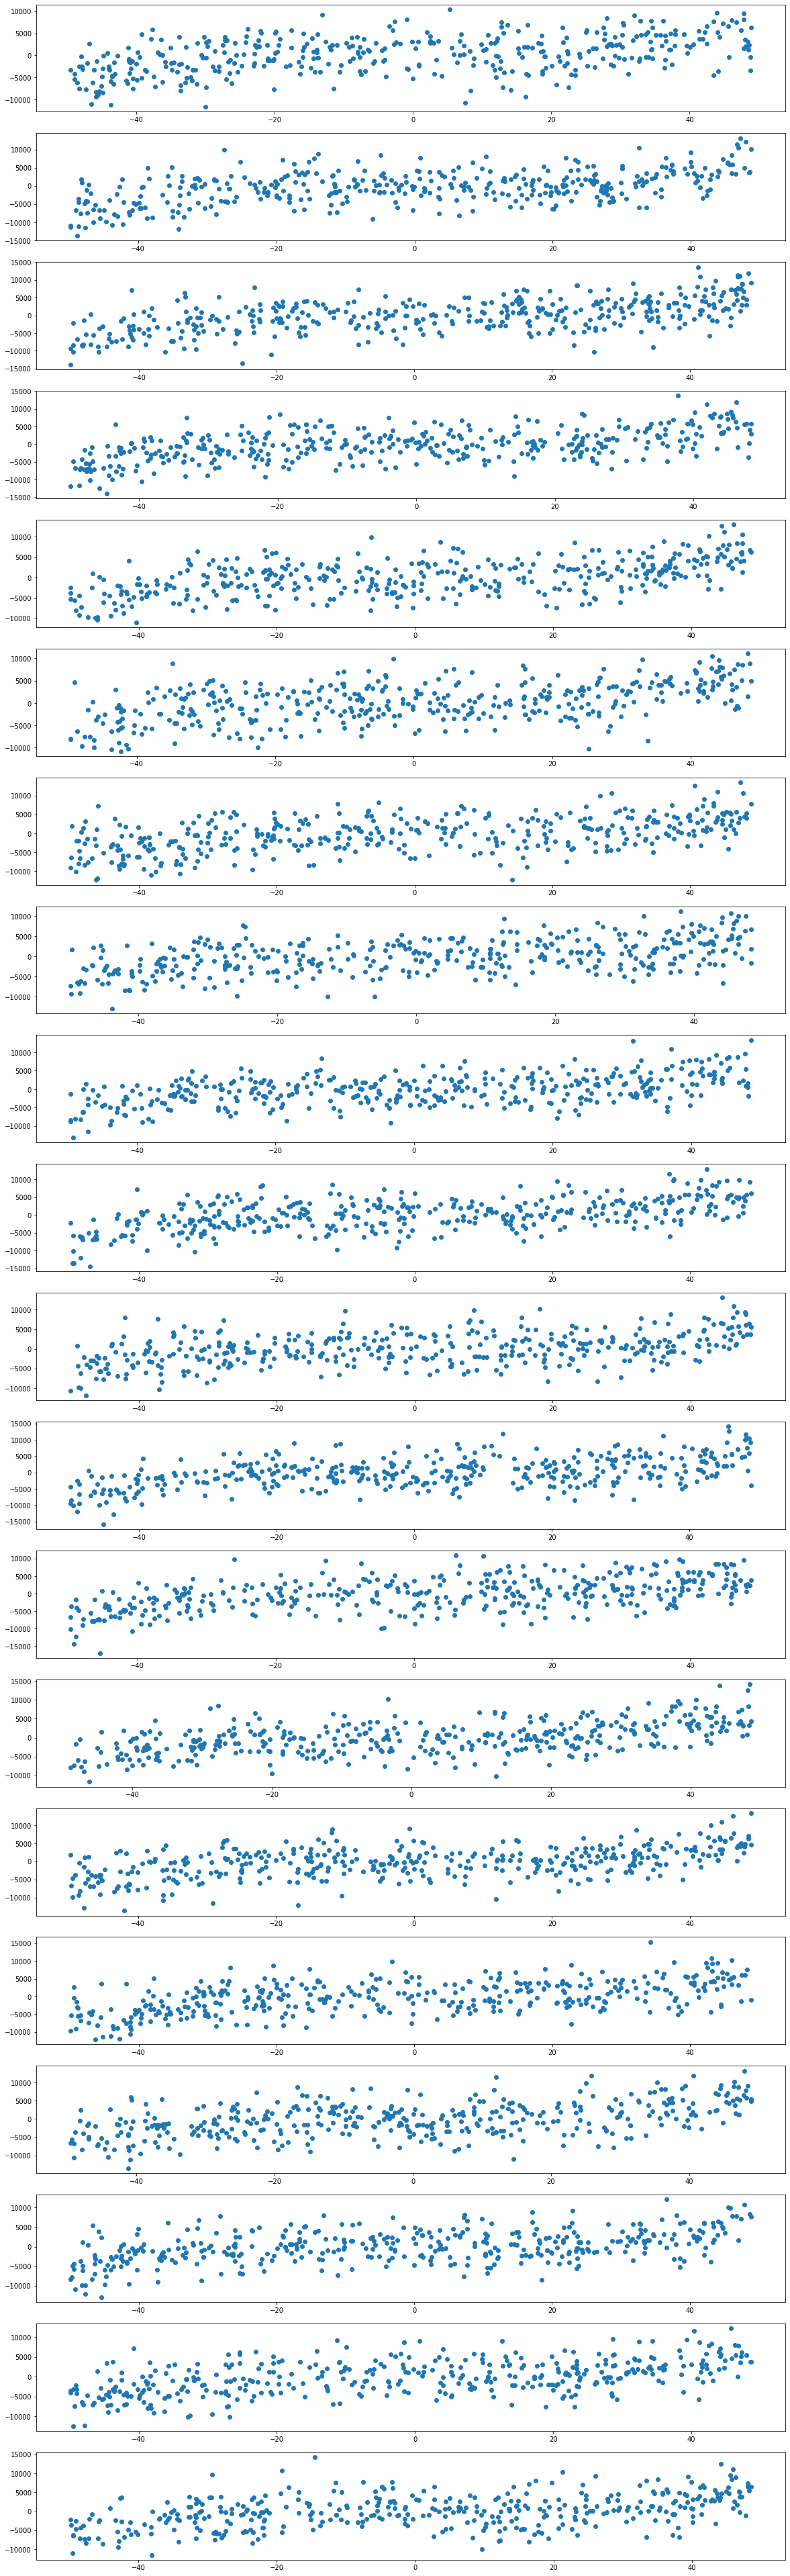

In [137]:
fig, ax = plt.subplots(20, figsize = (20, 70))
for i in range(20):
    ax[i].scatter(xTrain[i], yTrain[i])

Fold Number 1


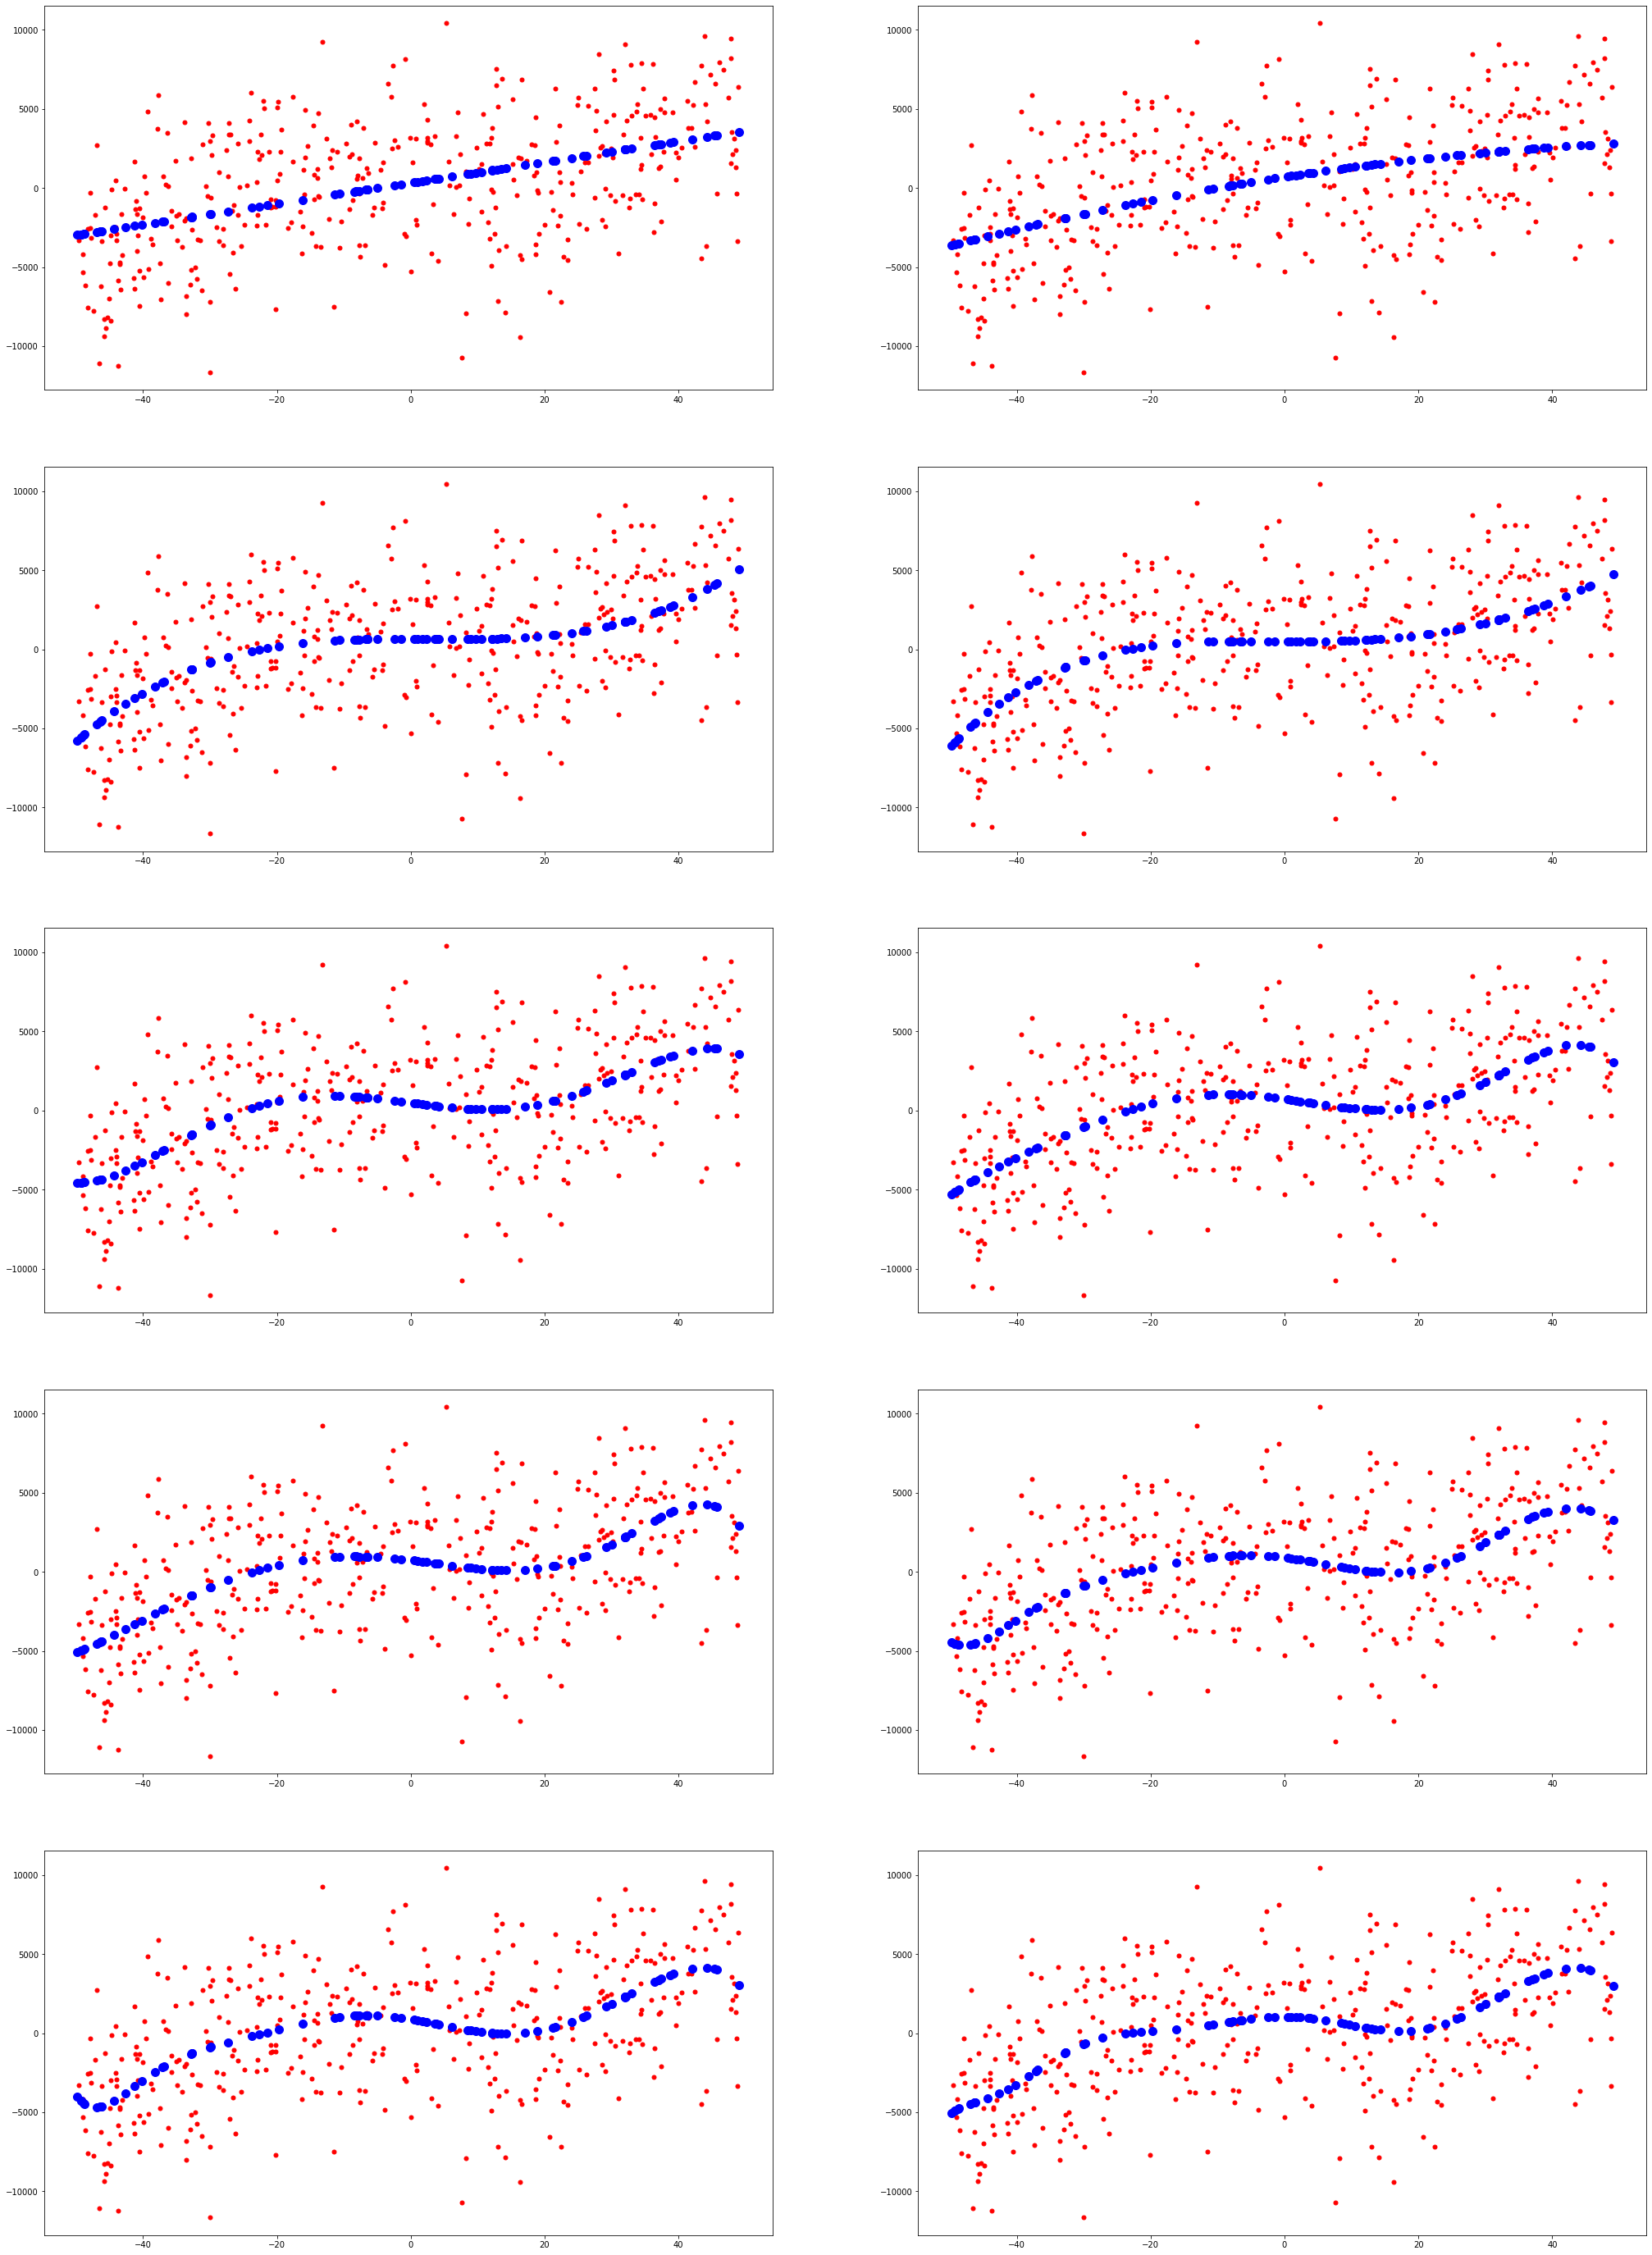

Fold Number 2


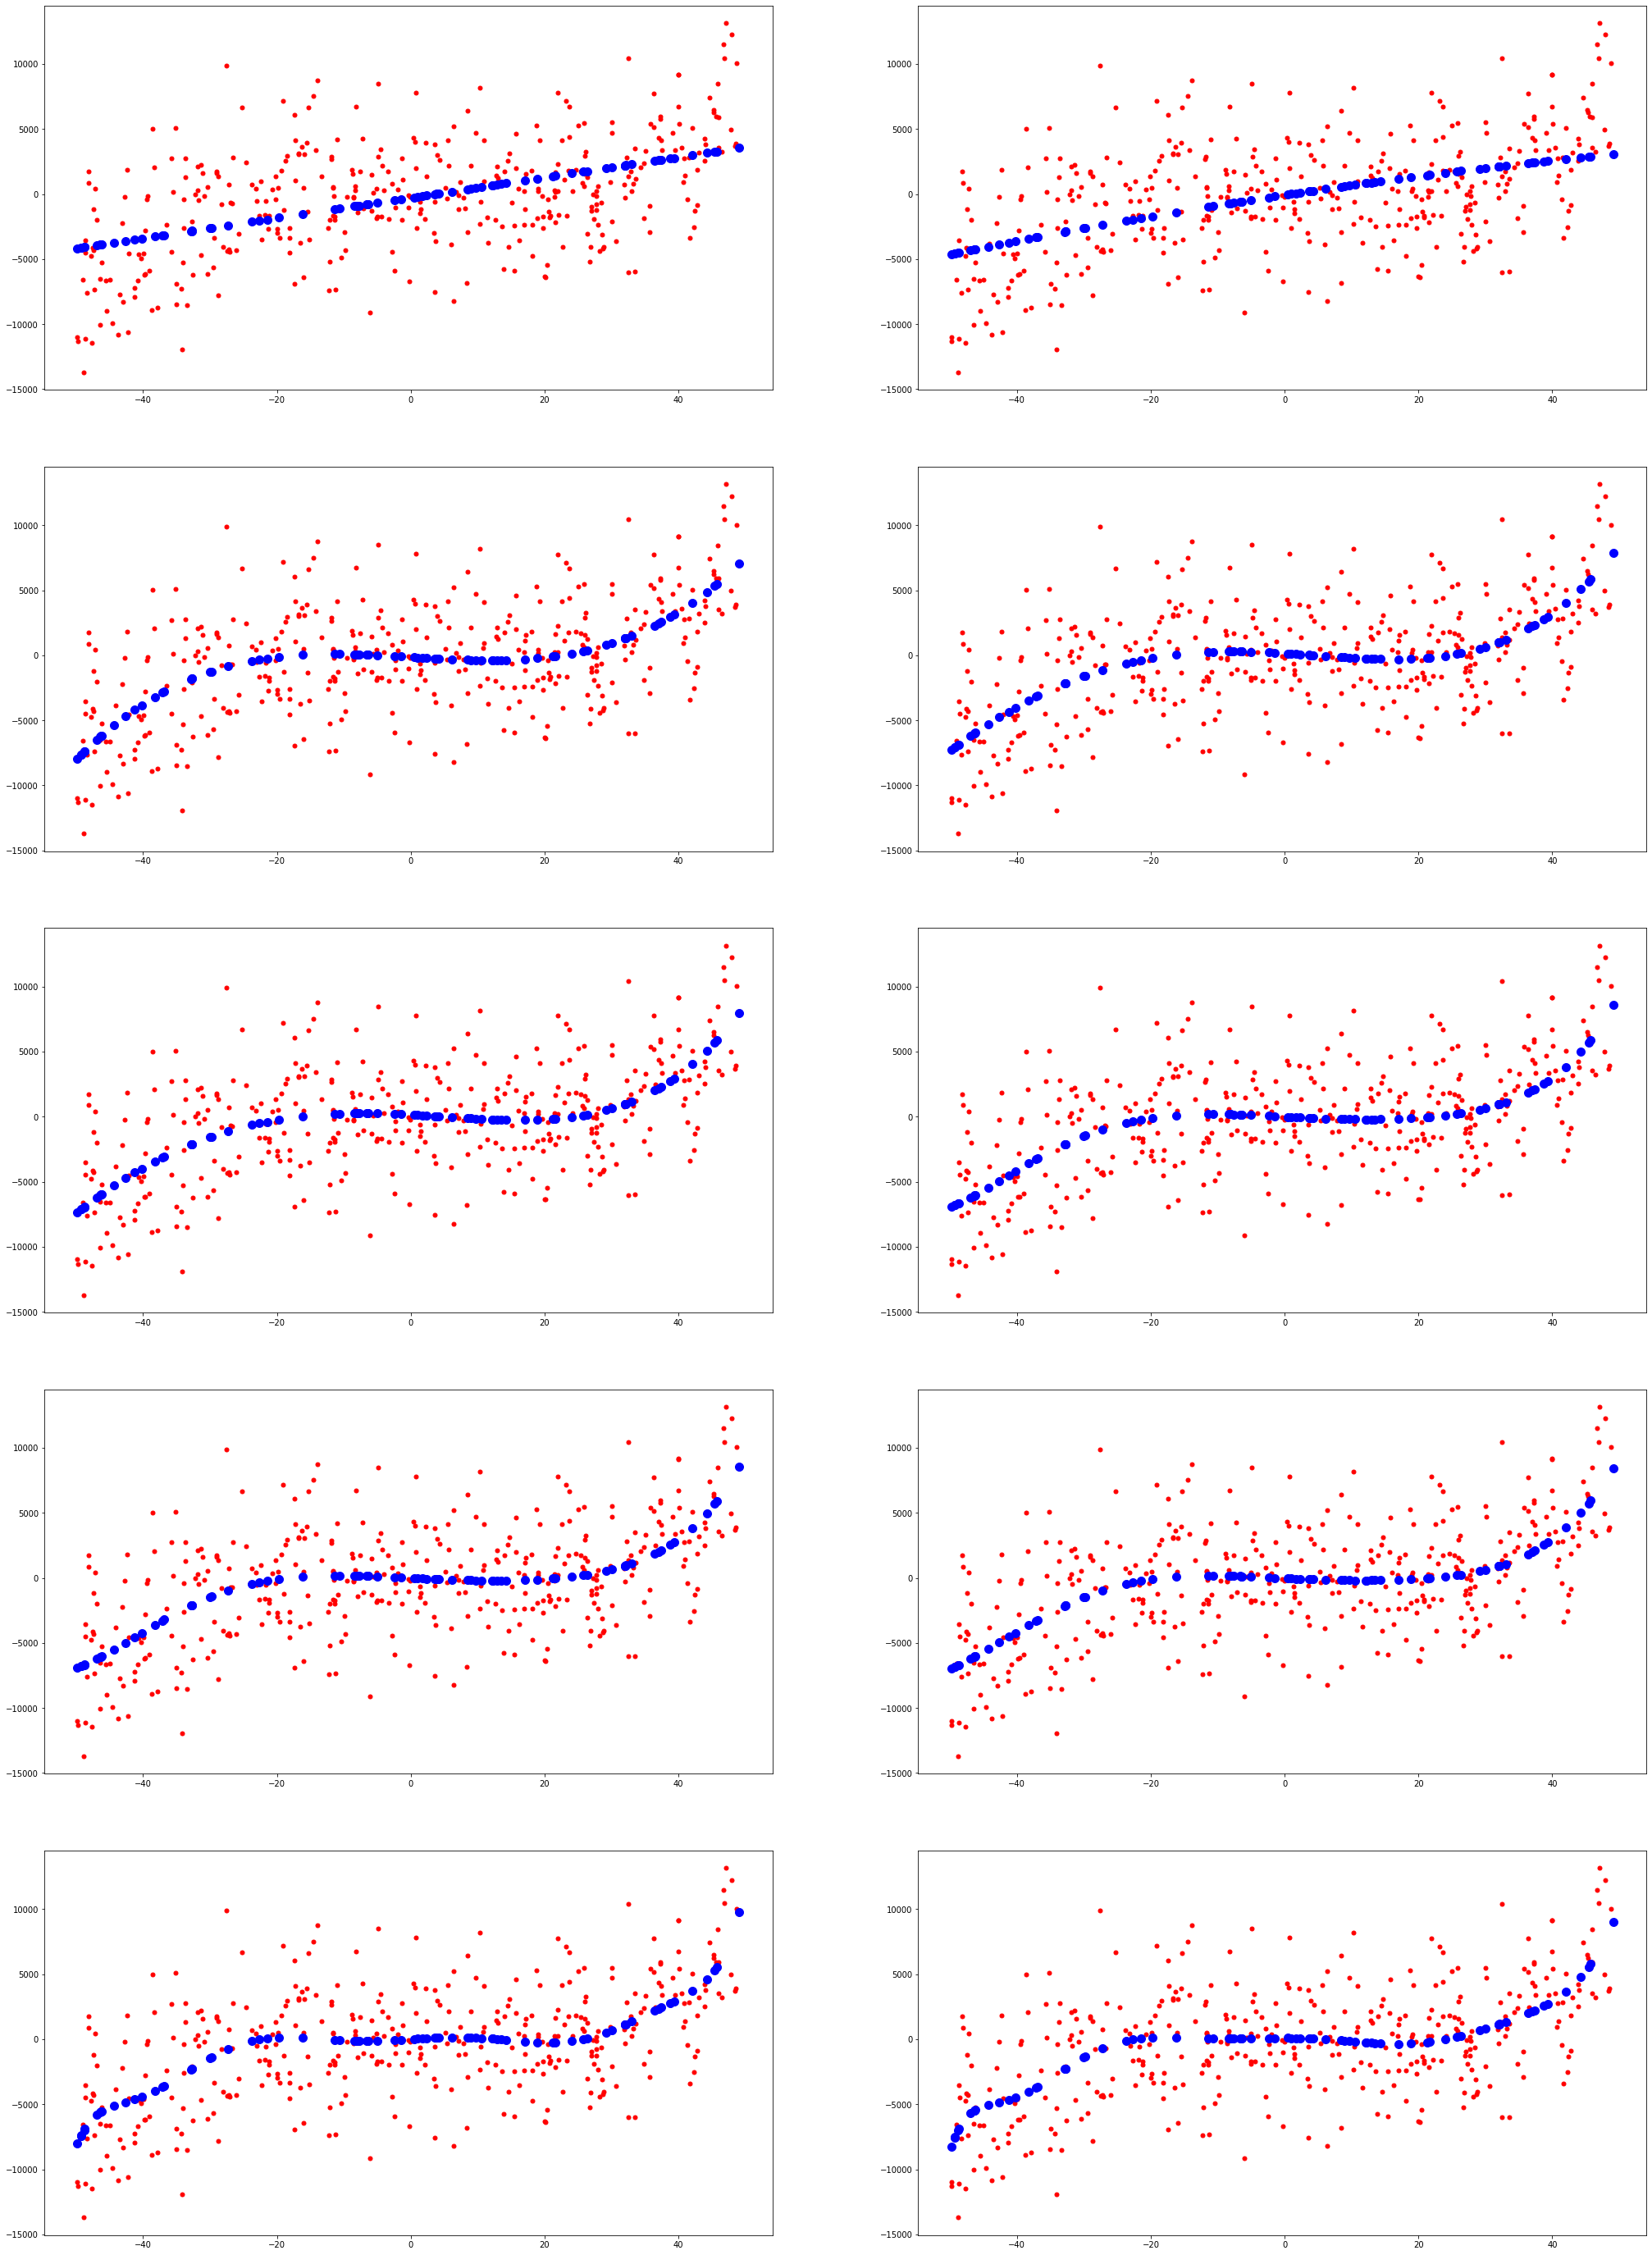

Fold Number 3


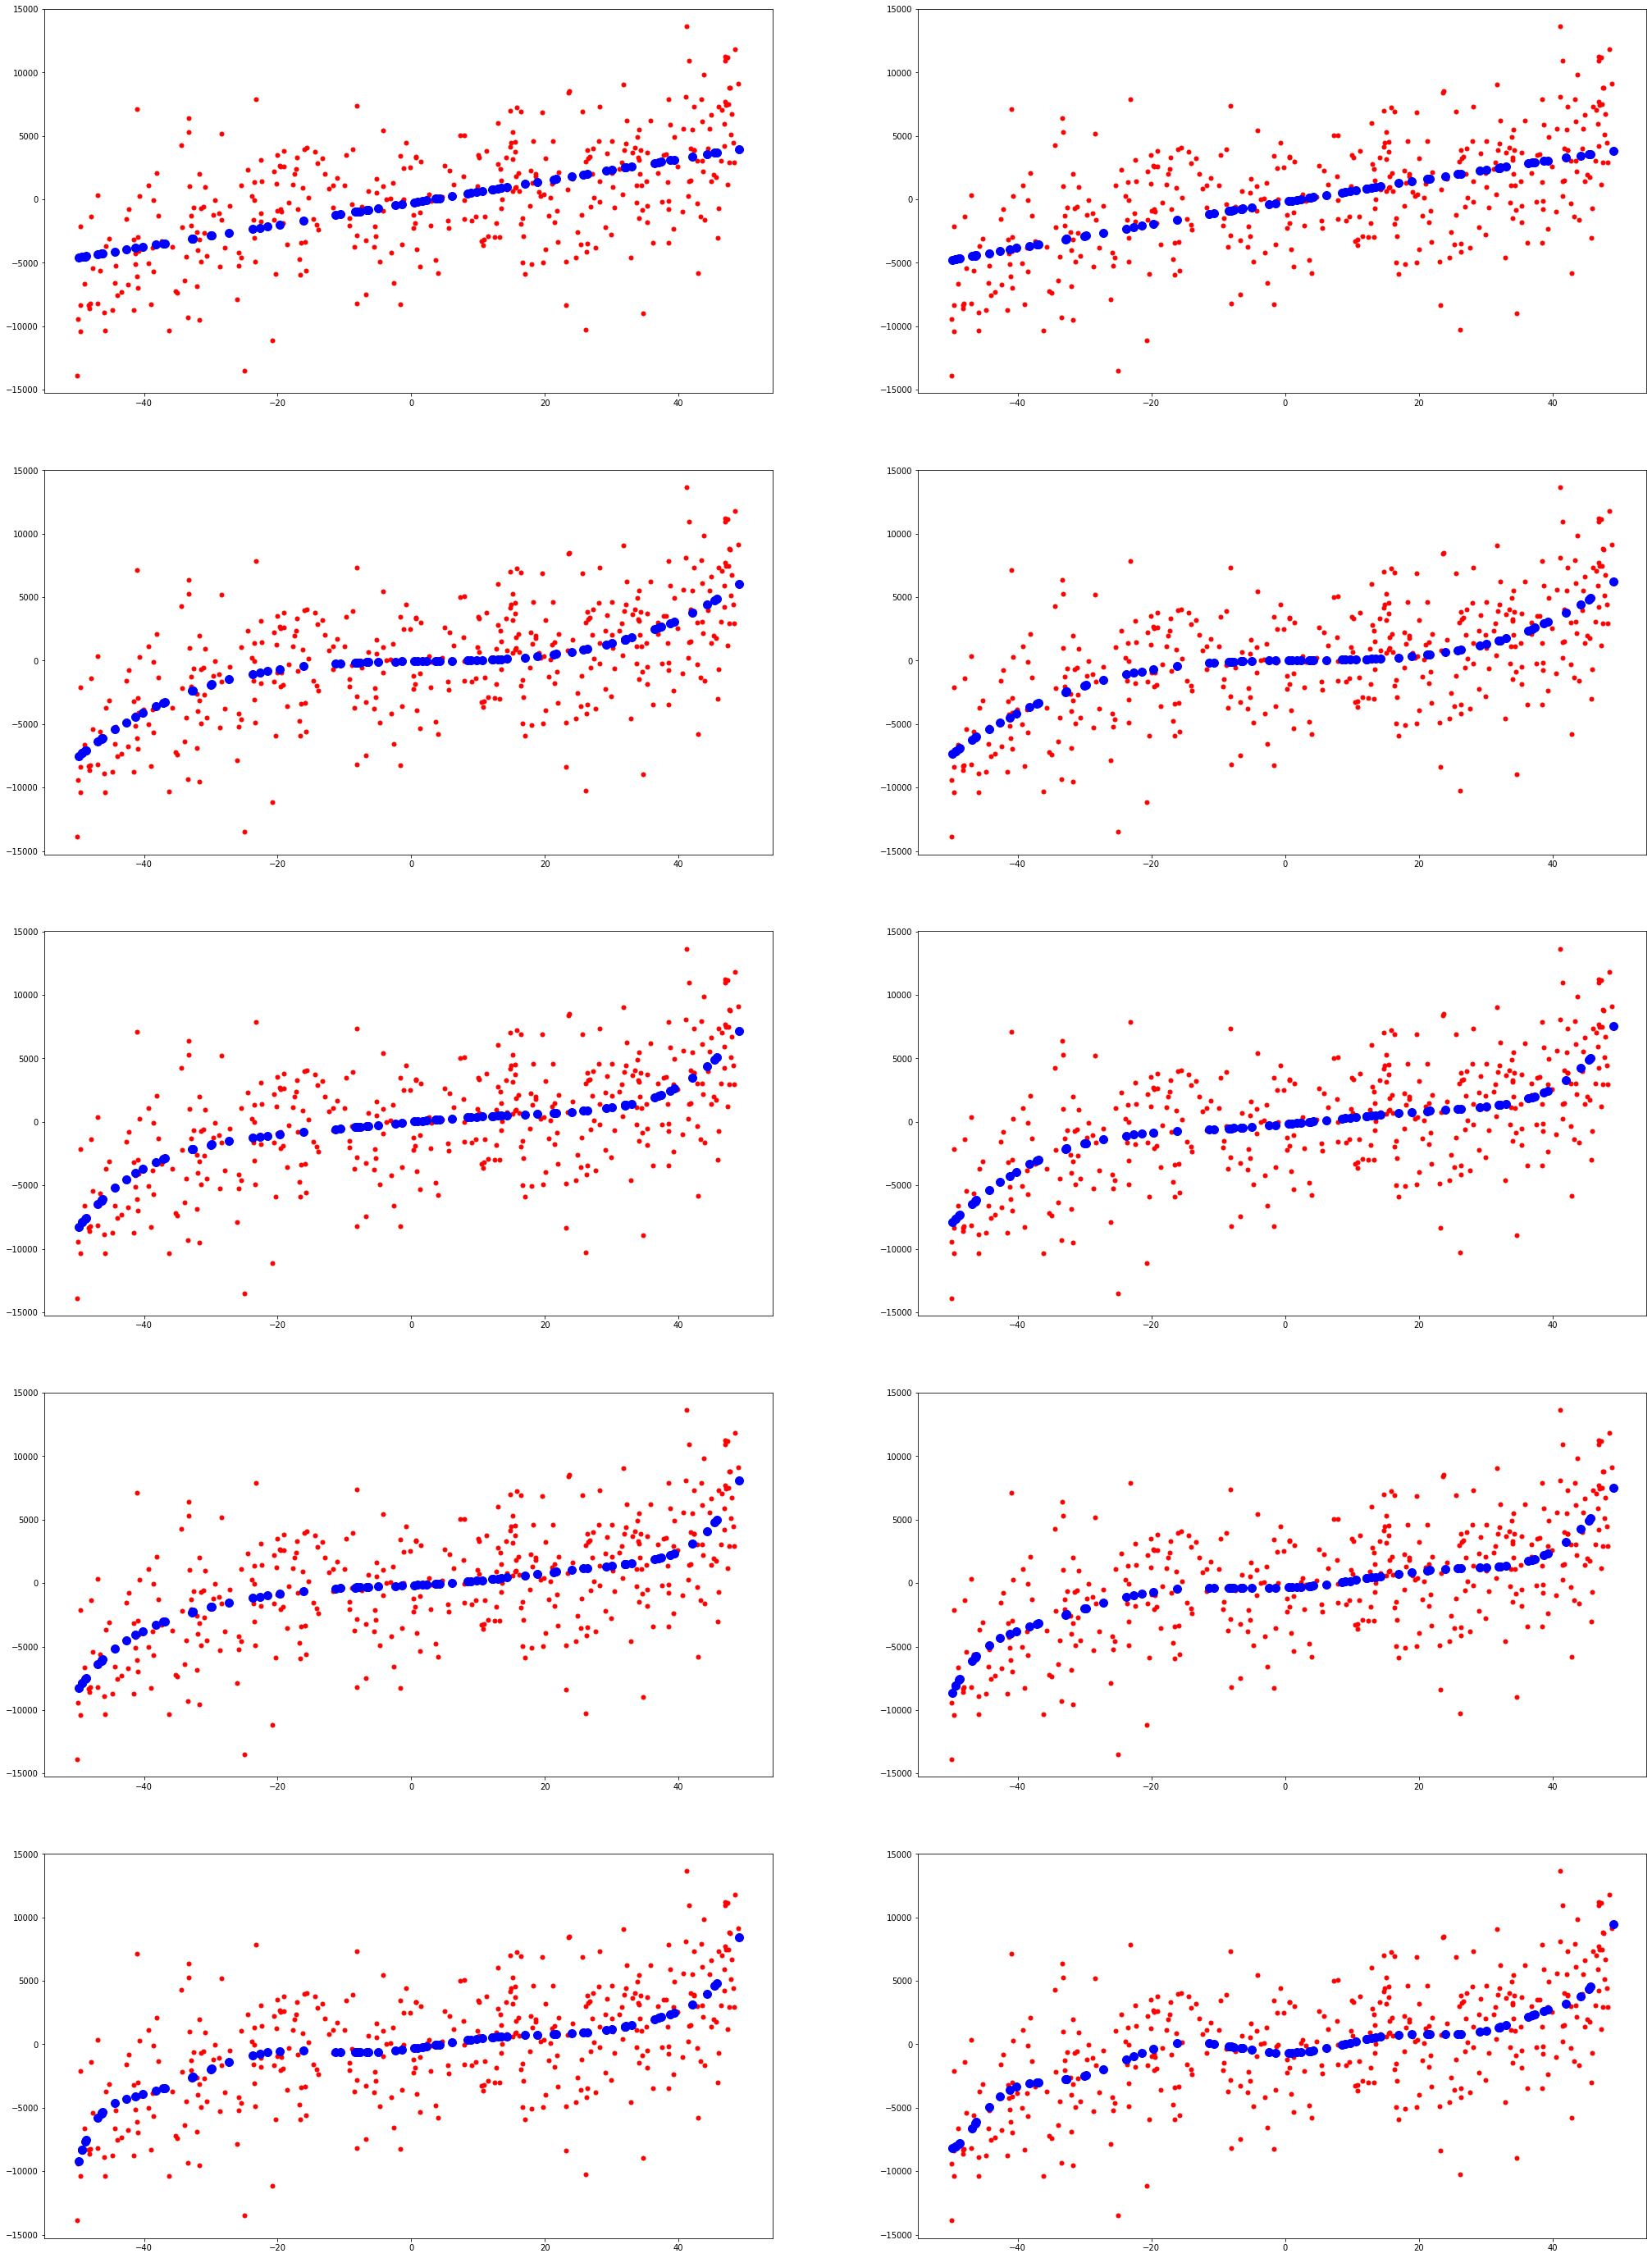

Fold Number 4


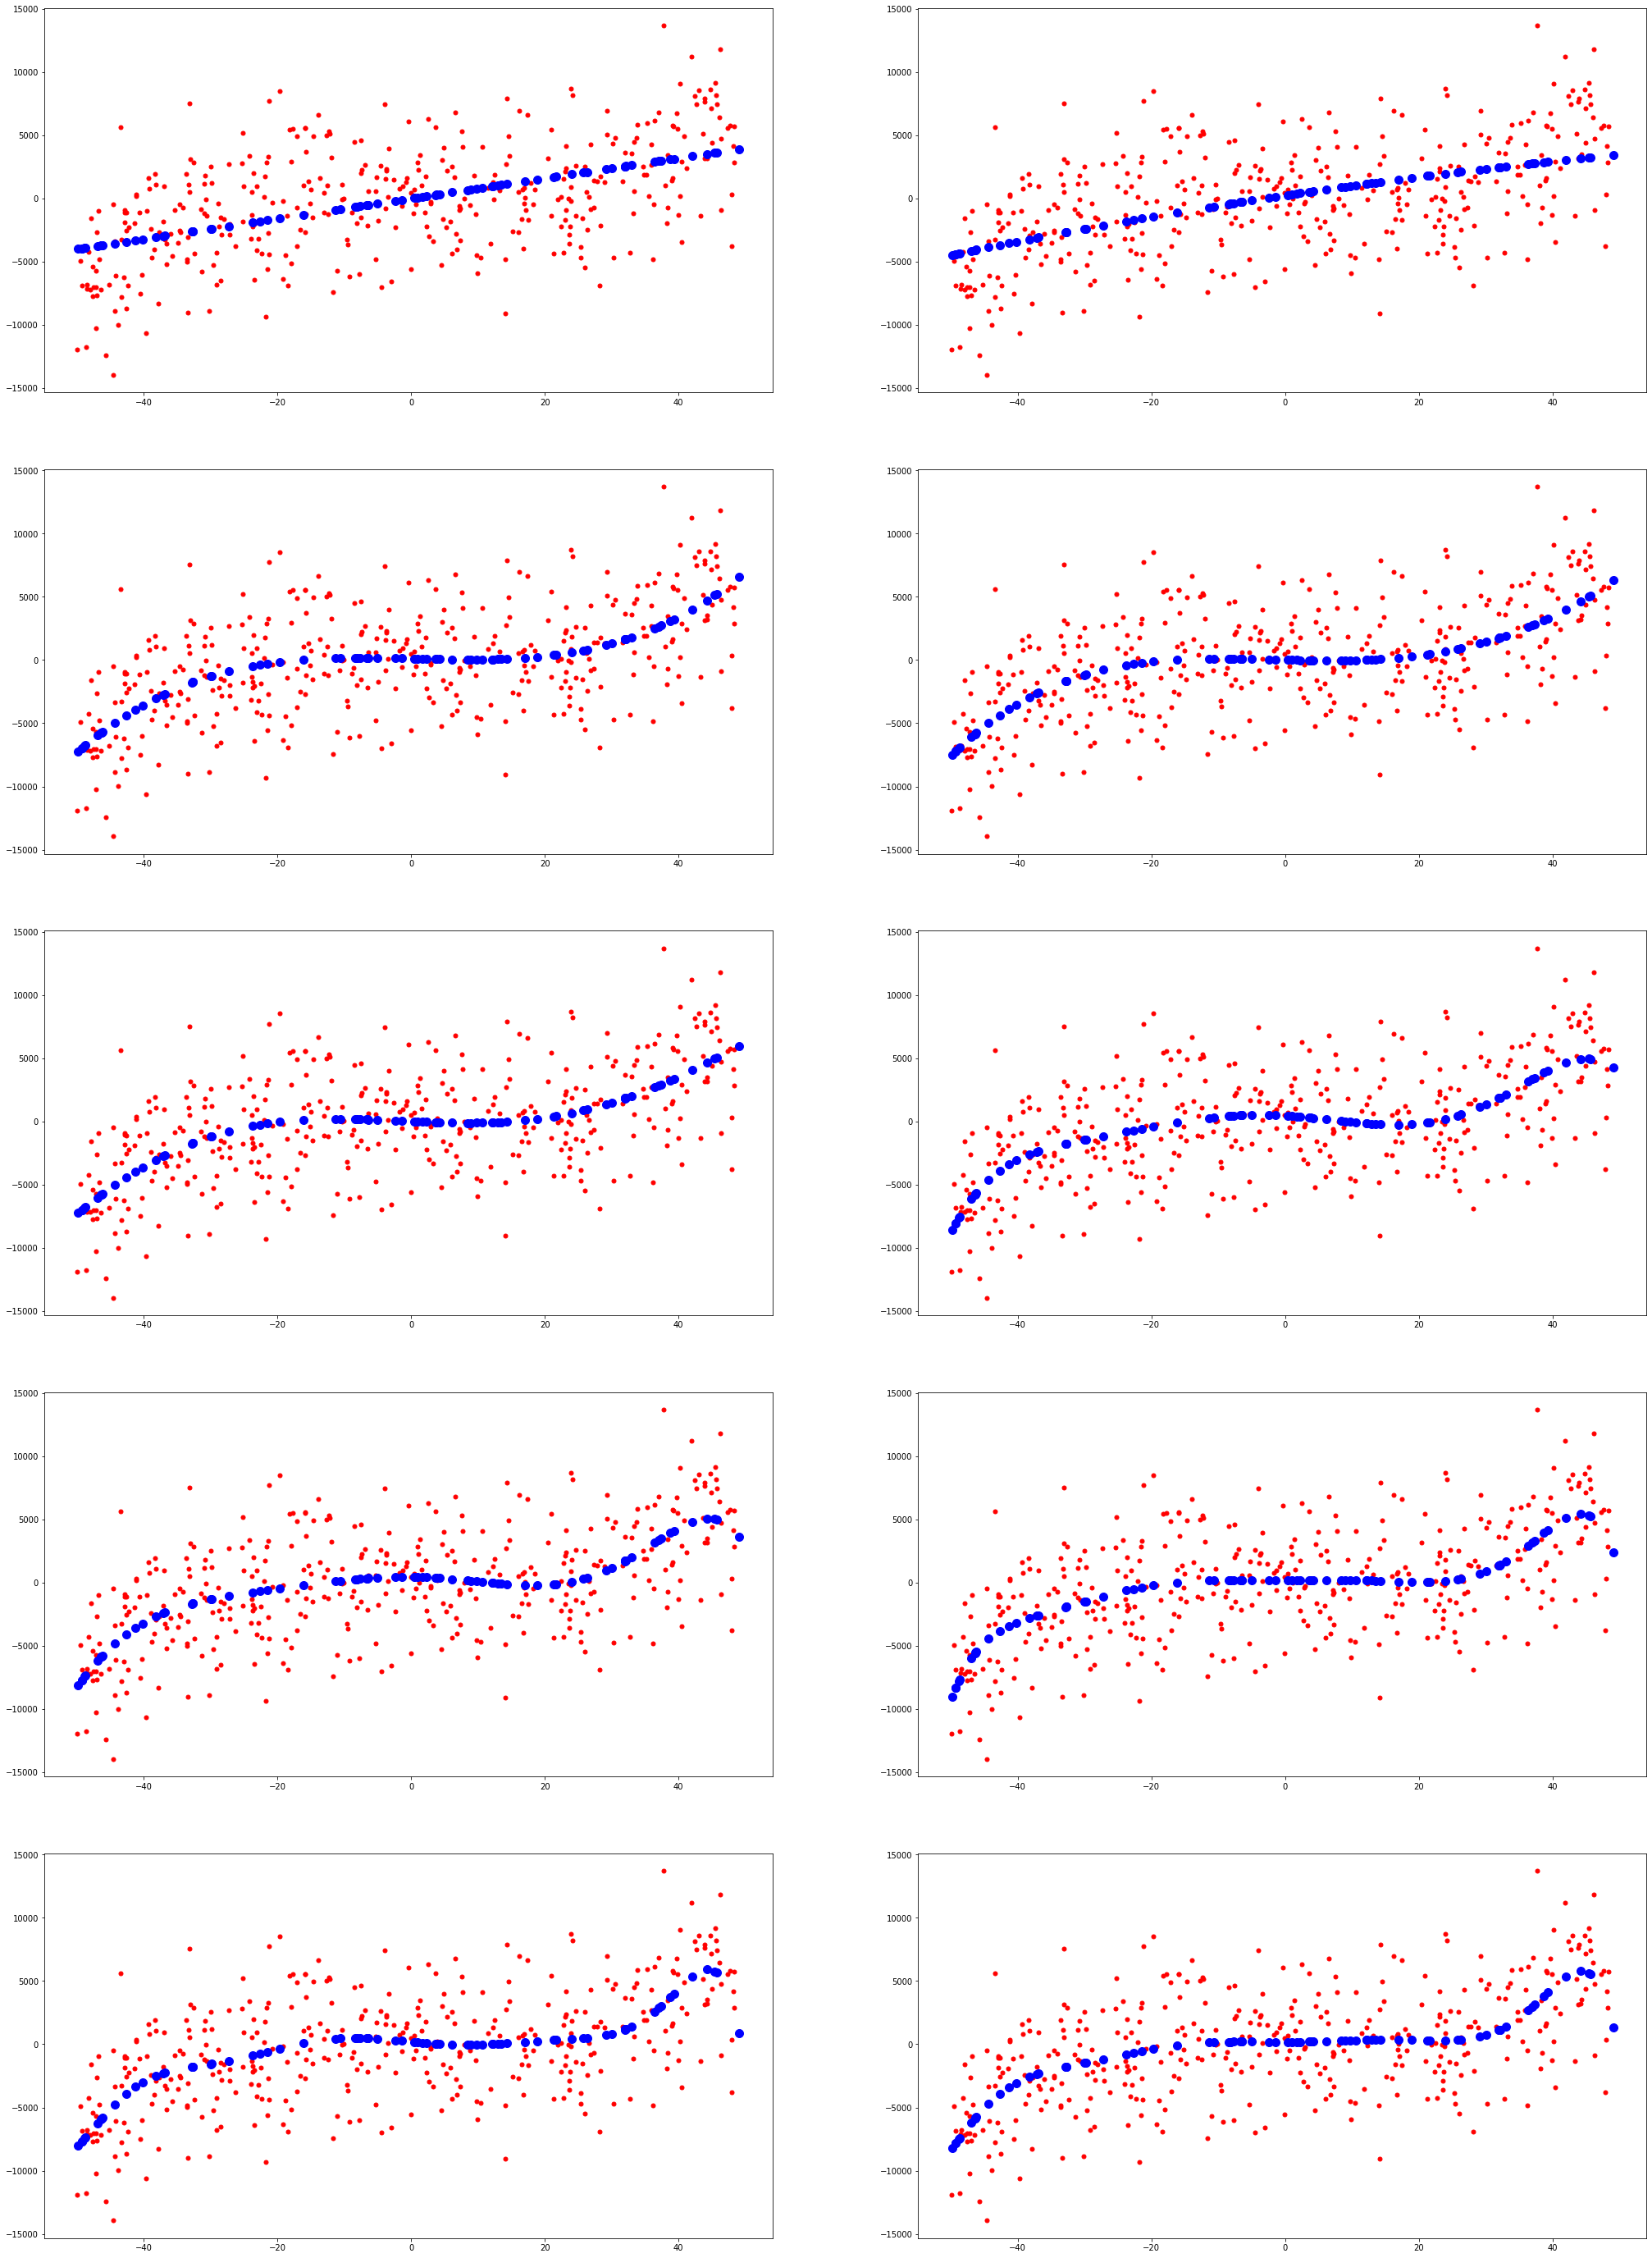

Fold Number 5


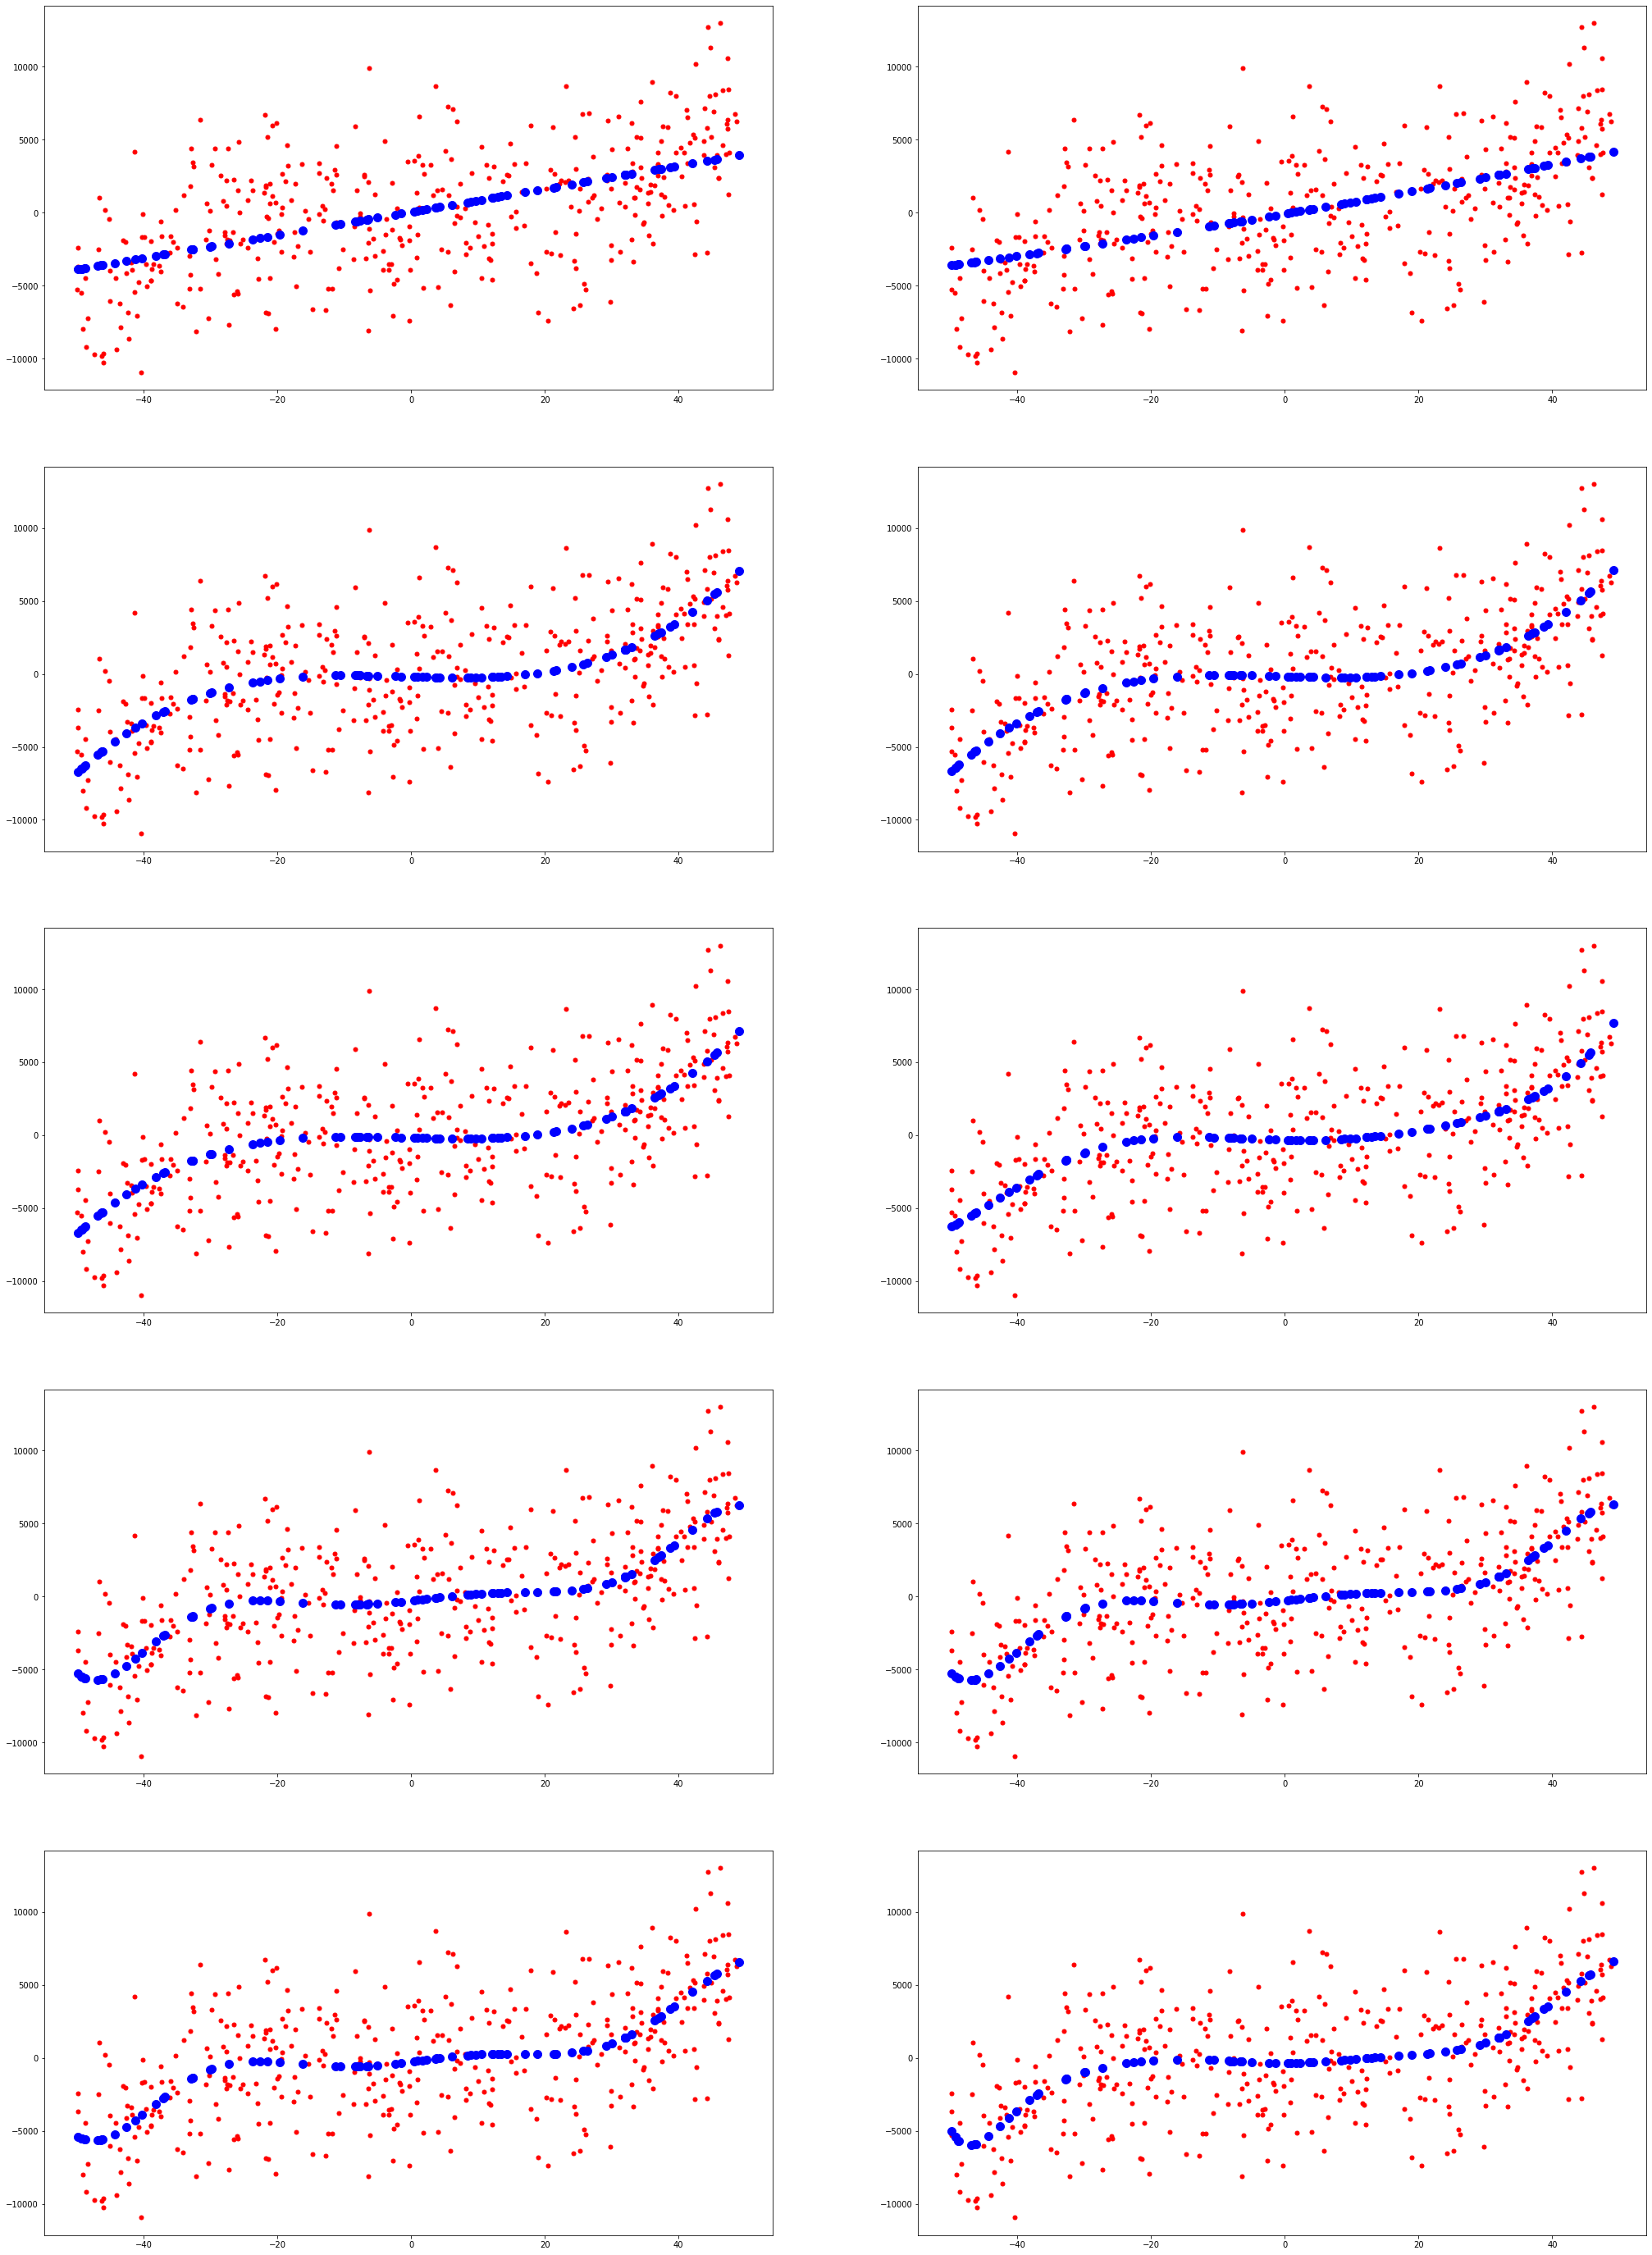

Fold Number 6


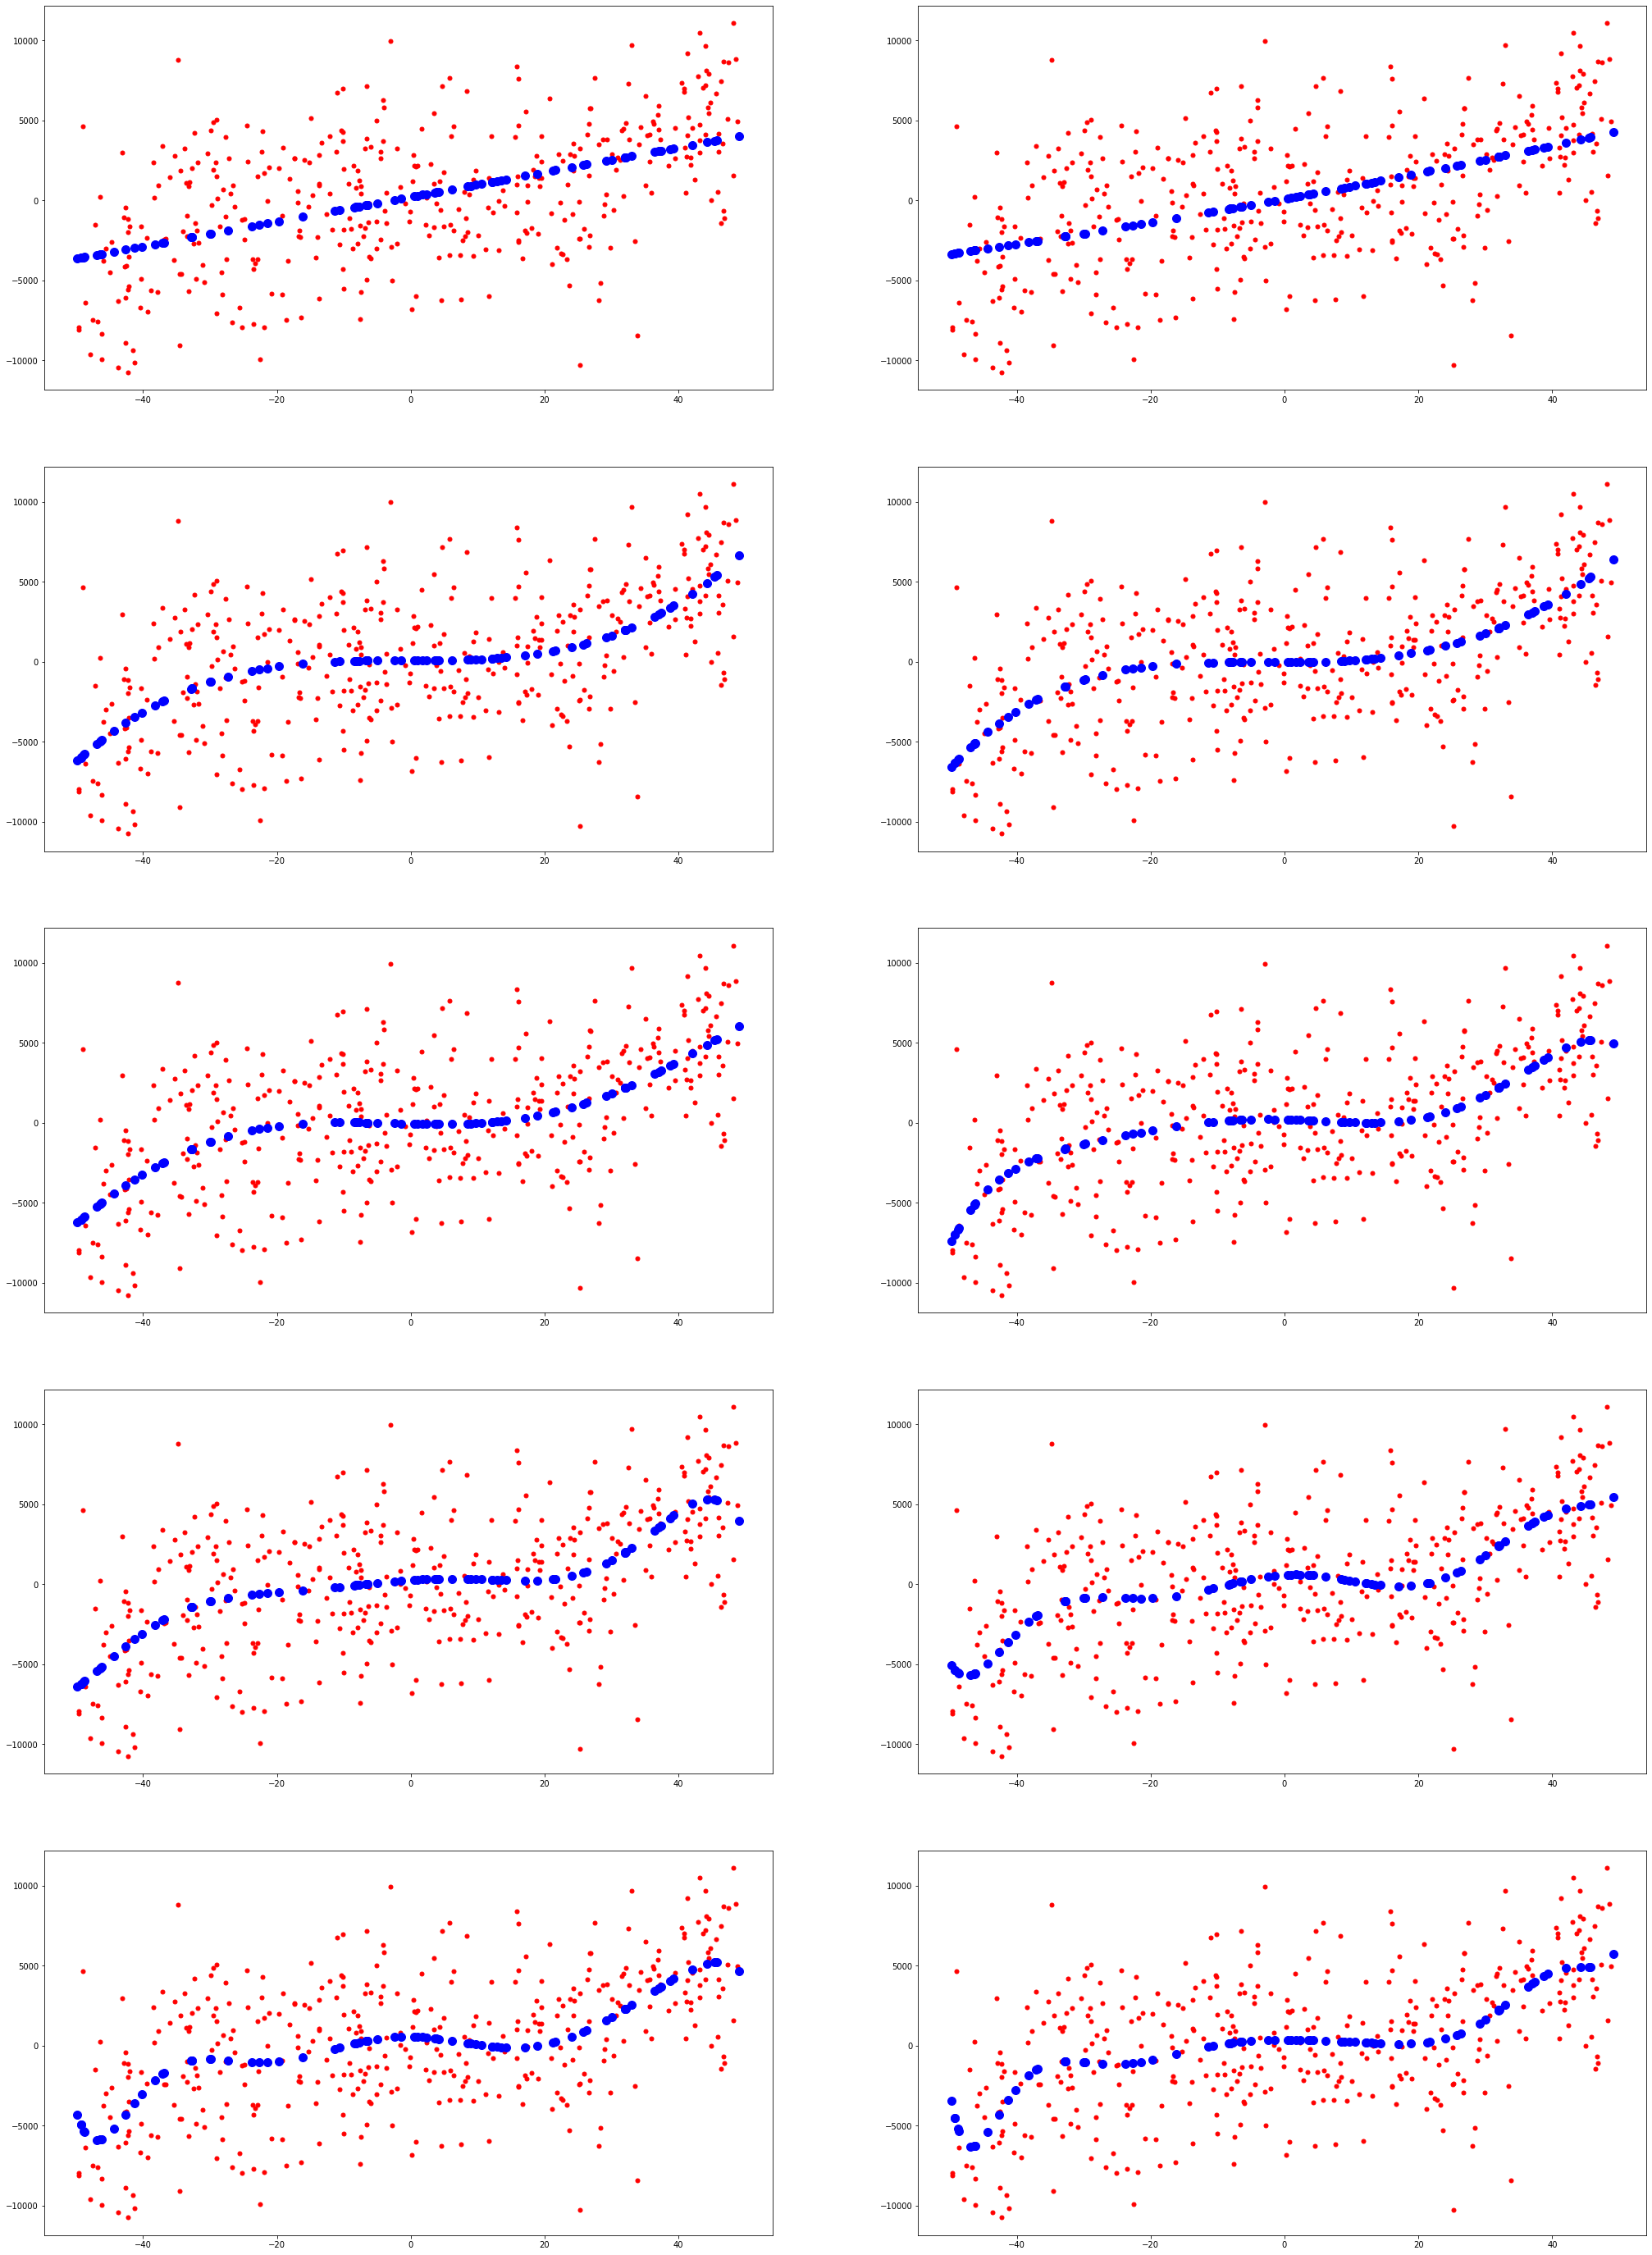

Fold Number 7


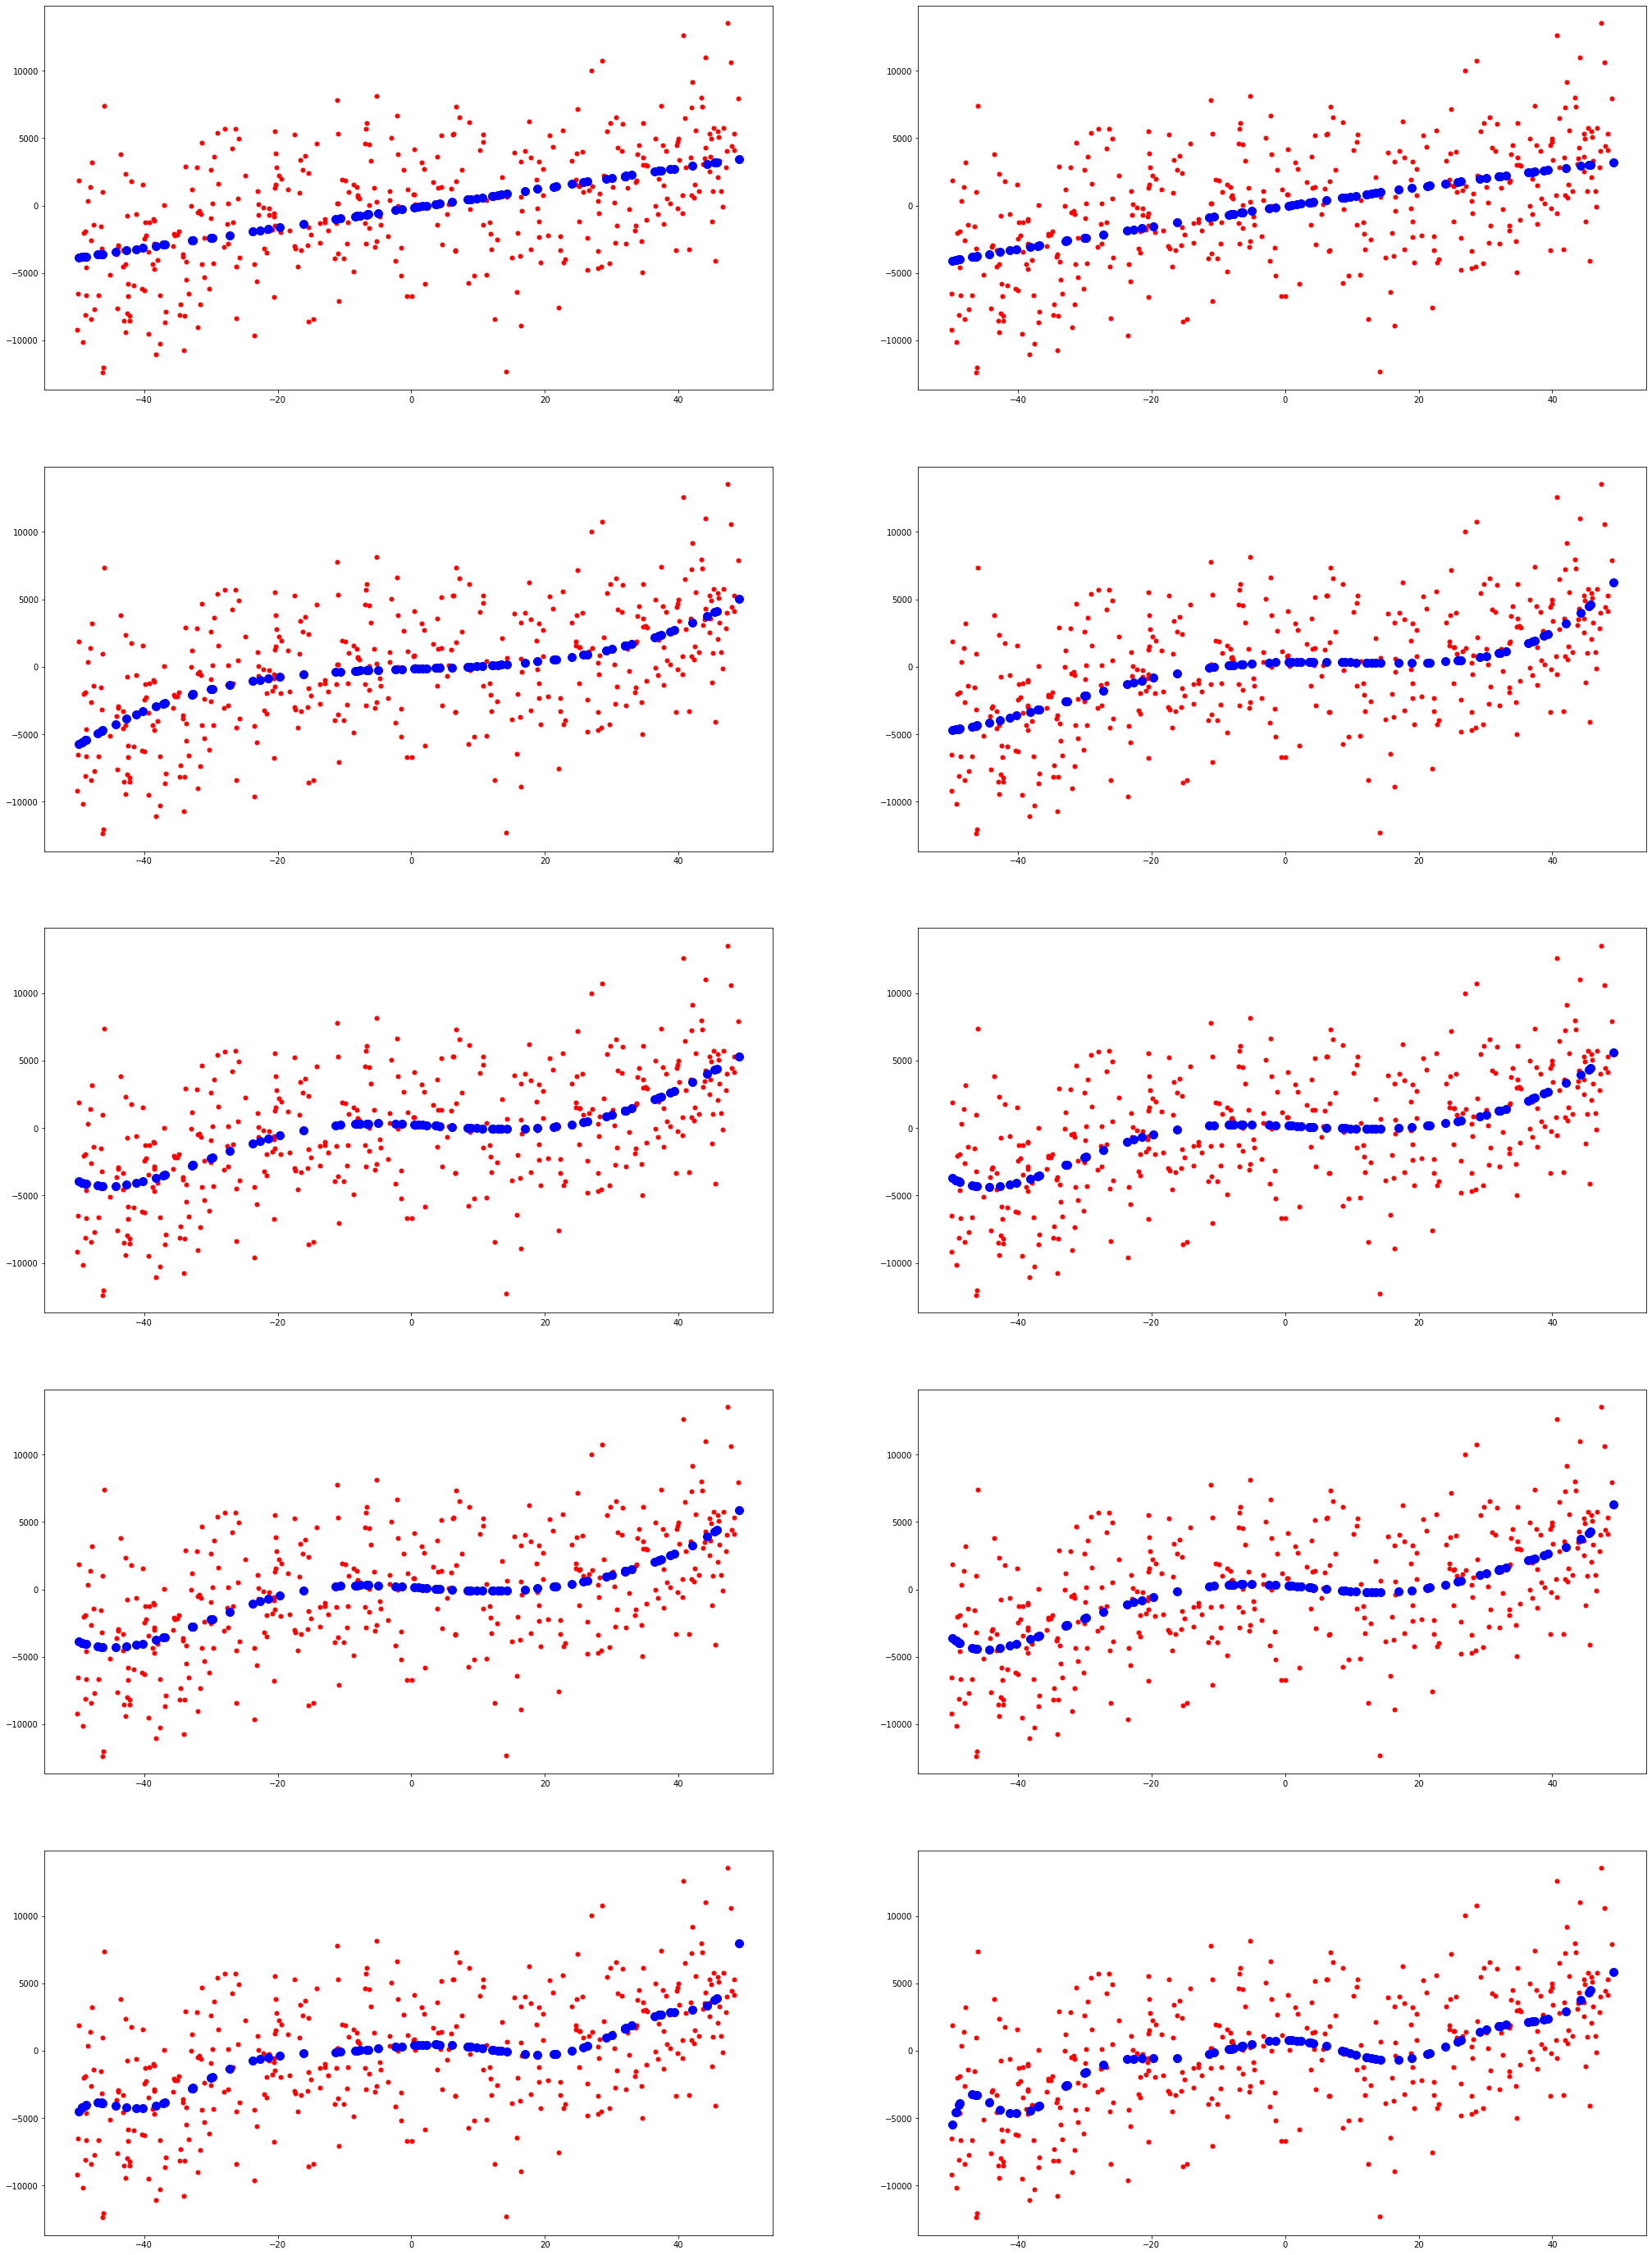

Fold Number 8


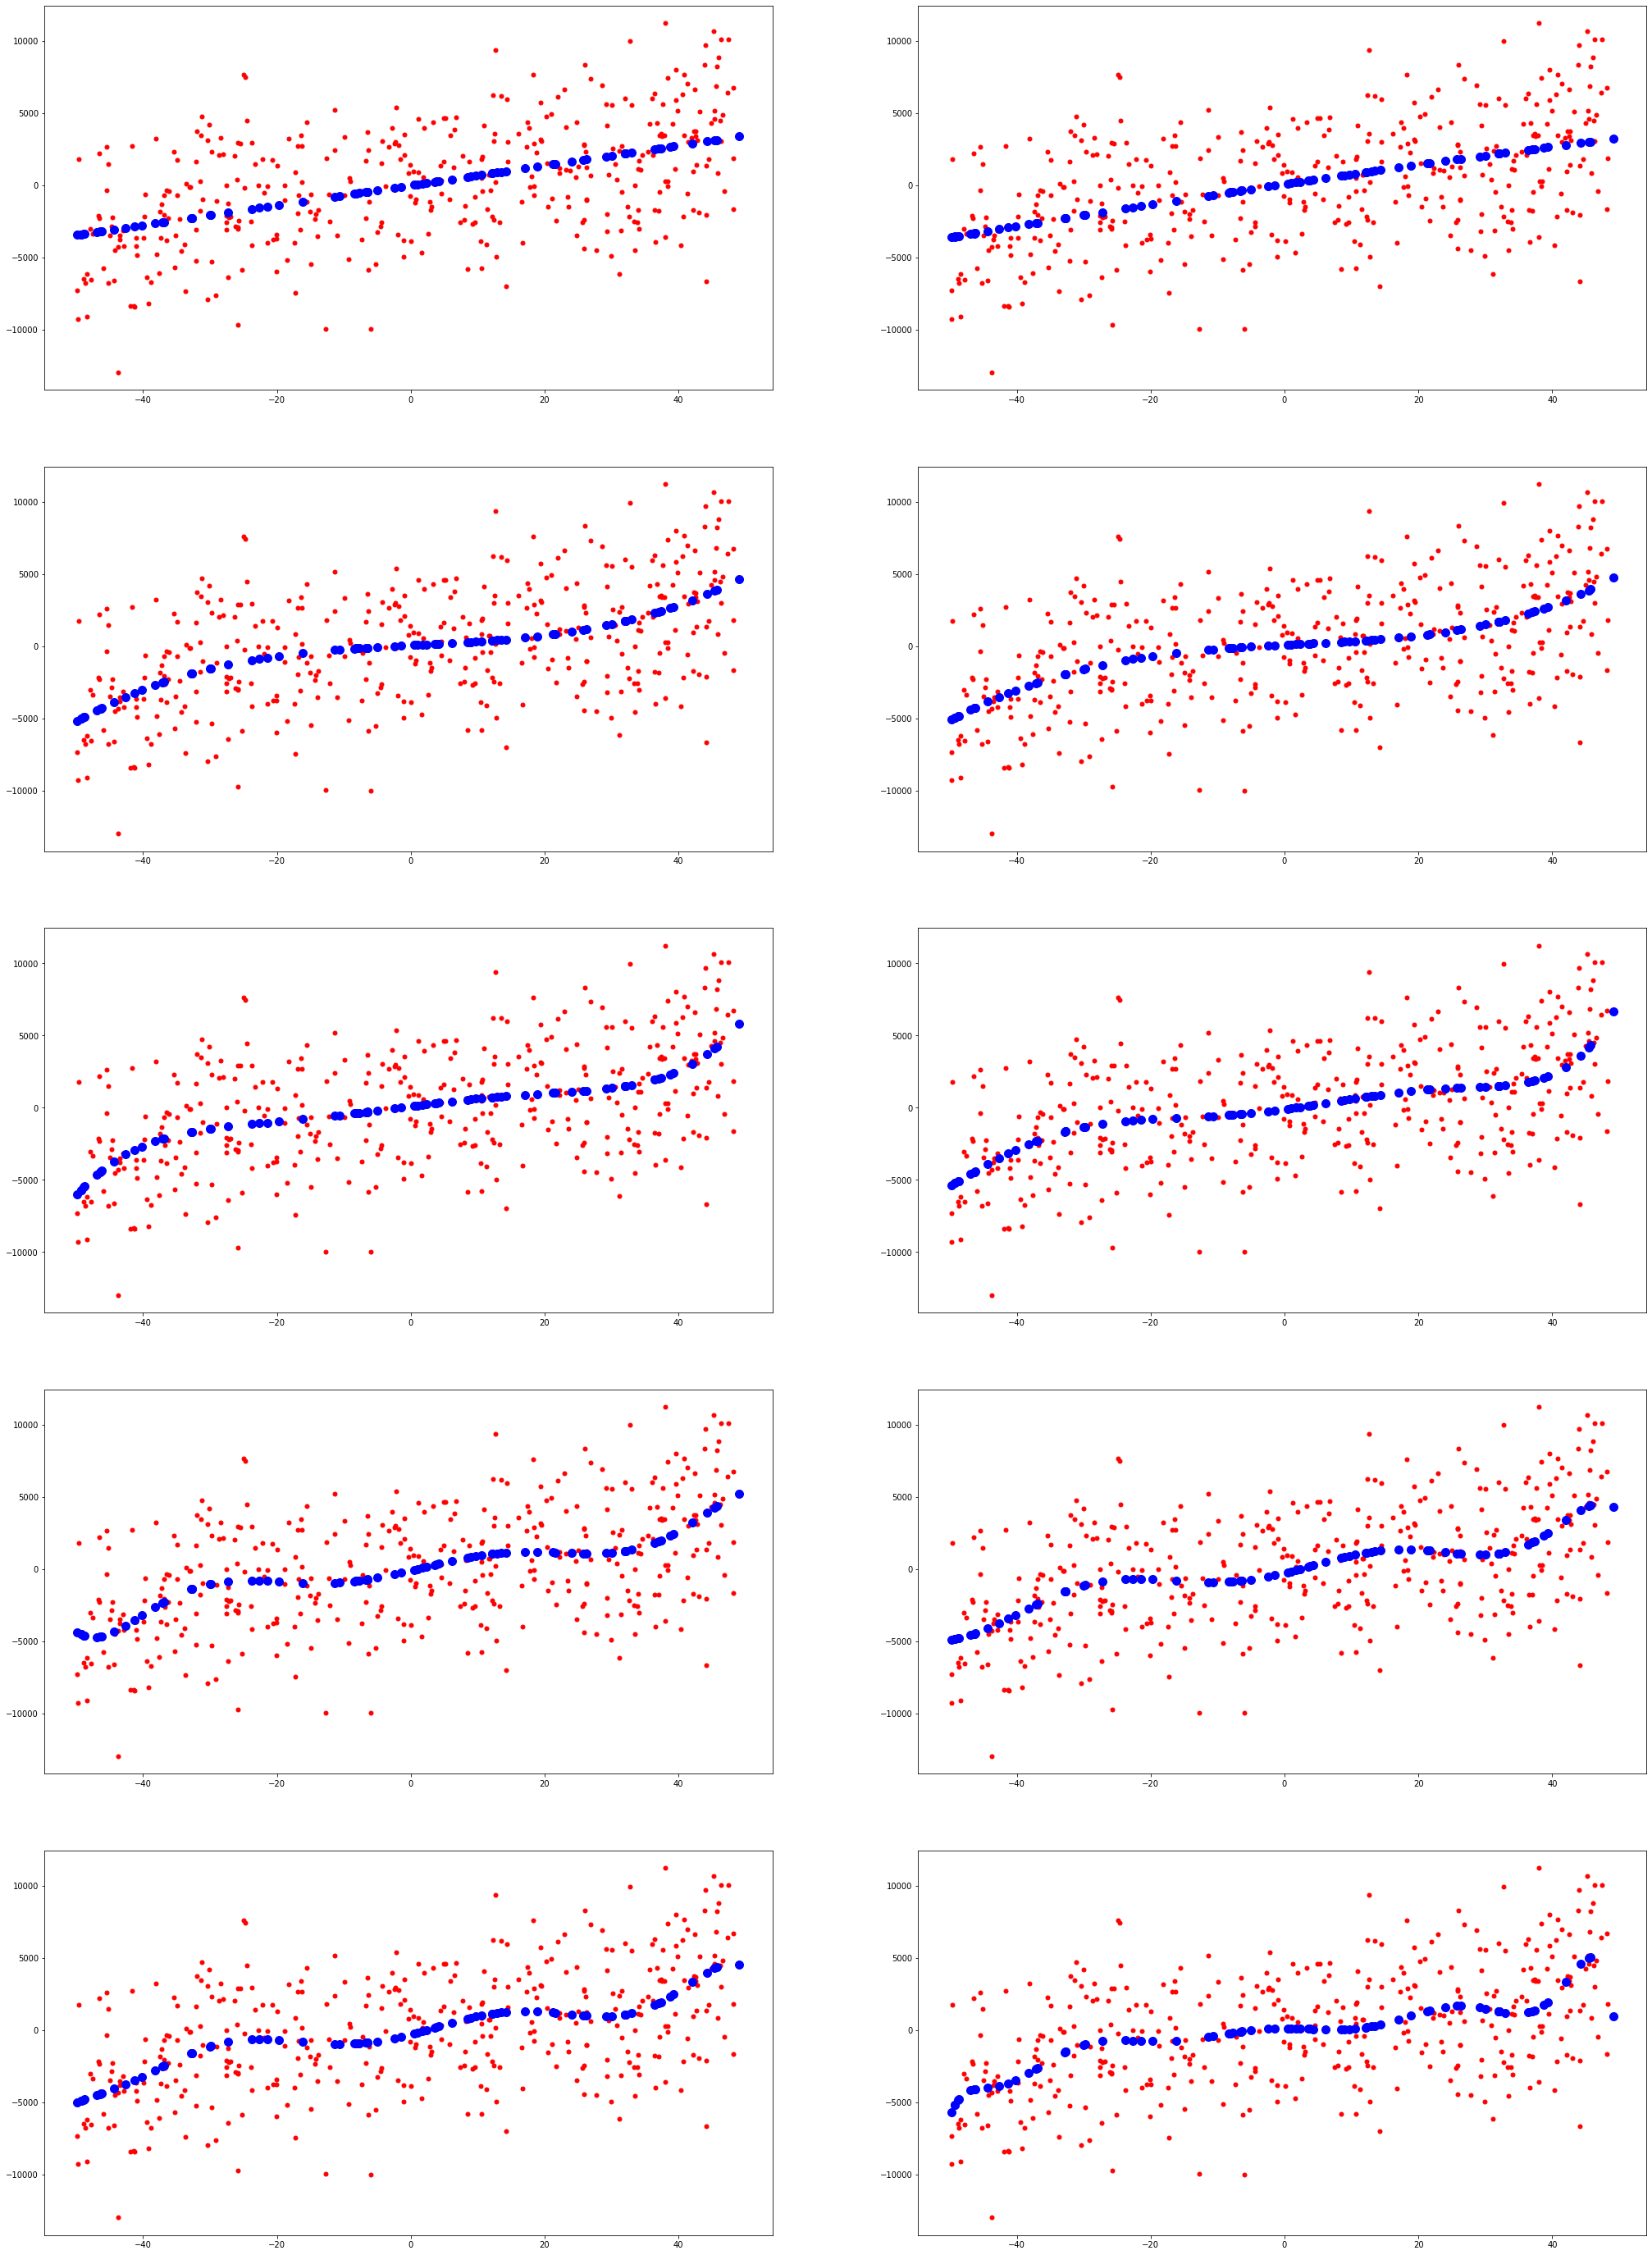

Fold Number 9


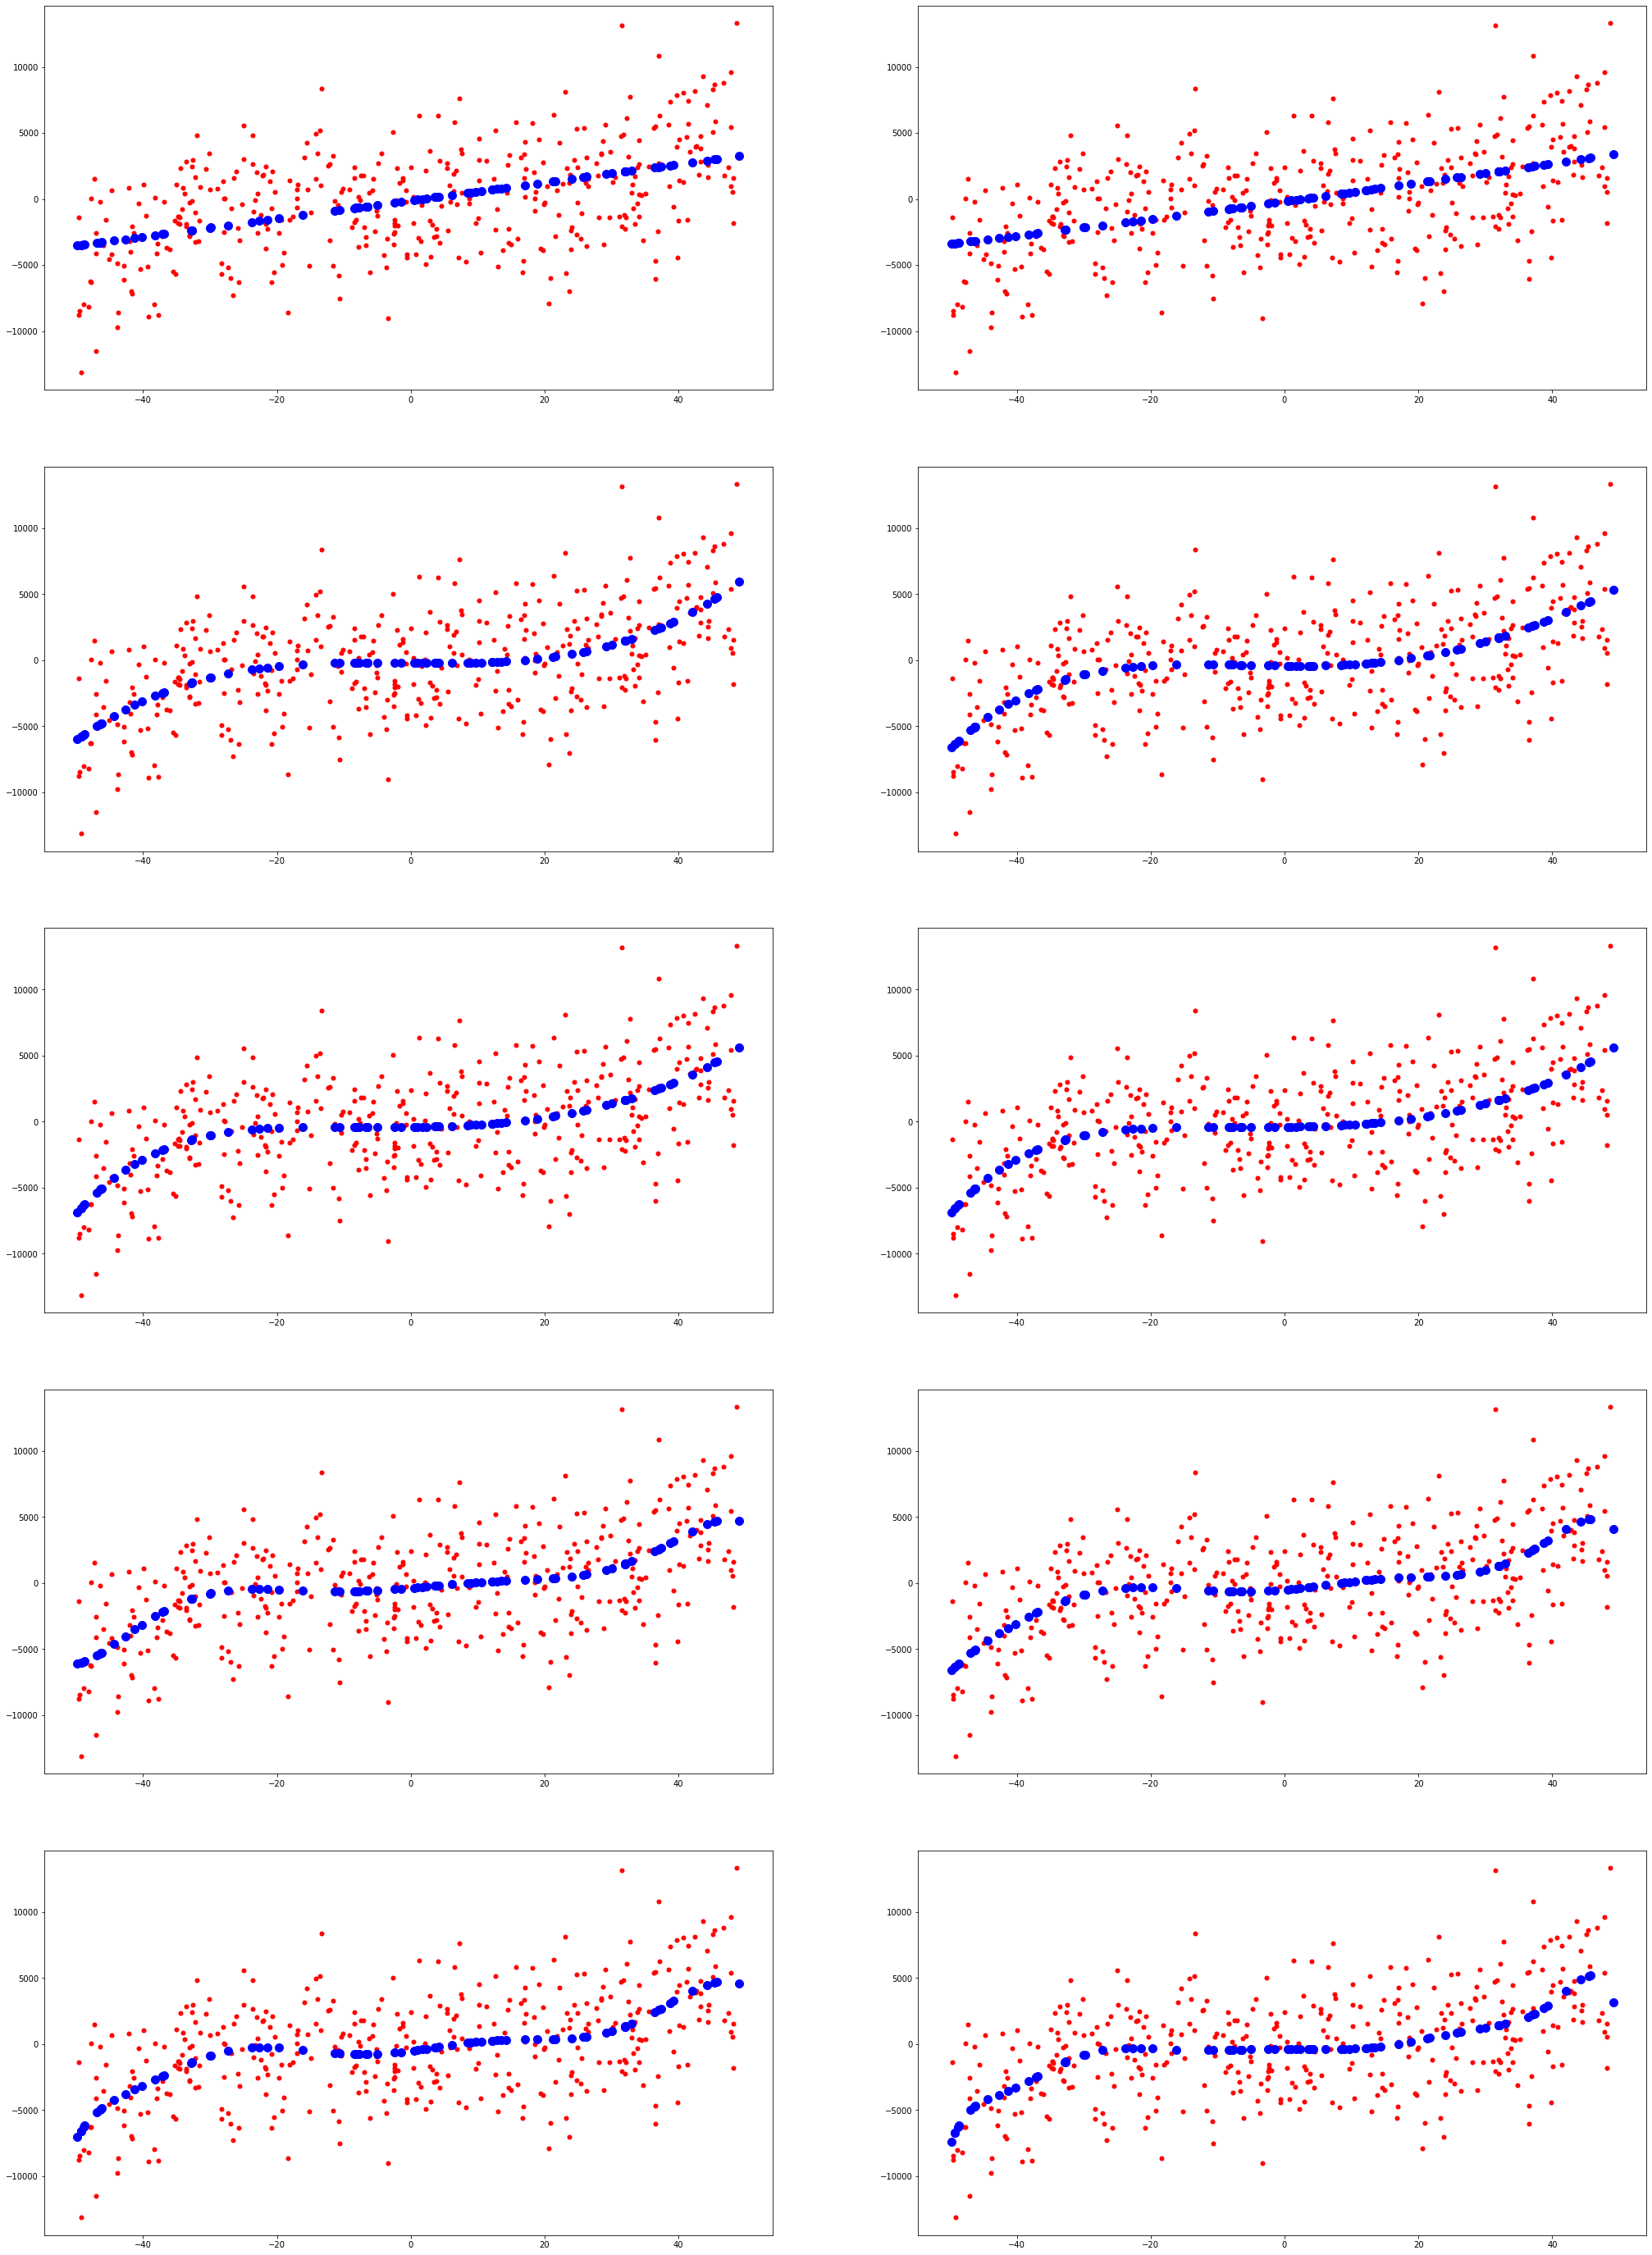

Fold Number 10


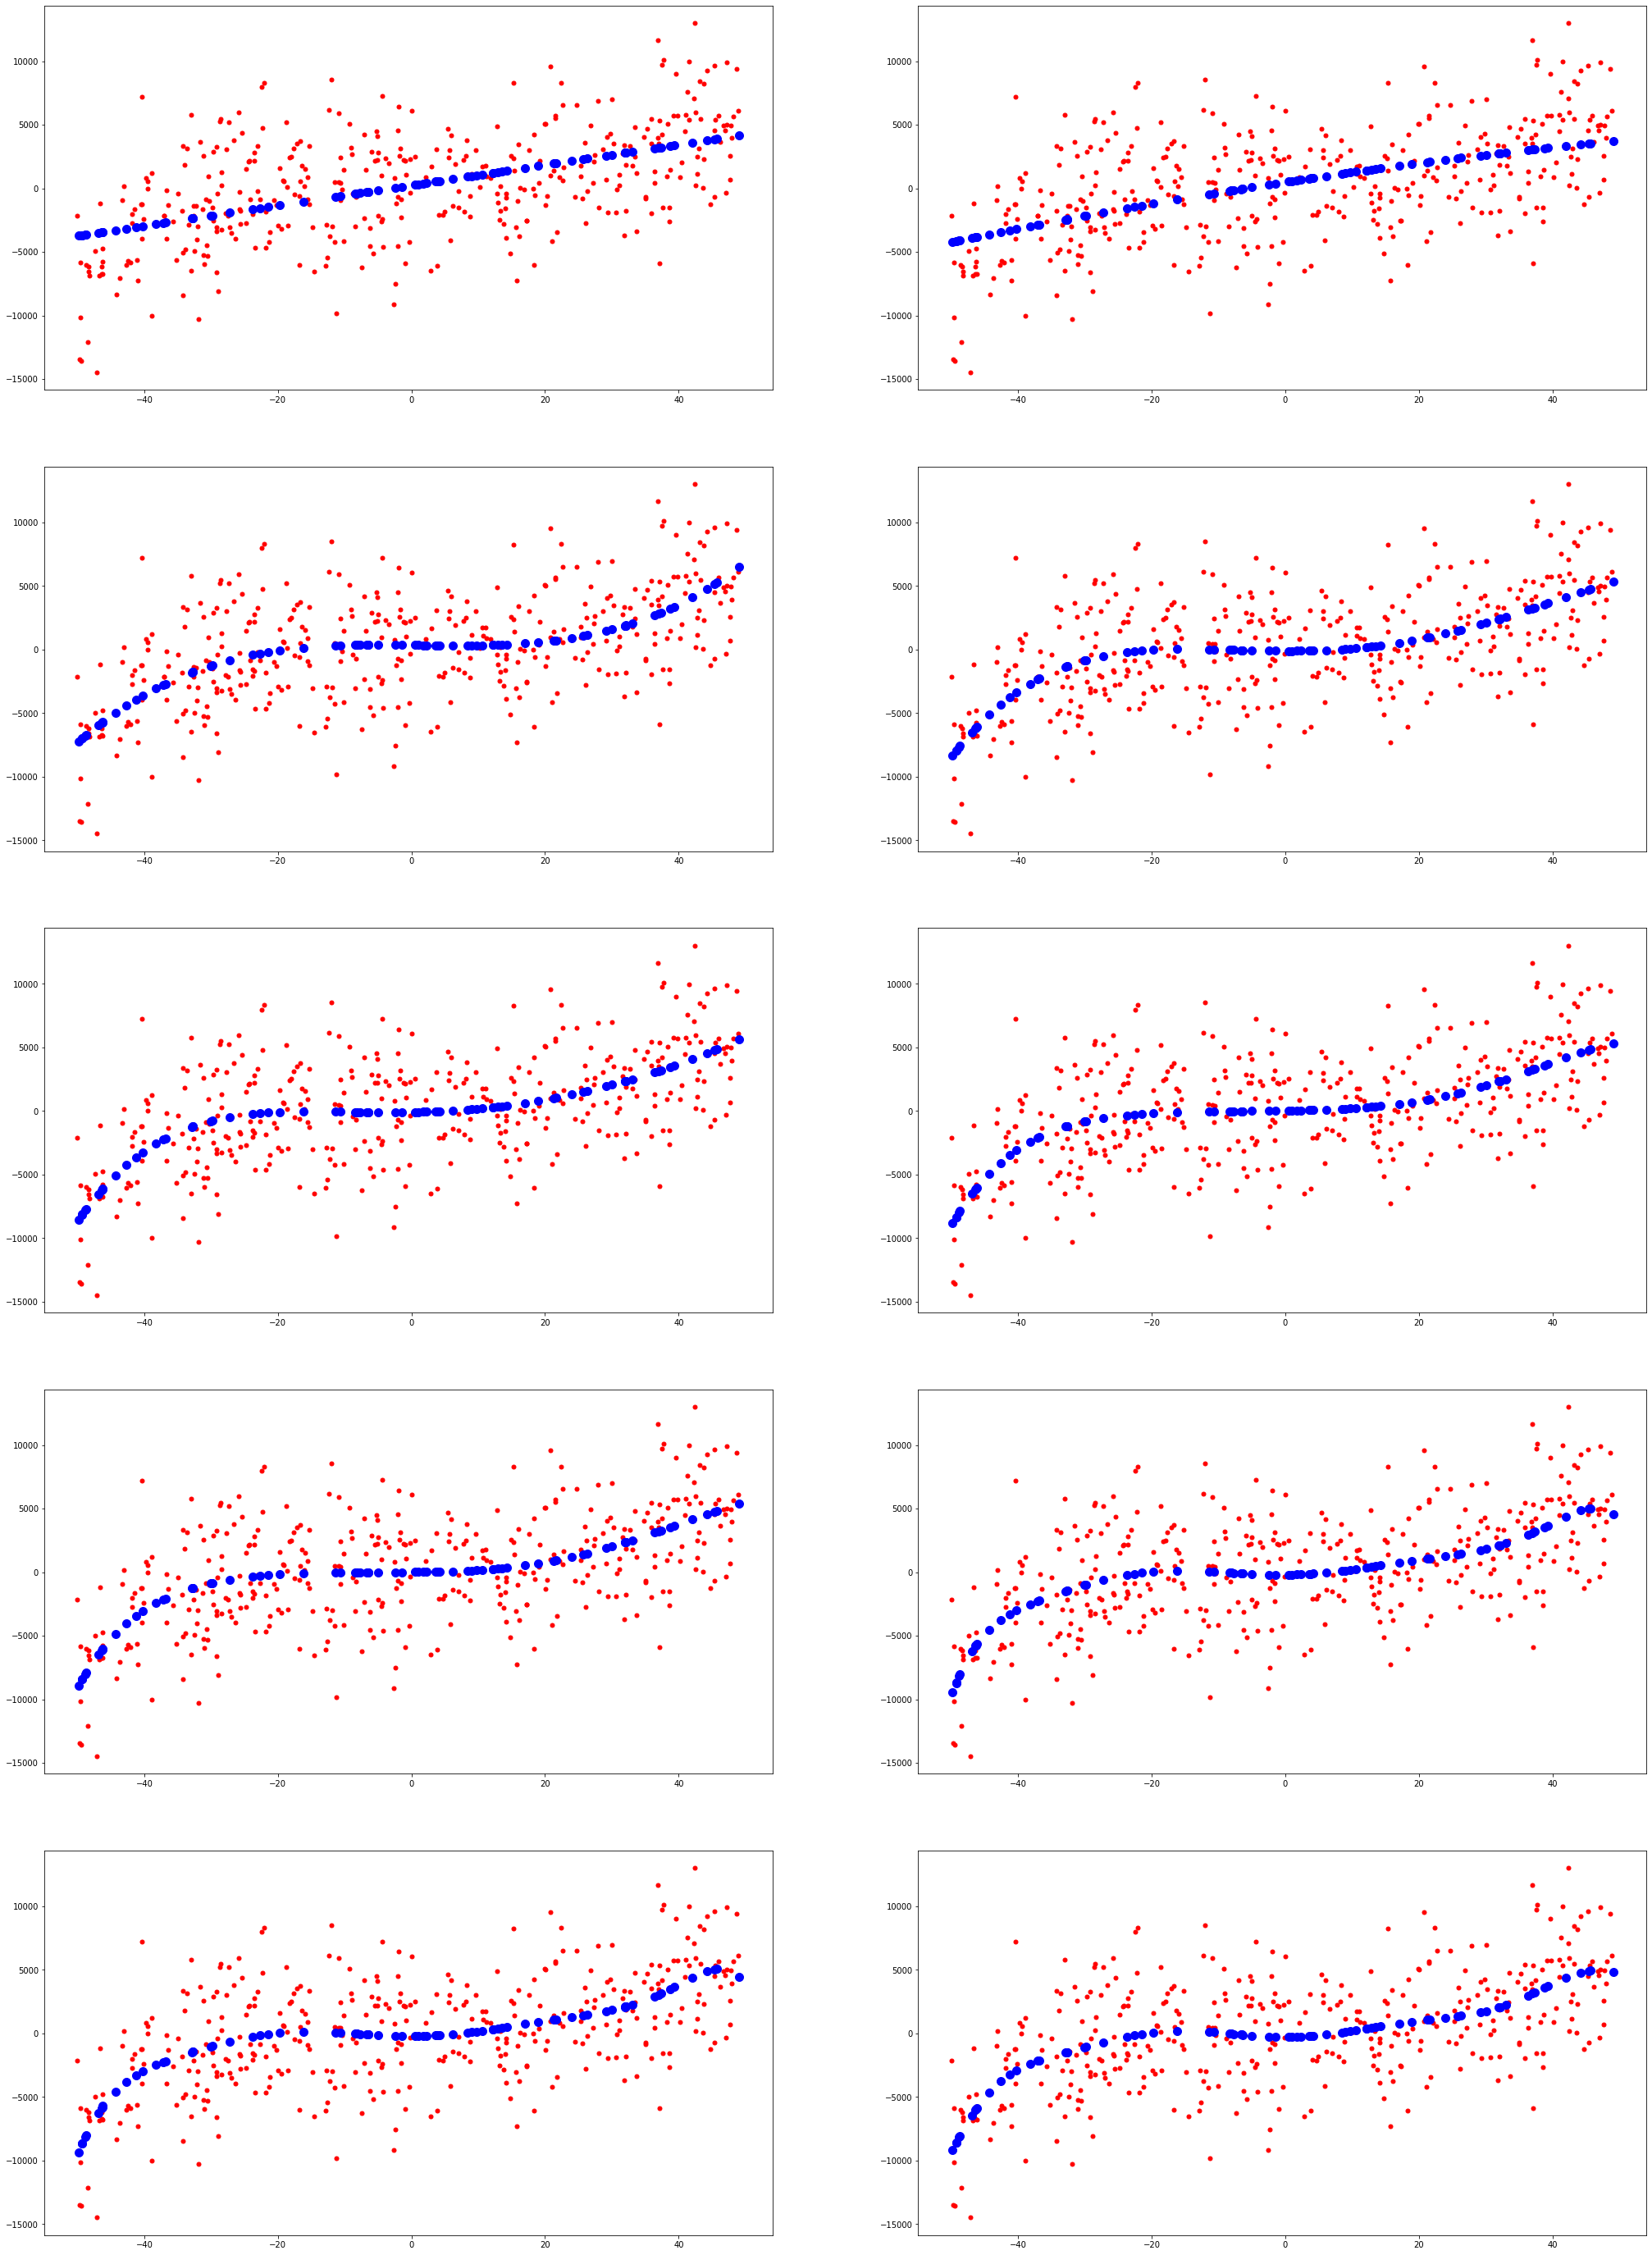

Fold Number 11


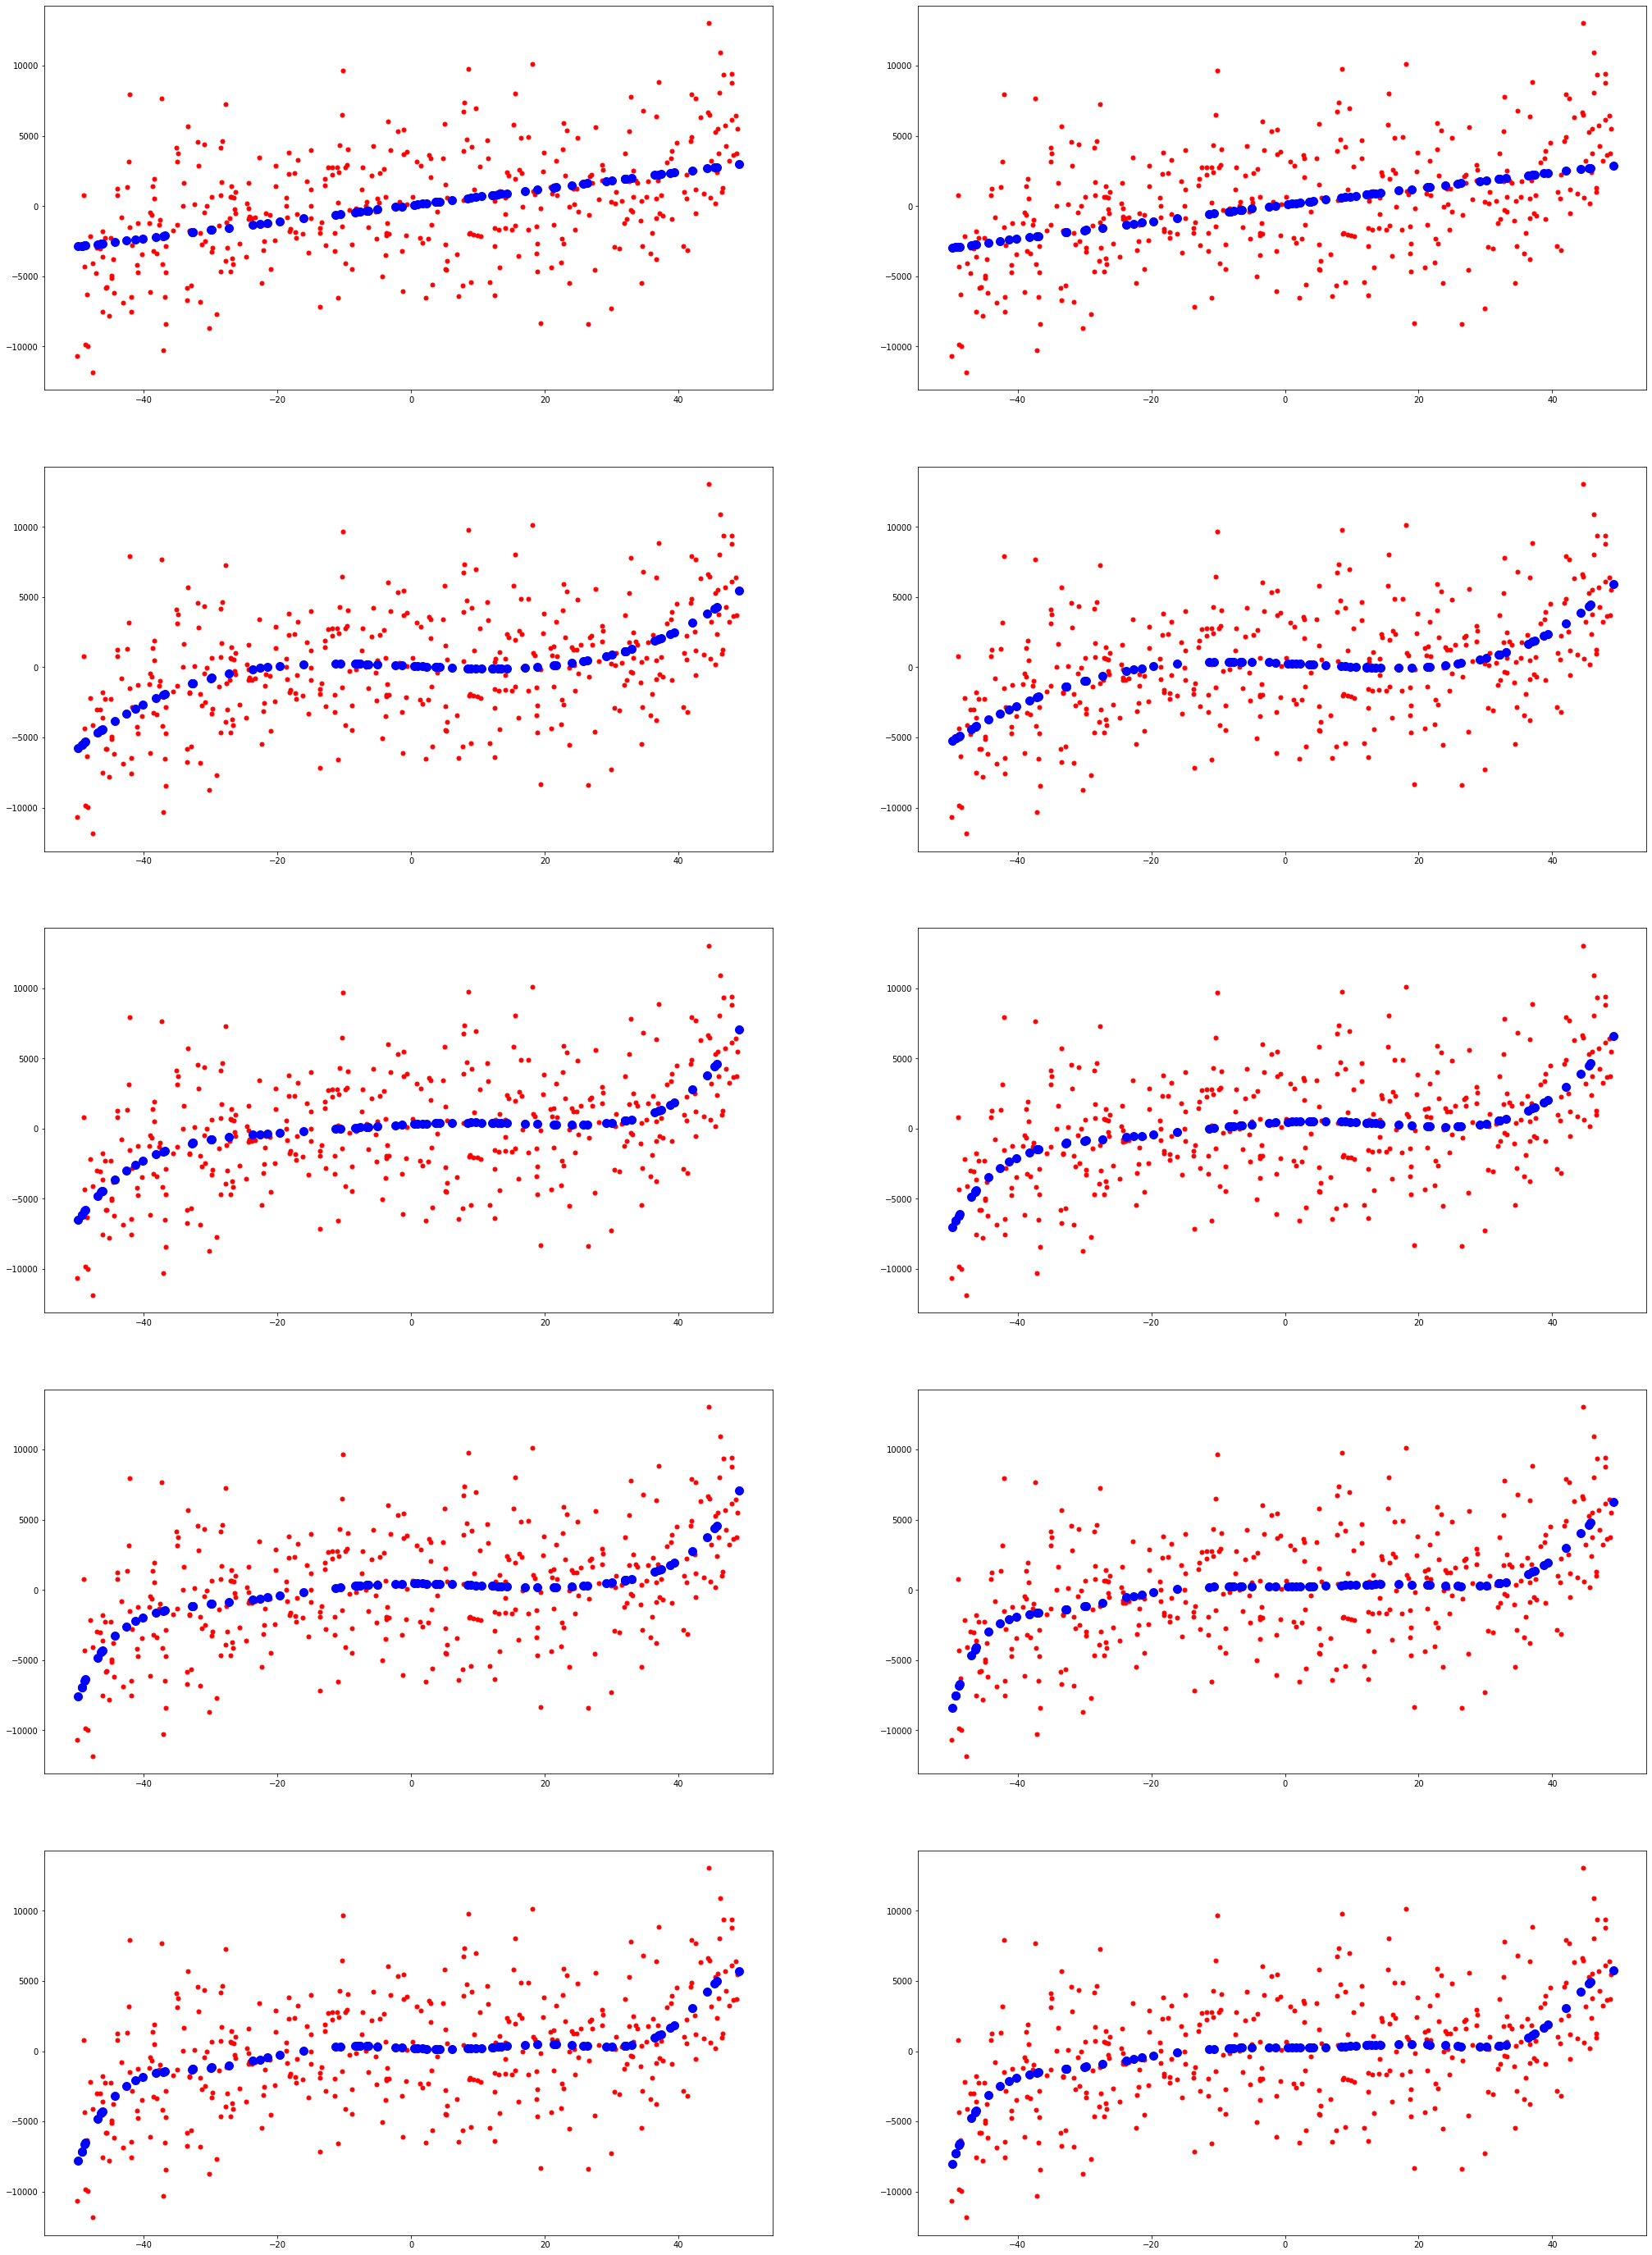

Fold Number 12


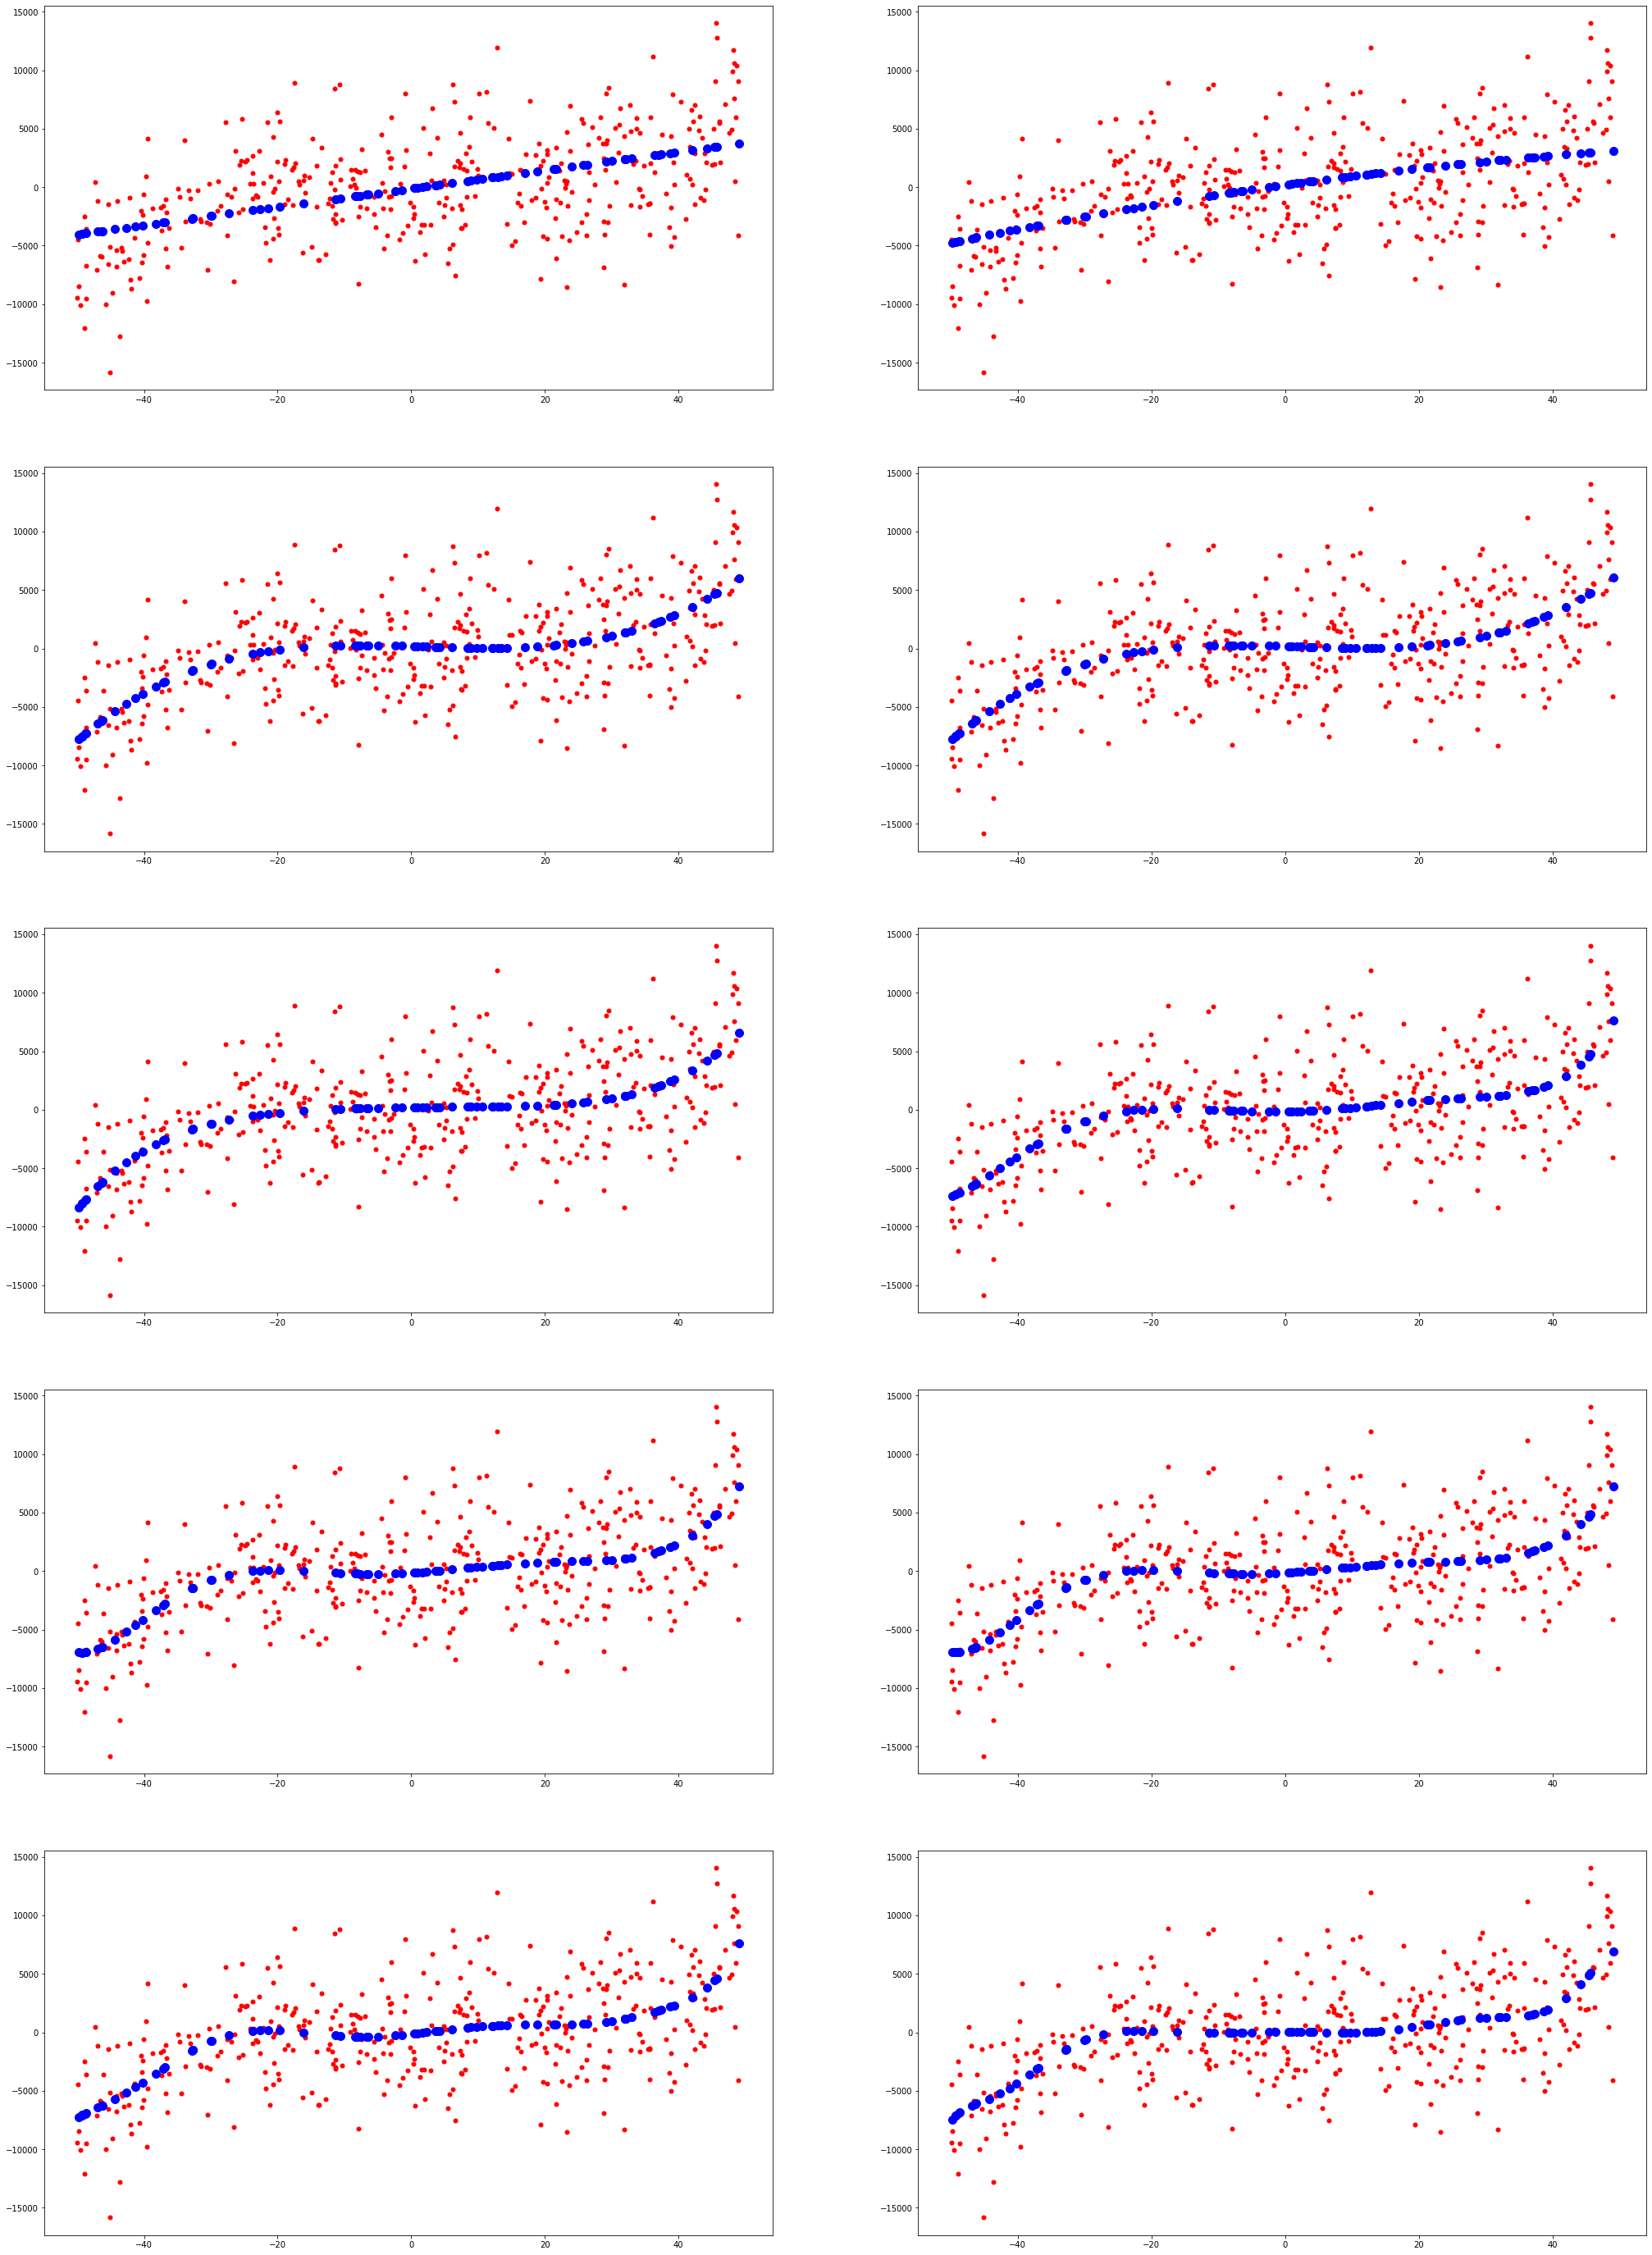

Fold Number 13


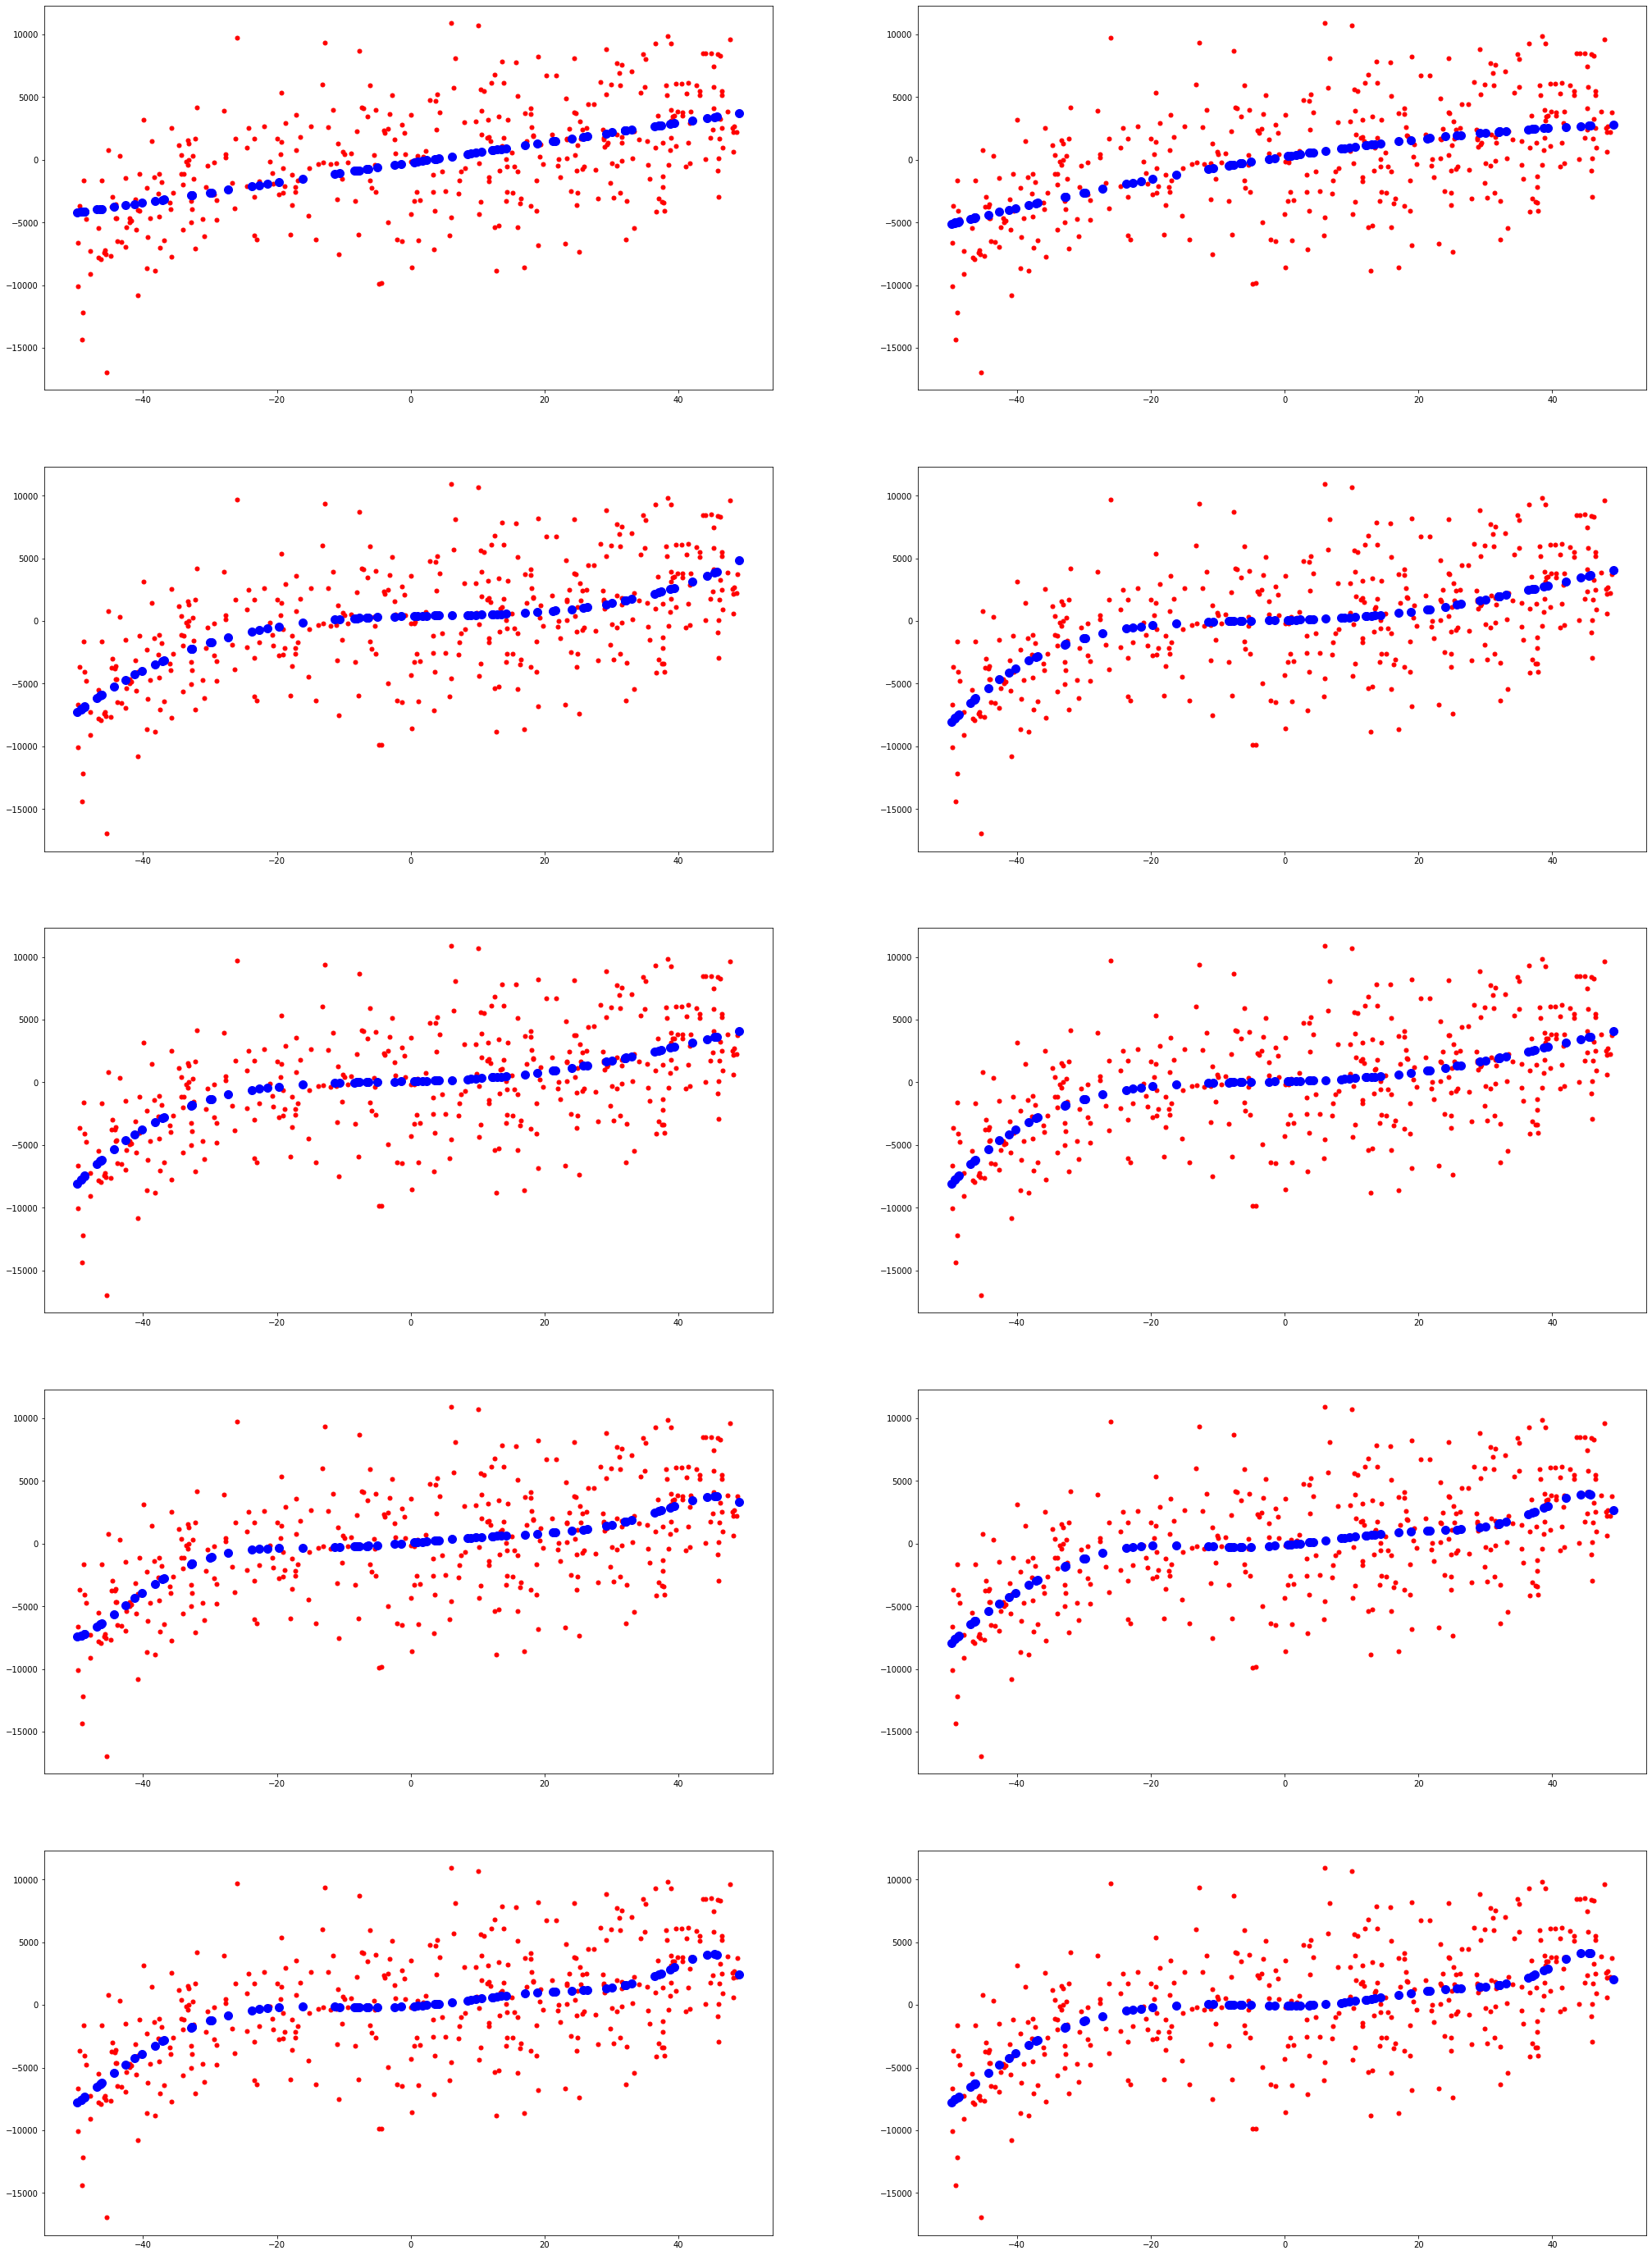

Fold Number 14


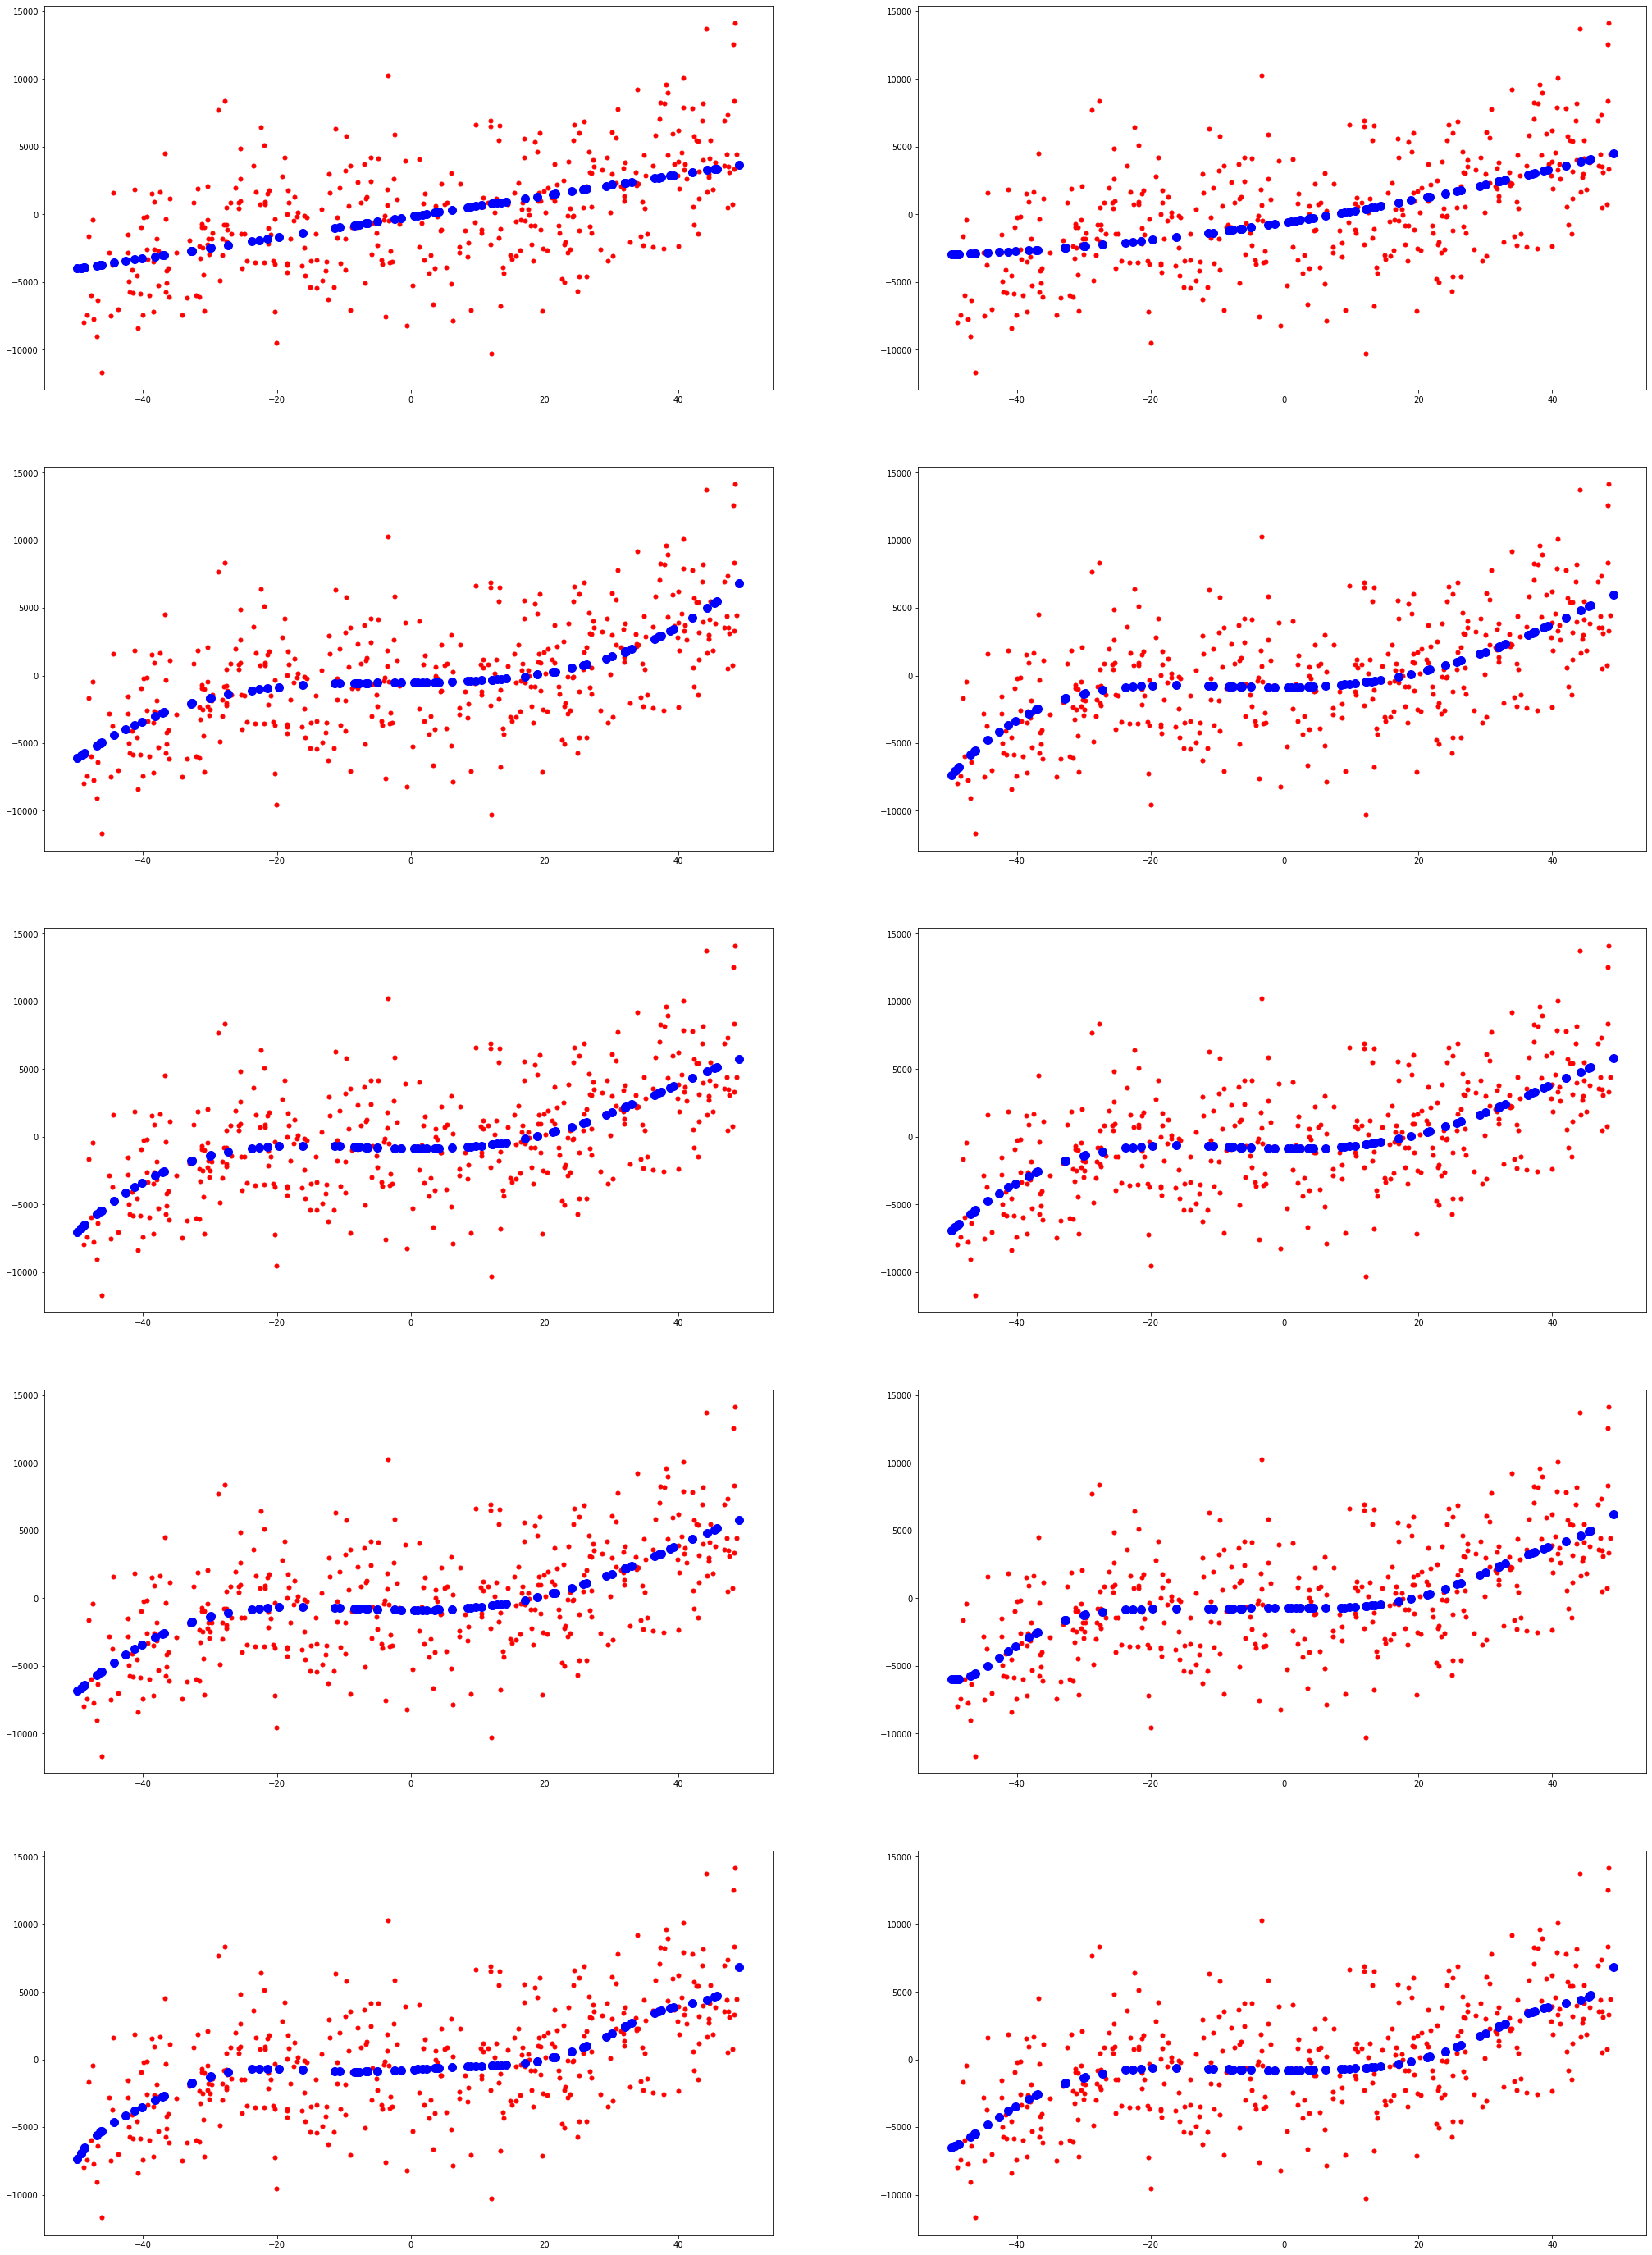

Fold Number 15


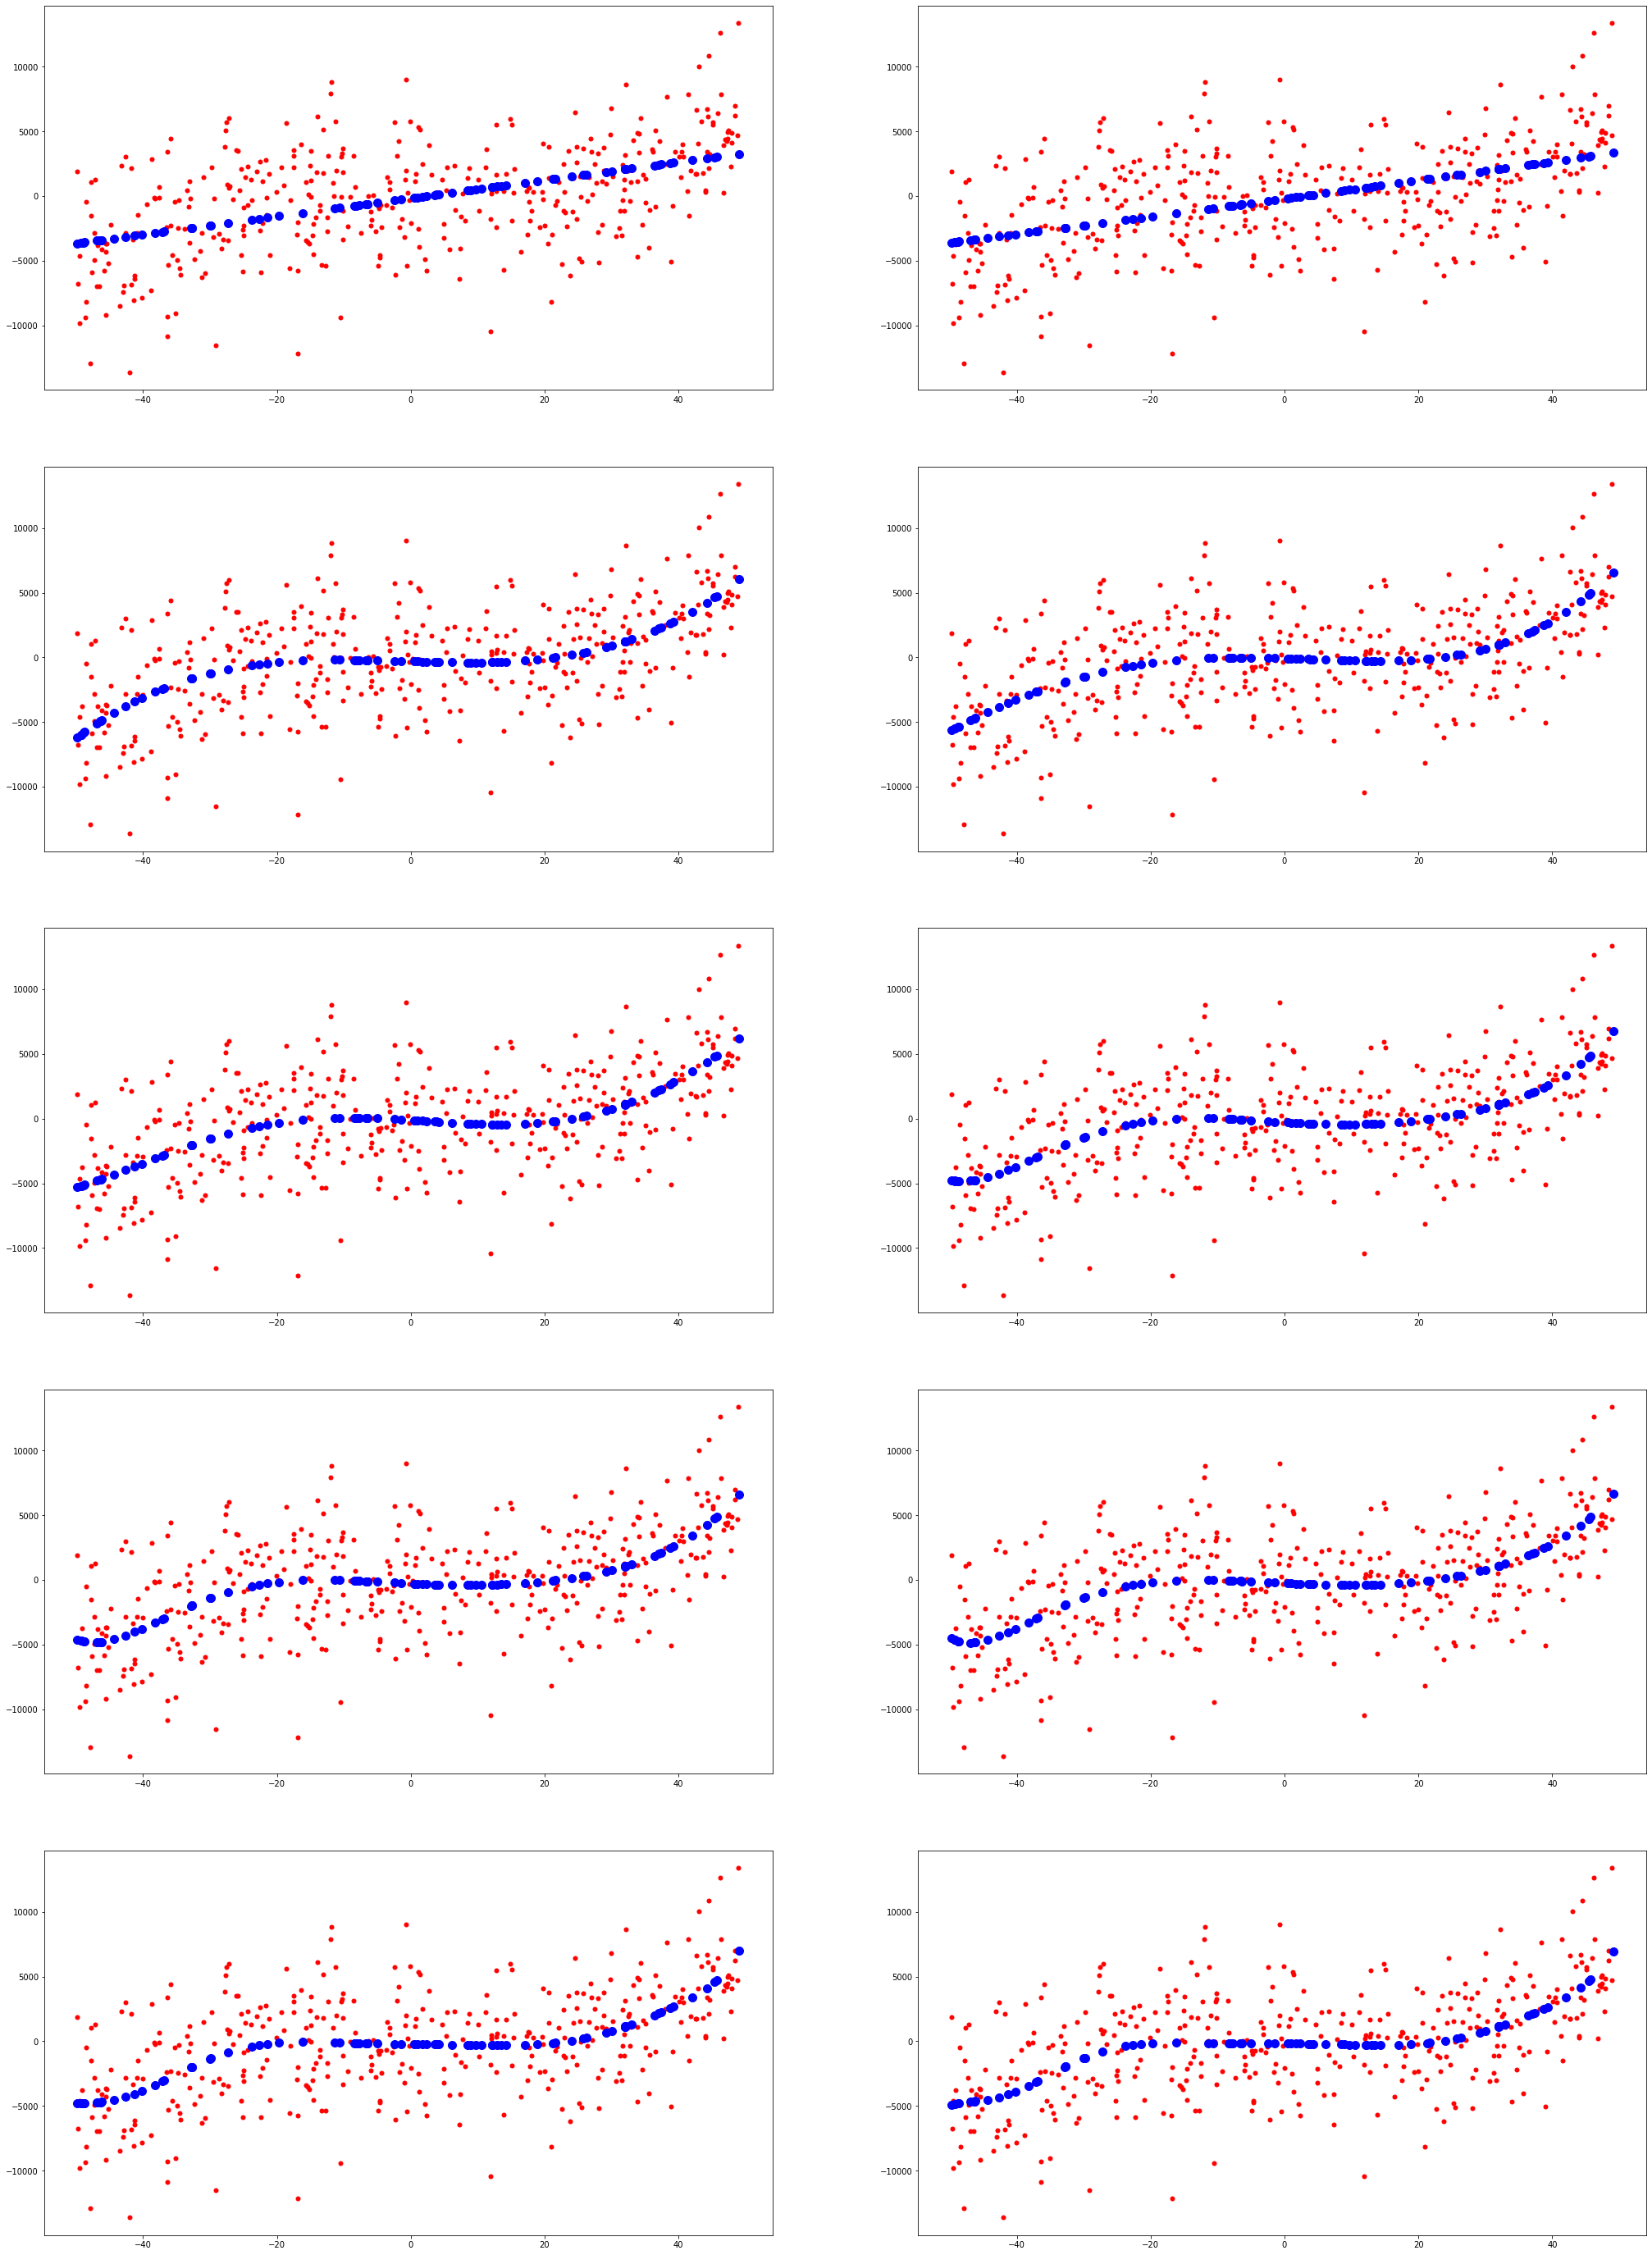

Fold Number 16


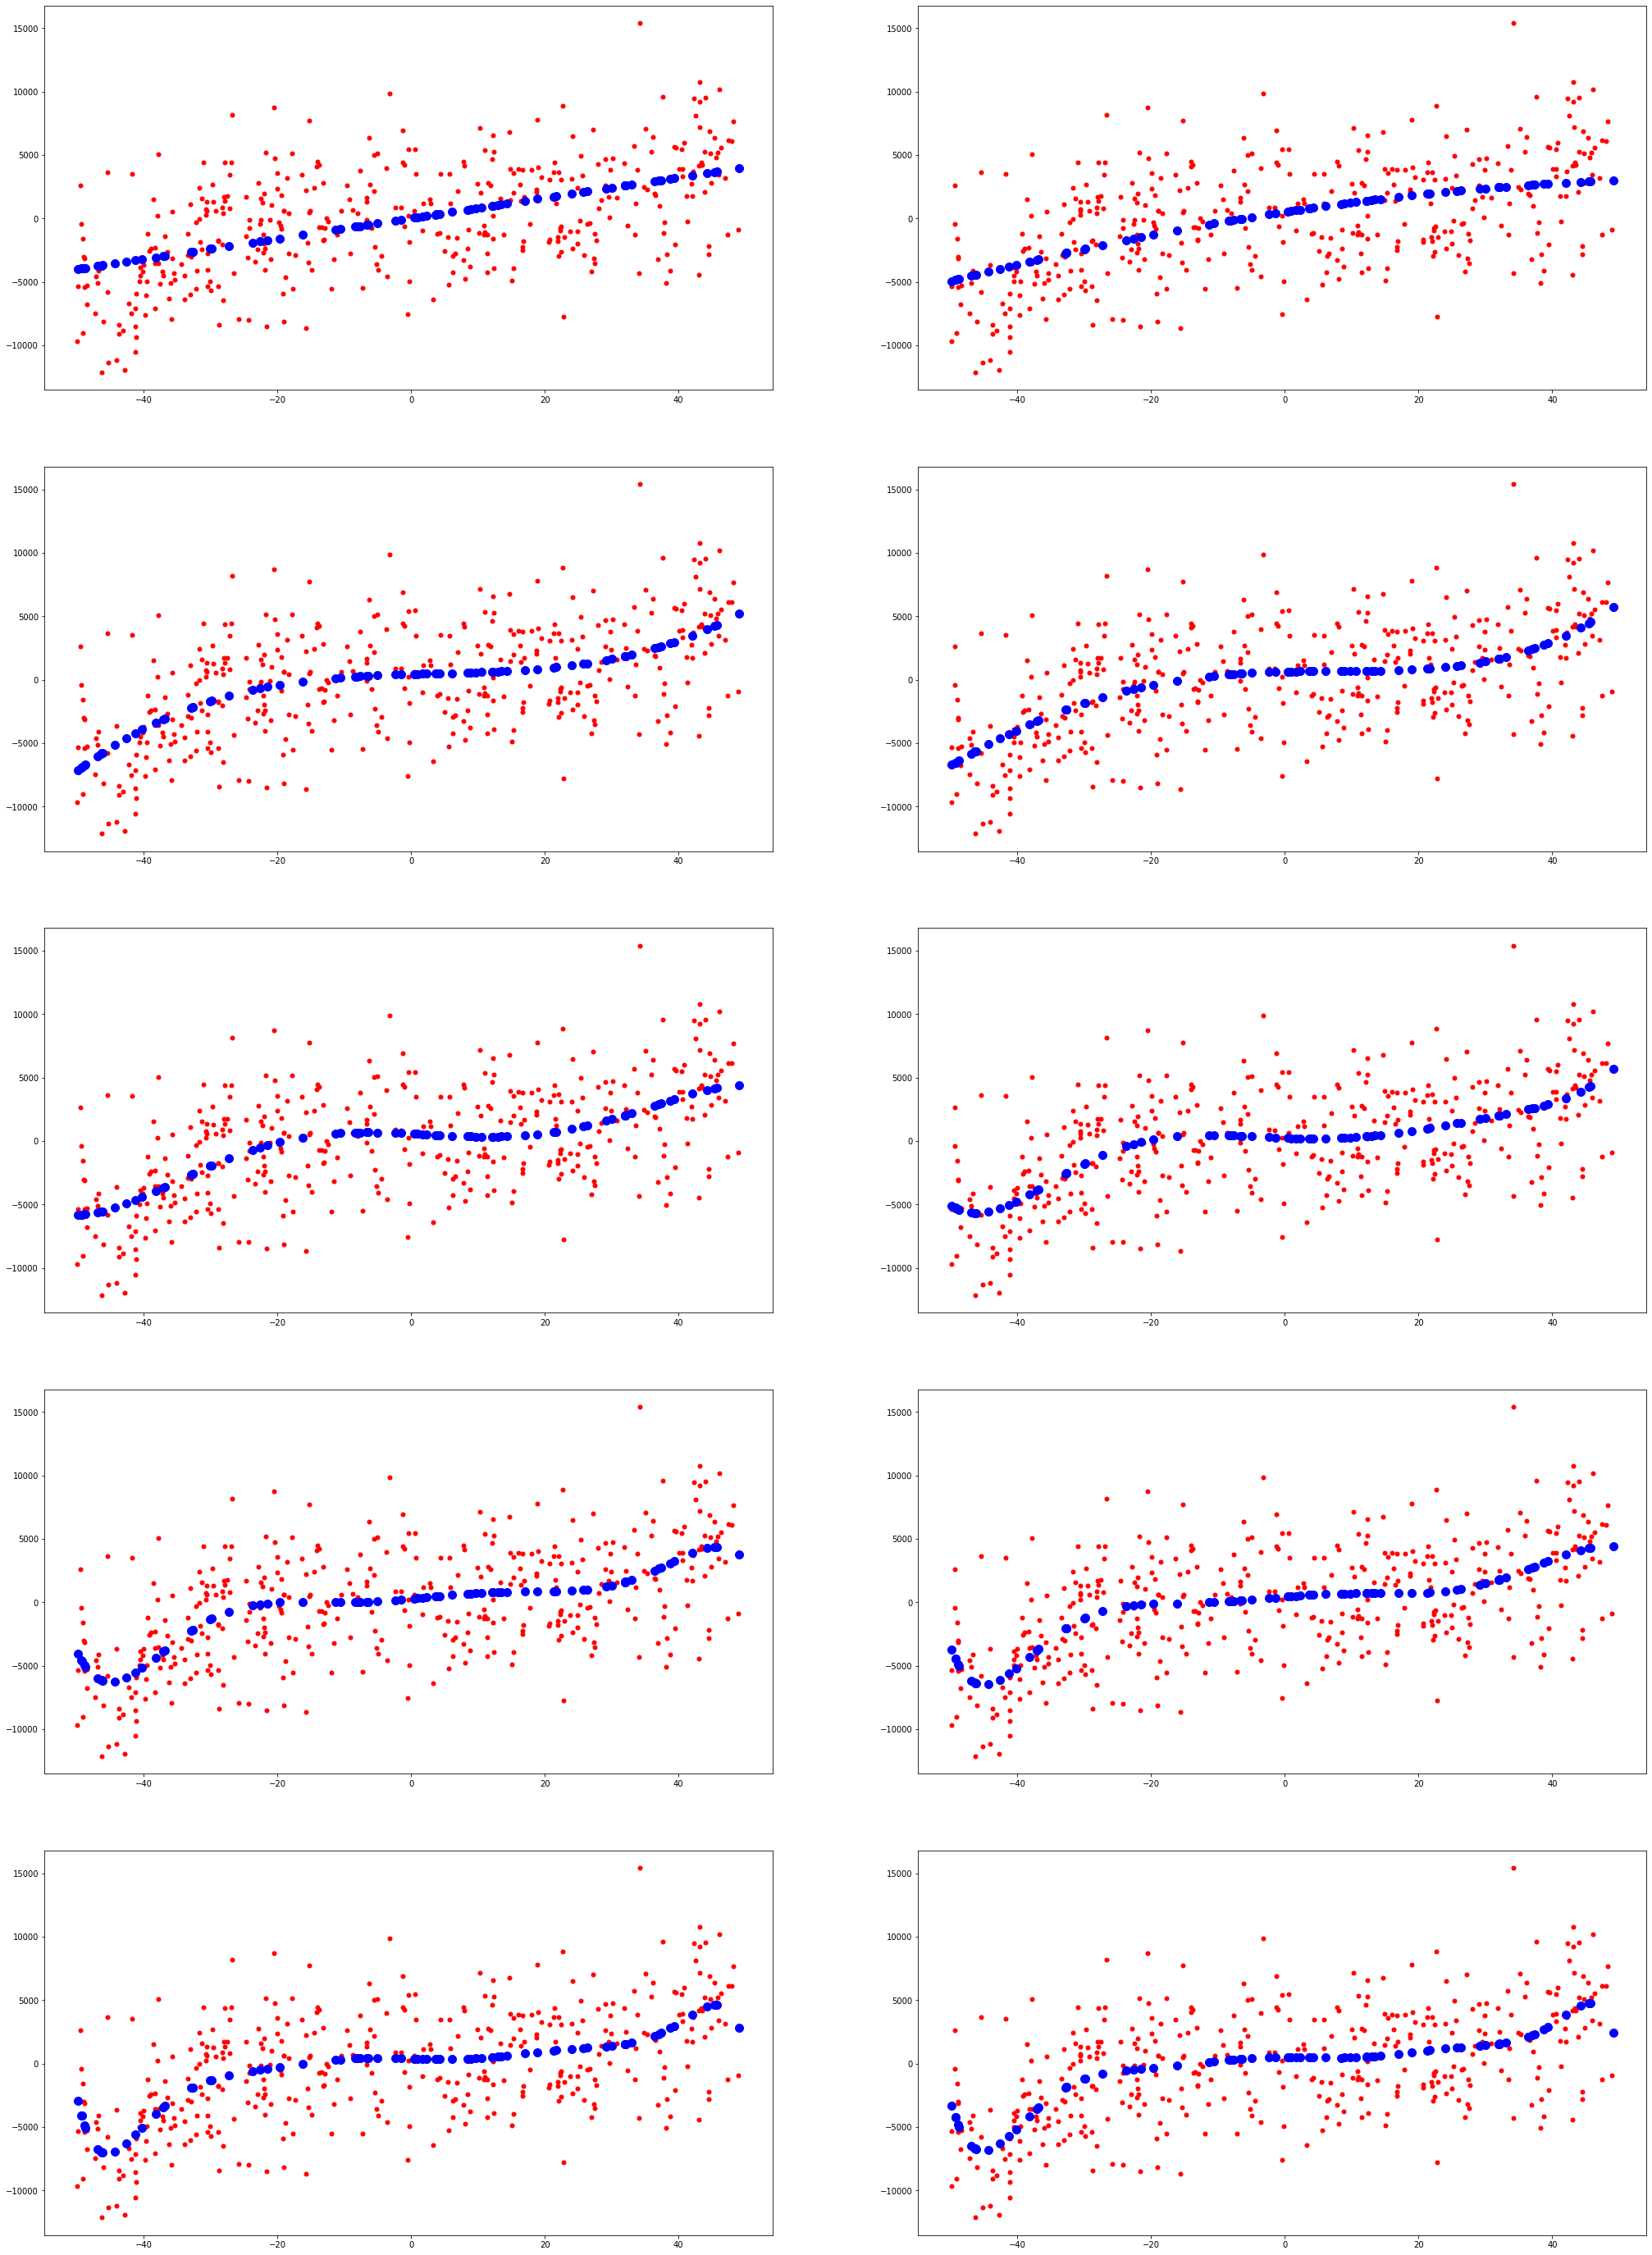

Fold Number 17


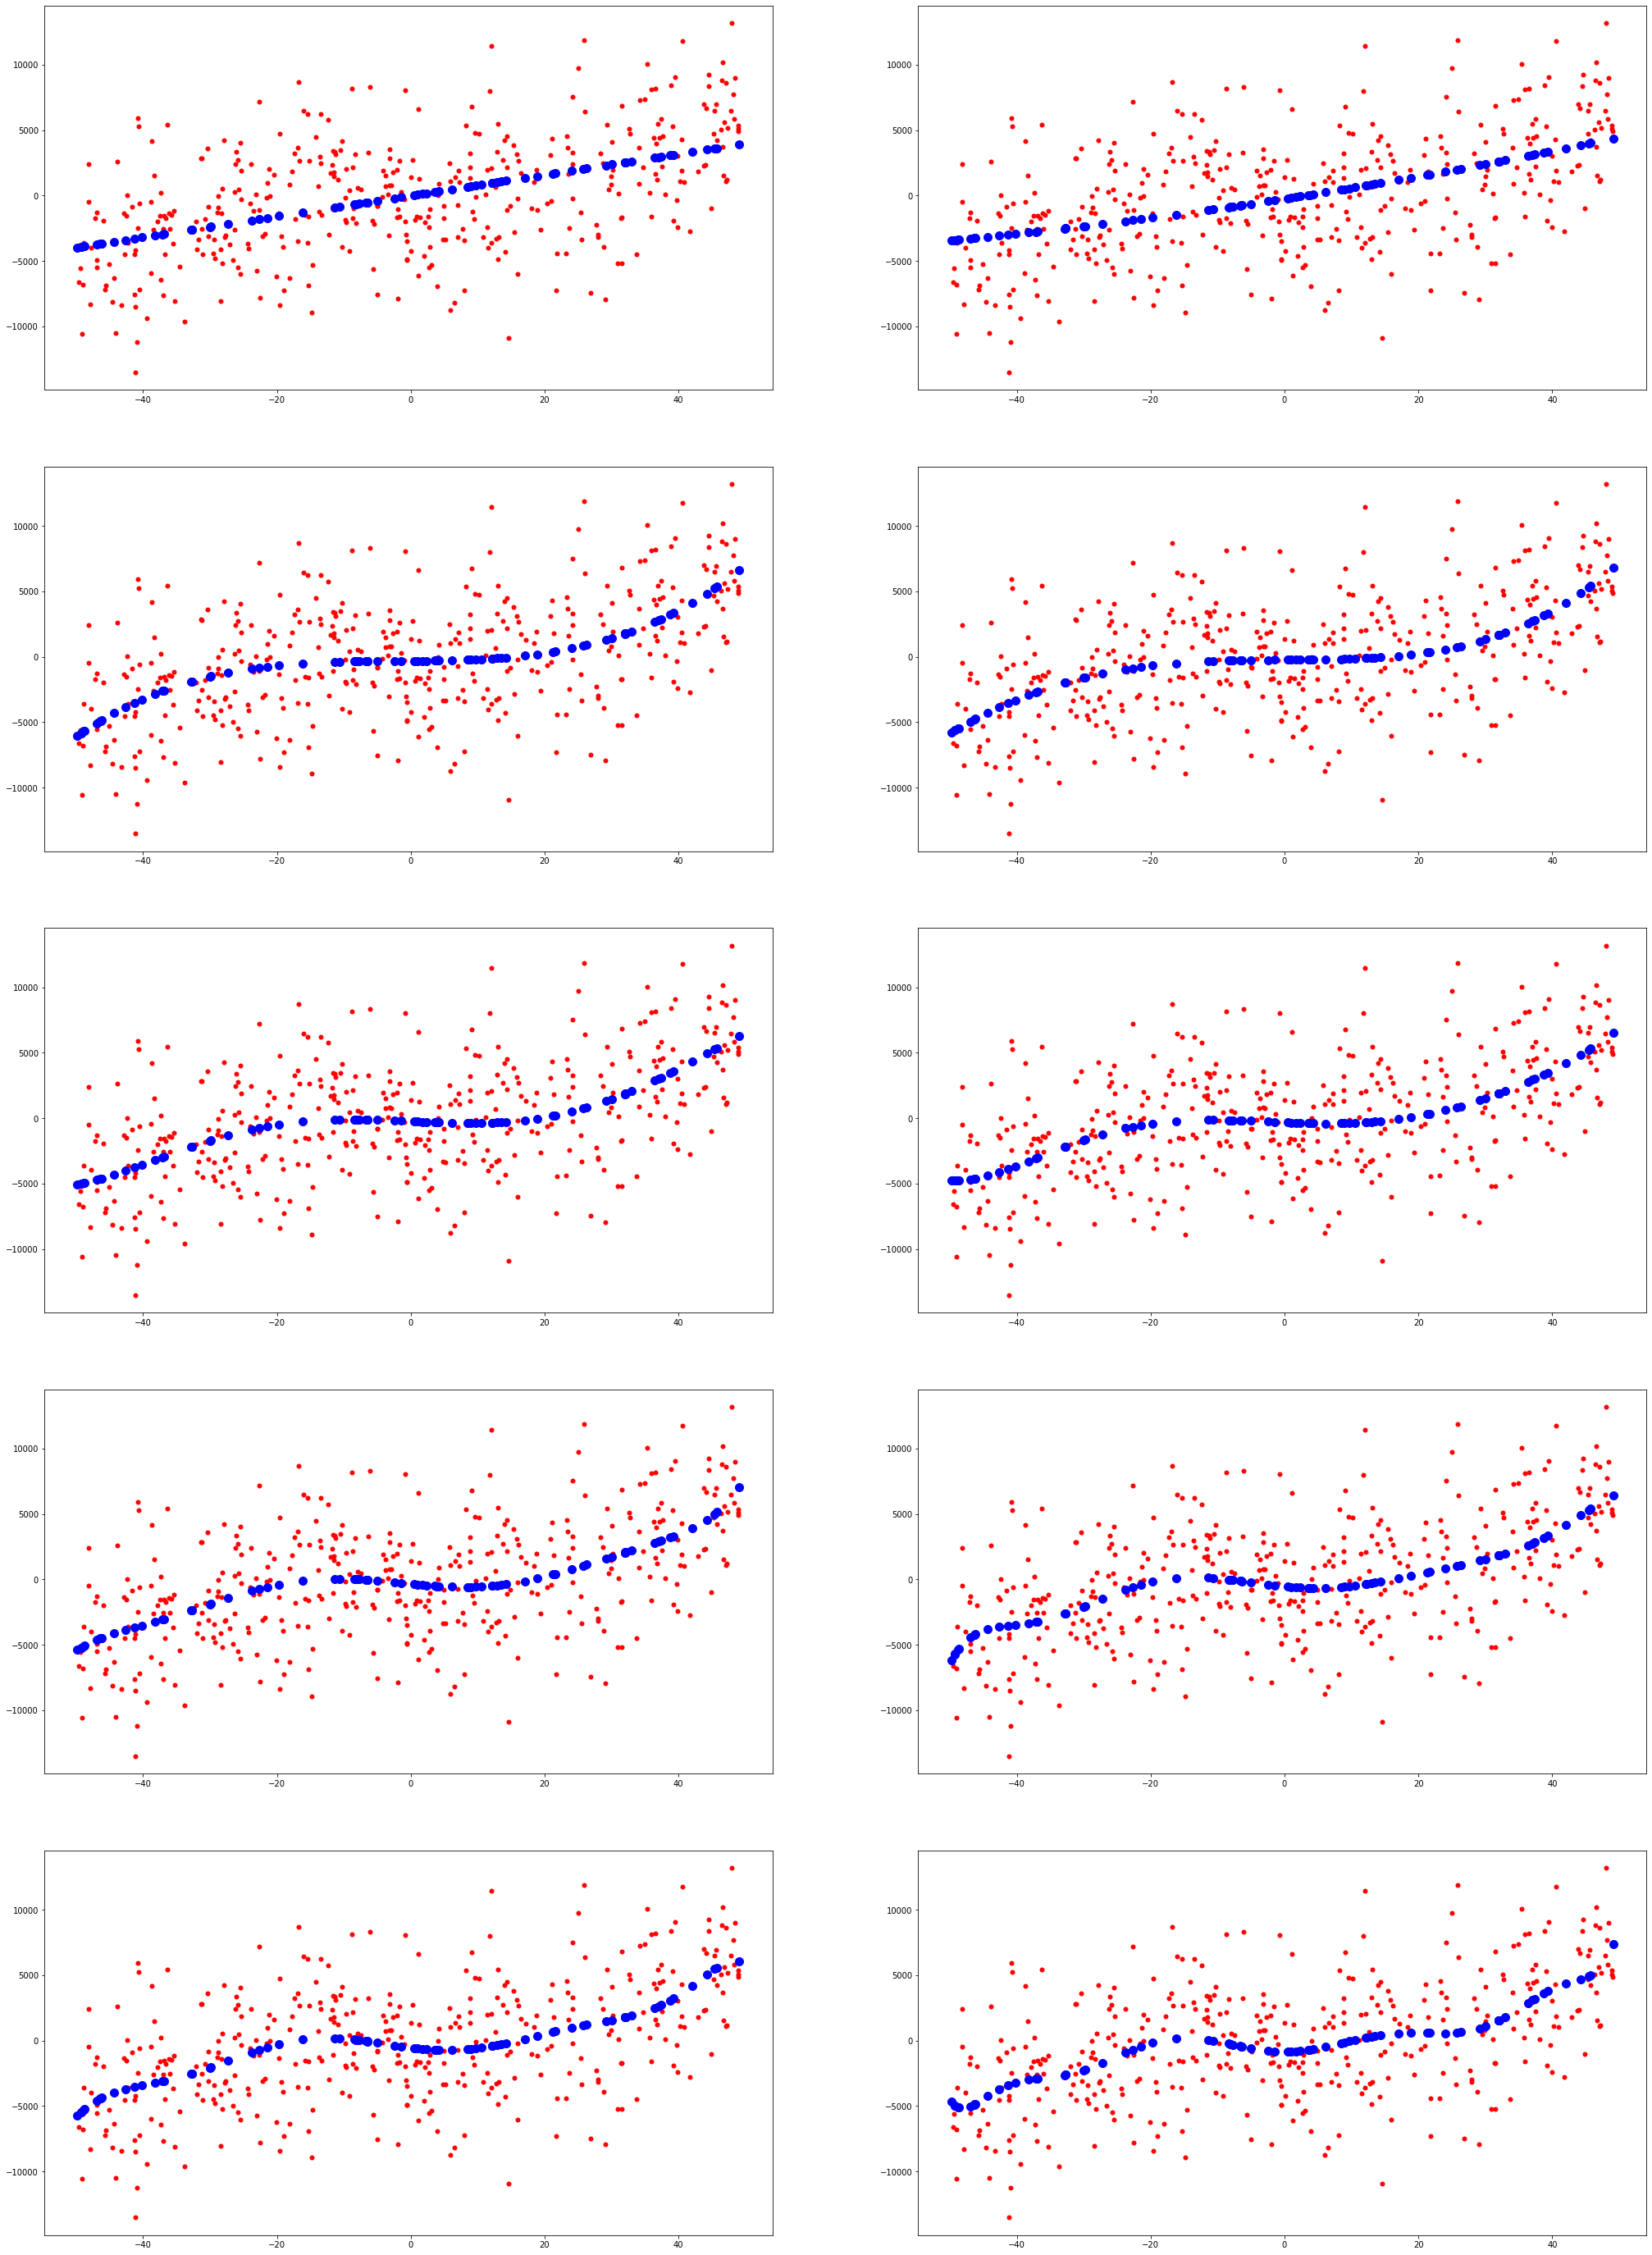

Fold Number 18


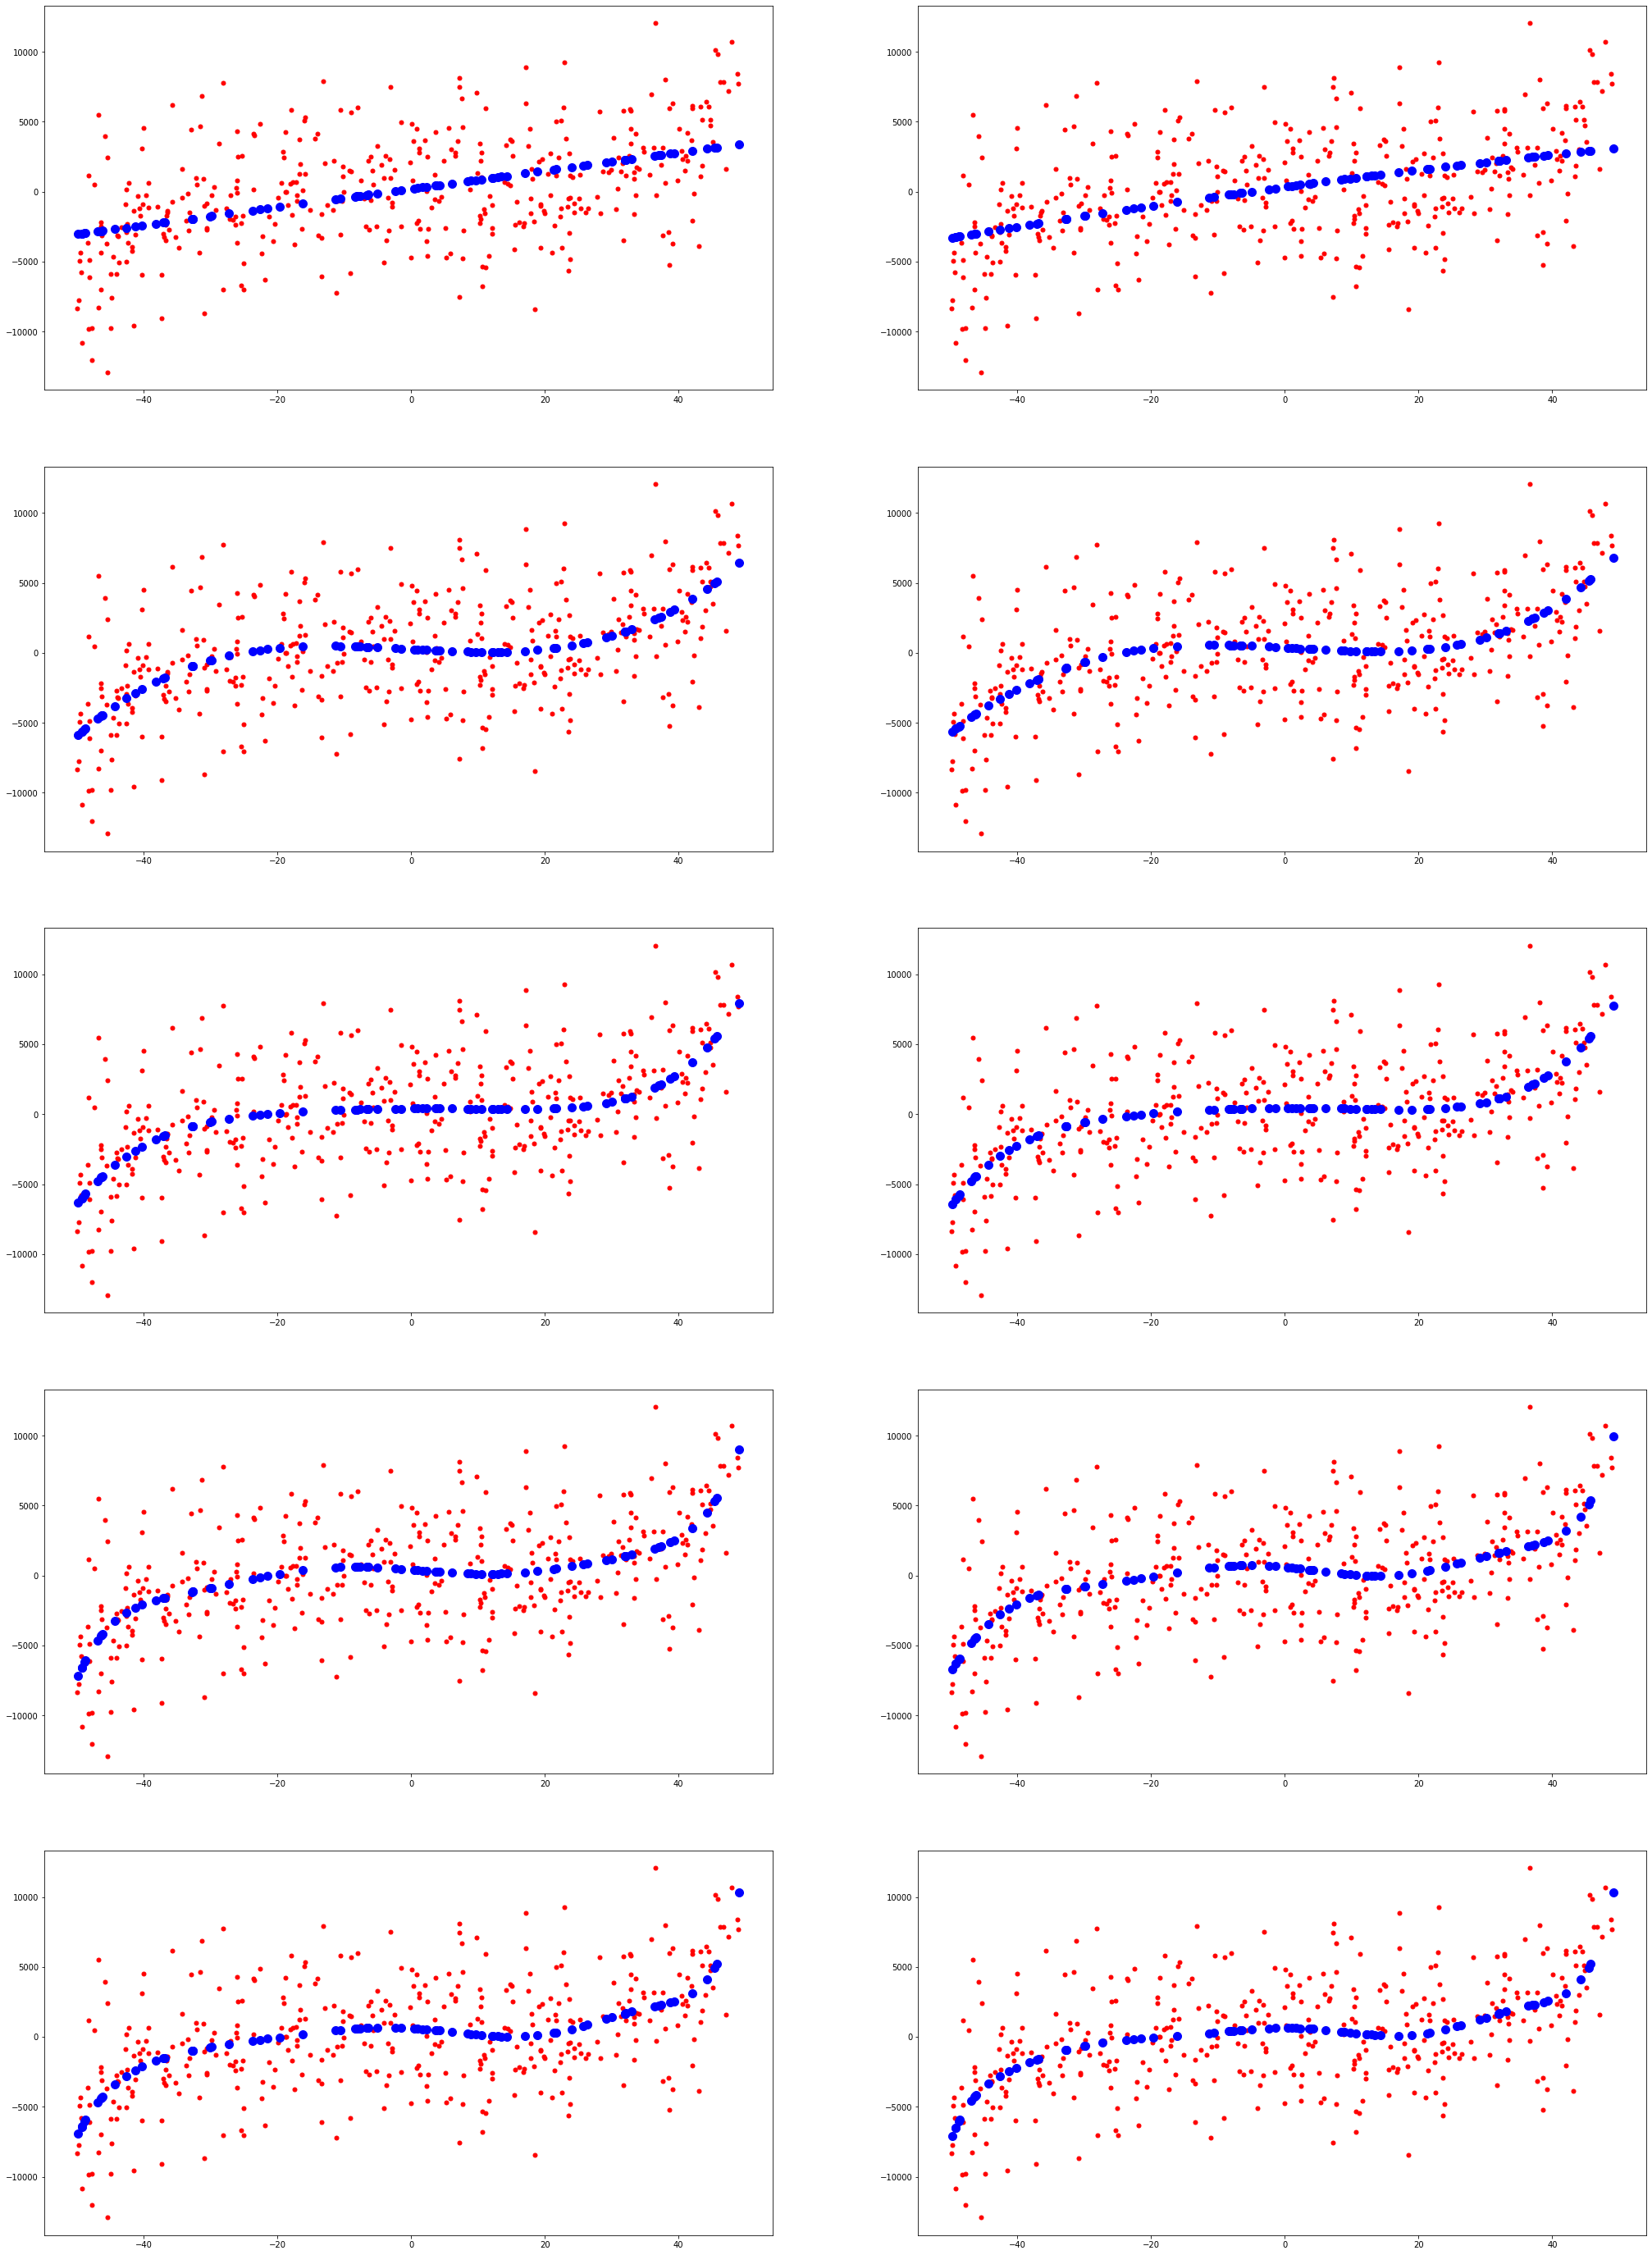

Fold Number 19


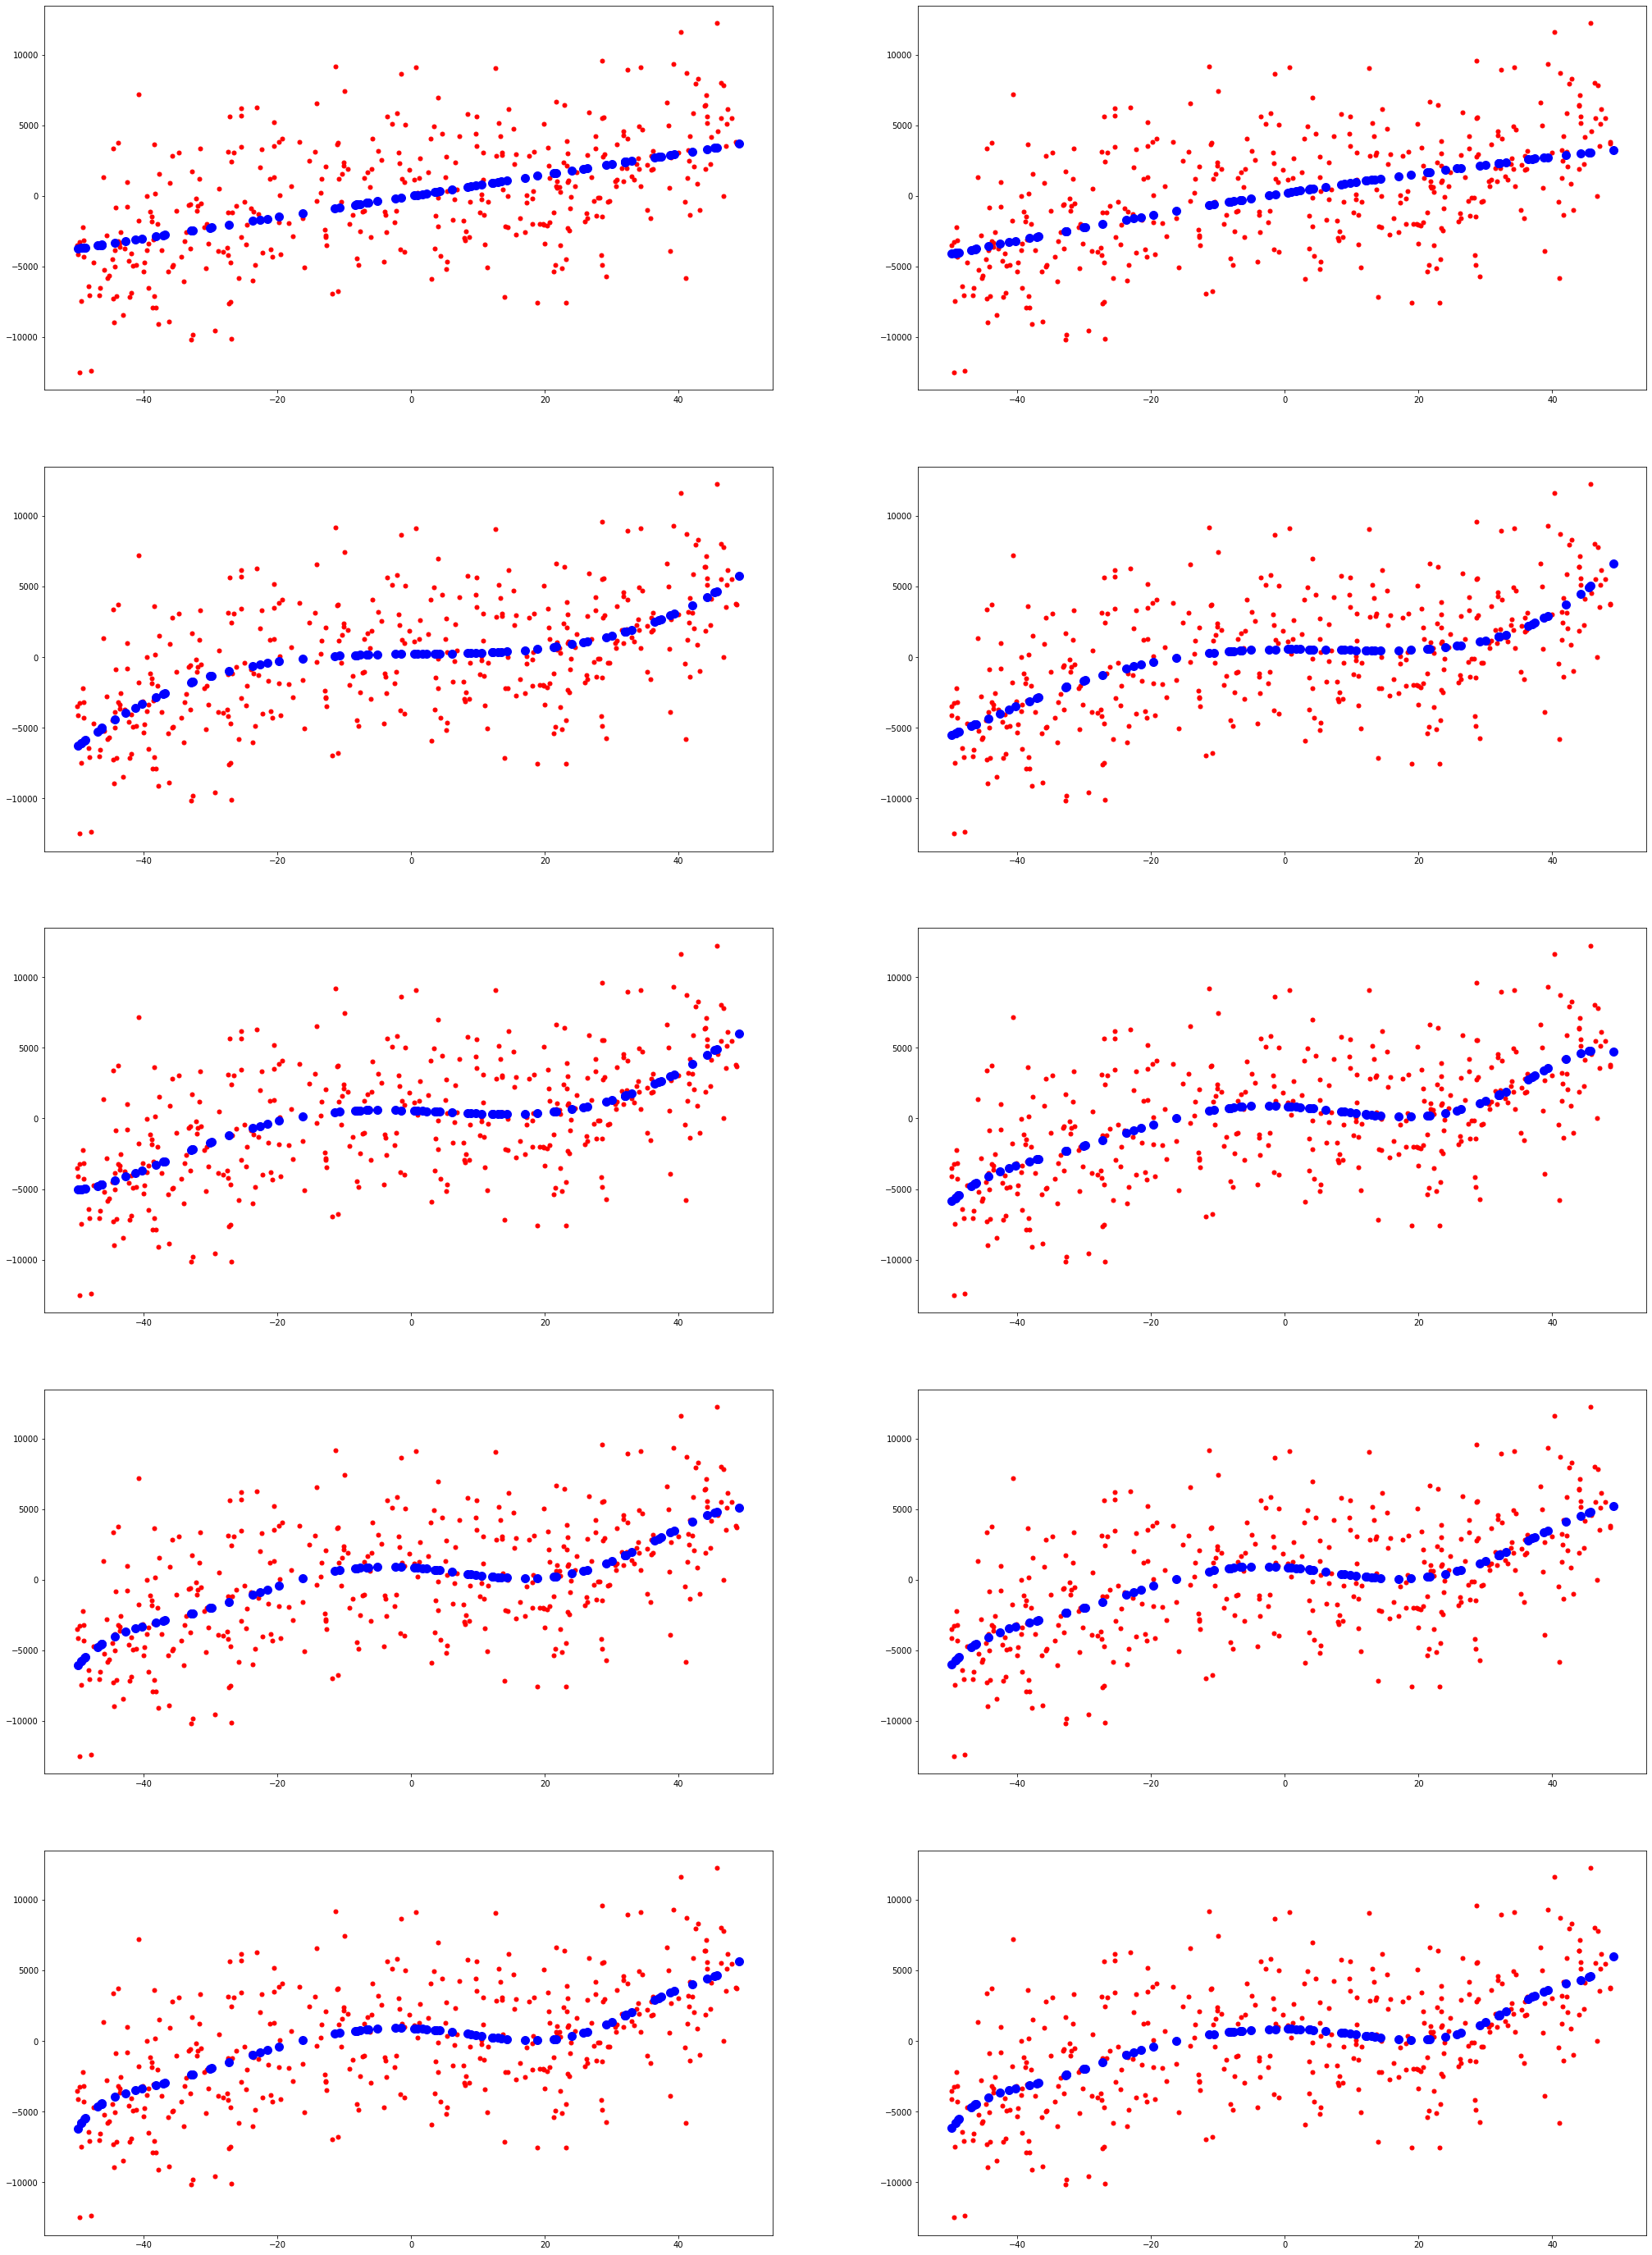

Fold Number 20


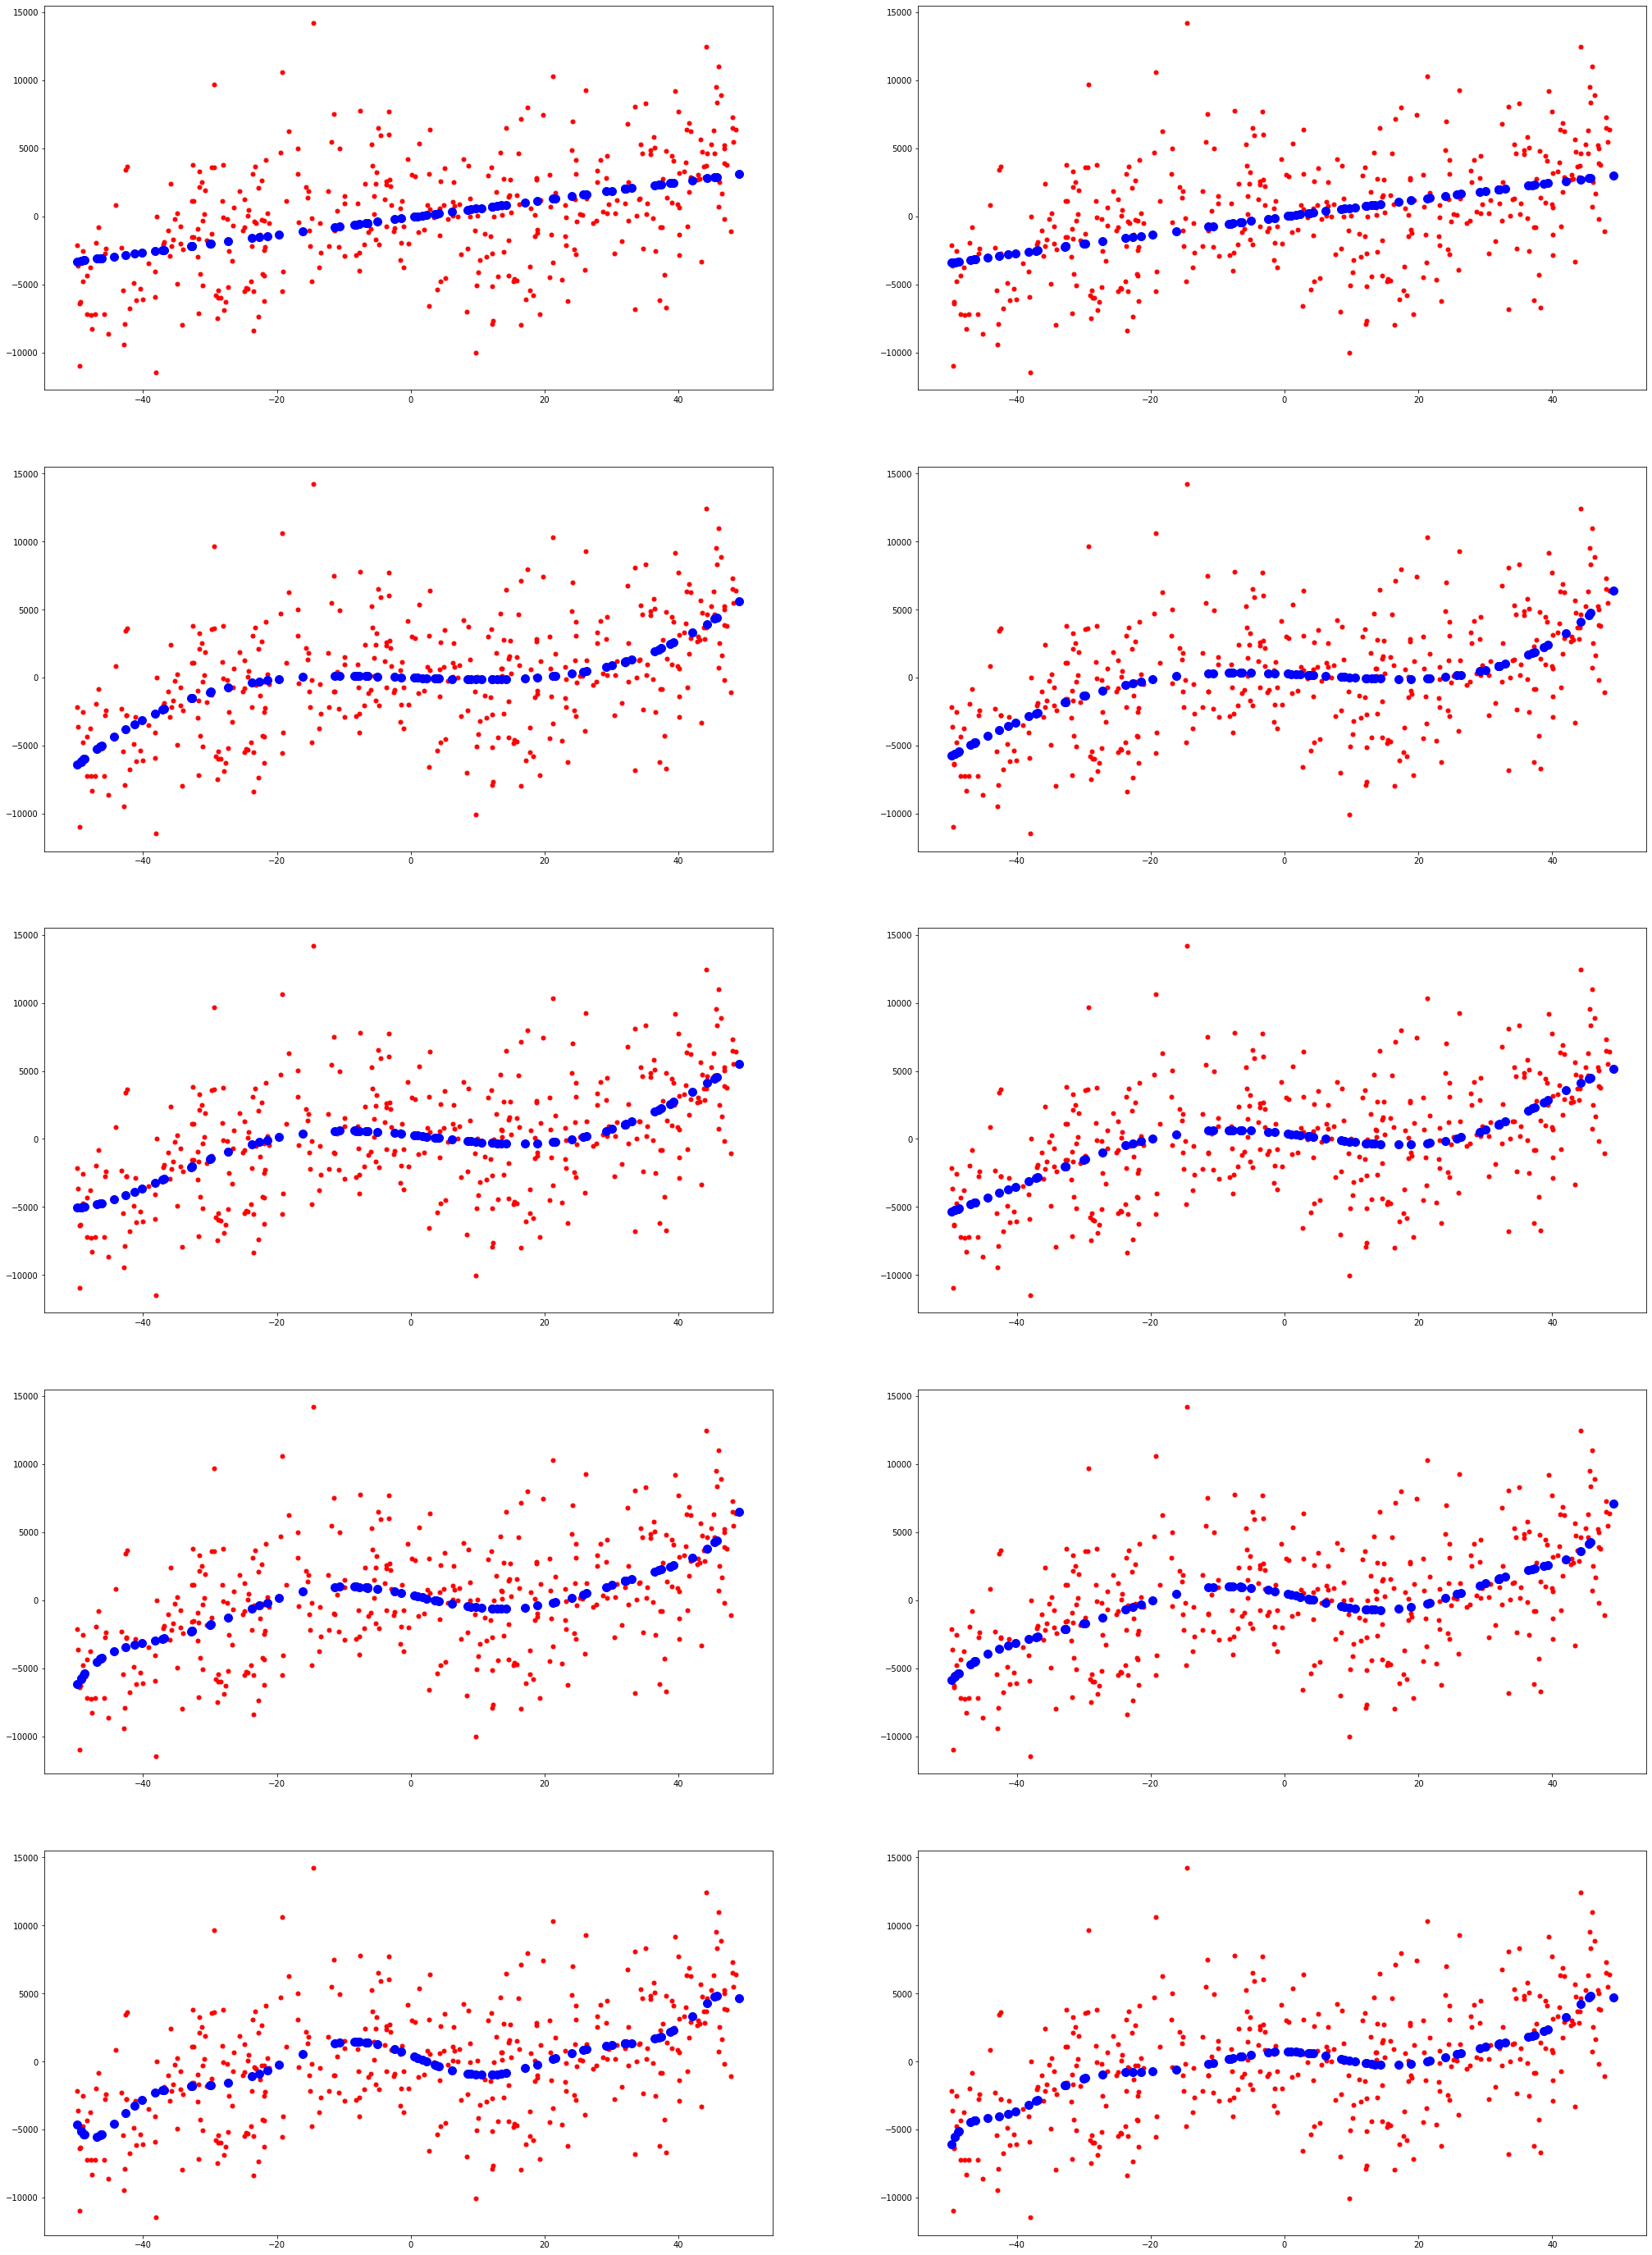

In [138]:
y_predicted = []
for i in range(20):
        print("Fold Number", i+1)
        fig, axes = plt.subplots(5, 2, figsize=(35, 50))
        x = xTrain[i]
        y = yTrain[i]
        temp = []
        for power in range(0, 10):
            #plot the points
            axes[int(power / 2)][int(power % 2)].plot(x, y, 'r.', markersize=10)
             
            poly_feat = PolynomialFeatures(degree = power + 1)
            features = poly_feat.fit_transform(x)
            poly_model = LinearRegression()
            poly_model.fit(features, y)
            y_test_predict = poly_model.predict(poly_feat.fit_transform(xTest[:, :]))
            
            axes[int(power / 2)][int(power % 2)].plot(xTest[:, :], y_test_predict, 'b.', markersize=20)
            temp.append(y_test_predict)
        y_predicted.append(temp)
        plt.show()

In [139]:
len(y_predicted)

20

In [140]:
def bias_variance(power):
    y_predicted_part = []
    for i in range(10):
        y_predicted_part.append(y_predicted[i][power])
    y_predicted_part = np.asarray(y_predicted_part)
    bias = np.mean(np.abs(y_predicted_part - yTest), axis=0)
    variance = np.var(y_predicted_part, axis=0)
    return(np.mean(bias), np.mean(variance))

In [141]:
bias = []
variance = []
for i in range(0, 10):
    b, v = bias_variance(i)
    bias.append(b)
    variance.append(v)
print("Bias:", bias)
print("Variance:", variance)

Bias: [847.1870928110623, 843.9506159100089, 290.6671551590036, 337.18881440273134, 377.79216418728885, 418.04947560795745, 440.86204184239614, 482.5713137876748, 497.66982711498514, 499.6720009584087]
Variance: [74599.47845405174, 100503.12083722159, 148983.89625960536, 201219.3116763339, 266225.9469661422, 319399.10340579244, 348141.12904503016, 407651.10498471797, 461857.41438096884, 486476.3678529851]


In [142]:
final_table = dict()
final_table["Power"] = range(1, 11)
final_table["Bias"] = bias
final_table["Bias_Square"] = list(np.array(bias) ** 2)
final_table["Variance"] = variance
final_table["MSE"] = list(np.array(final_table["Bias_Square"]) + np.array(variance))
df = pd.DataFrame(final_table)
print(df)

   Power        Bias    Bias_Square       Variance            MSE
0      1  847.187093  717725.970226   74599.478454  792325.448680
1      2  843.950616  712252.642095  100503.120837  812755.762932
2      3  290.667155   84487.395088  148983.896260  233471.291348
3      4  337.188814  113696.296558  201219.311676  314915.608235
4      5  377.792164  142726.919321  266225.946966  408952.866287
5      6  418.049476  174765.364056  319399.103406  494164.467462
6      7  440.862042  194359.339937  348141.129045  542500.468982
7      8  482.571314  232875.072891  407651.104985  640526.177875
8      9  497.669827  247675.256821  461857.414381  709532.671202
9     10  499.672001  249672.108542  486476.367853  736148.476395


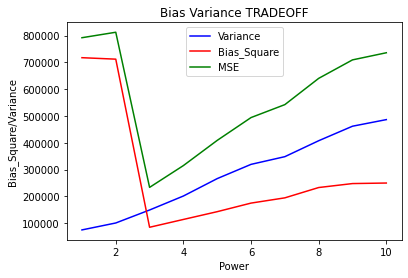

In [143]:
plt.plot(final_table["Power"], final_table["Variance"], color="blue")
plt.plot(final_table["Power"], final_table["Bias_Square"], color="red")
plt.plot(final_table["Power"], final_table["MSE"], color="green")
plt.title("Bias Variance TRADEOFF")
plt.xlabel("Power")
plt.ylabel("Bias_Square/Variance")
plt.legend(["Variance", "Bias_Square", "MSE"])
plt.show()